# Machine Learning Lab

This lab is aimed to walk you through the complete workflow of a machine learning project; from data wrangling, exploratory data analysis (EDA), model training and model evaluation/comparison. 

You will work with your machine project teamates for this lab and your team needs to decide whether to use either R or Python as the main programming language. **Each team memeber needs to work on his/her own submission.**

We will use Github for team collaboration. There is a [TL;DR](https://gist.github.com/Chaser324/ce0505fbed06b947d962) of how do programmers work together on Github or we can break it down into following steps:

1. The team leader creates a public Github repository under his/her account first.

2. All the other team members fork the repo so you will have a COPY of the repo under your account

3. Git clone YOUR OWN repo otherwise you won't be able to push later.

4. Create a subfolder under your name and finish your code. Push the changes to Github.

5. Go to the Github page of YOUR OWN repository and click the "Pull Request" tab. You can find the details [here](https://help.github.com/articles/creating-a-pull-request-from-a-fork/)

6. Submit the pull request so you can see it under team leader's repository.

7. Pair review each other's code before merging it to the master branch.


**Homework**
To understand fork, pull request and branch better, review [this video](https://youtu.be/_NrSWLQsDL4) in 1.25X speed.


## Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 


### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.


### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.
1. How much profit did we lose due to returns each year?
2. How many customer returned more than once? more than 5 times?
3. Which regions are more likely to return orders?
4. Which categories (sub-categories) of products are more likely to be returned?

# Problem 1

In [1]:
import pandas as pd
import re
import math

pd.set_option("max_columns",100)

Orders = pd.read_csv('data/Orders.csv')
Orders['Profit'] = list(map(lambda x: float(re.sub('[$,\,]','',x)), Orders['Profit'].tolist()))
Orders['Sales'] = list(map(lambda x: float(re.sub('[$,\,]','',x)), Orders['Sales'].tolist()))
Orders['Roundup.Discount'] = list(map(lambda x: math.ceil(x * 10)/10, Orders['Discount']))
Orders['Sales.Massive.Balance'] = list(map(lambda x: int(x/100), Orders['Sales'].tolist()))

from datetime import datetime
Orders['Order.Year'] = list(map(lambda x: datetime.strptime(x, '%m/%d/%y').year, Orders['Order.Date'].tolist()))
Orders['Order.Month'] = list(map(lambda x: datetime.strptime(x, '%m/%d/%y').month, Orders['Order.Date'].tolist()))
Orders['Order.Day'] = list(map(lambda x: datetime.strptime(x, '%m/%d/%y').day, Orders['Order.Date'].tolist()))

#Data exploring by viewing head of the table
Orders.head()

Row.ID                  Order.ID Order.Date Ship.Date     Ship.Mode  \
0   40098  CA-2014-AB10015140-41954   11/11/14  11/13/14   First Class   
1   26341    IN-2014-JR162107-41675     2/5/14    2/7/14  Second Class   
2   25330    IN-2014-CR127307-41929   10/17/14  10/18/14   First Class   
3   13524   ES-2014-KM1637548-41667    1/28/14   1/30/14   First Class   
4   47221   SG-2014-RH9495111-41948    11/5/14   11/6/14      Same Day   

    Customer.ID     Customer.Name      Segment  Postal.Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

             State        Country          Region        Market   Product.ID  \
0         Oklahoma  United States      Central US          USCA  TEC-PH-5816   
1  New South Wales      Australia         Oceania  Asia Pacific  FUR-CH-5379   
2       Queensland      Australia         Oceania  Asia Pacific  TEC-PH-5356   
3           Berlin        Germany  Western Europe        Europe  TEC-PH-5267   
4            Dakar        Senegal  Western Africa        Africa  TEC-CO-6011   

     Category Sub.Category                               Product.Name  \
0  Technology       Phones                           Samsung Convoy 3   
1   Furniture       Chairs  Novimex Executive Leather Armchair, Black   
2  Technology       Phones          Nokia Smart Phone, with Caller ID   
3  Technology       Phones             Motorola Smart Phone, Cordless   
4  Technology      Copiers             Sharp Wireless Fax, High-Speed   

     Sales  Quantity  Discount  Profit  Shipping.Cost Order.Priority  \
0   221.98         2       0.0   62.15          40.77           High   
1  3709.40         9       0.1 -288.77         923.63       Critical   
2  5175.17         9       0.1  919.97         915.49         Medium   
3  2892.51         5       0.1  -96.54         910.16         Medium   
4  2832.96         8       0.0  311.52         903.04       Critical   

   Roundup.Discount  Sales.Massive.Balance  Order.Year  Order.Month  Order.Day  
0               0.0                      2        2014           11         11  
1               0.1                     37        2014            2          5  
2               0.1                     51        2014           10         17  
3               0.1                     28        2014            1         28  
4               0.0                     28        2014           11          5

In [2]:
#Data exploring by unique values1
import numpy as np
for i in list(Orders):
    if len(np.unique(Orders[i])) <= 100:  #Comment : I can handle these unique values quantitively.
        print(i)
        print(np.unique(Orders[i])) 

Ship.Mode
['First Class' 'Same Day' 'Second Class' 'Standard Class']
Segment
['Consumer' 'Corporate' 'Home Office']
Region
['Canada' 'Caribbean' 'Central Africa' 'Central America' 'Central Asia'
 'Central US' 'Eastern Africa' 'Eastern Asia' 'Eastern Europe'
 'Eastern US' 'North Africa' 'Northern Europe' 'Oceania' 'South America'
 'Southeastern Asia' 'Southern Africa' 'Southern Asia' 'Southern Europe'
 'Southern US' 'Western Africa' 'Western Asia' 'Western Europe'
 'Western US']
Market
['Africa' 'Asia Pacific' 'Europe' 'LATAM' 'USCA']
Category
['Furniture' 'Office Supplies' 'Technology']
Sub.Category
['Accessories' 'Appliances' 'Art' 'Binders' 'Bookcases' 'Chairs' 'Copiers'
 'Envelopes' 'Fasteners' 'Furnishings' 'Labels' 'Machines' 'Paper'
 'Phones' 'Storage' 'Supplies' 'Tables']
Quantity
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Discount
[0.    0.002 0.07  0.1   0.15  0.17  0.2   0.202 0.25  0.27  0.3   0.32
 0.35  0.37  0.4   0.402 0.45  0.47  0.5   0.55  0.57  0.6   0.602 0.65
 0.7

In [3]:
#Data exploring by unique values2
import numpy as np
for i in list(Orders):
    if len(np.unique(Orders[i])) > 100:  #Comment : It seems to be difficult to handle as unique values.
        print(i)
        print('- Sample value : ' + str(np.unique(Orders[i])[0]) )

Row.ID
- Sample value : 1
Order.ID
- Sample value : AE-2012-PO8865138-41184
Order.Date
- Sample value : 1/1/12
Ship.Date
- Sample value : 1/1/13
Customer.ID
- Sample value : AA-10315102
Customer.Name
- Sample value : Aaron Bergman
Postal.Code
- Sample value : 1040.0
City
- Sample value : Aachen
State
- Sample value : 'Ajman
Country
- Sample value : Afghanistan
Product.ID
- Sample value : FUR-BO-3174
Product.Name
- Sample value : "While you Were Out" Message Book, One Form per Page
Sales
- Sample value : 0.44
Profit
- Sample value : -6599.98
Shipping.Cost
- Sample value : 1.002


# Problem 2

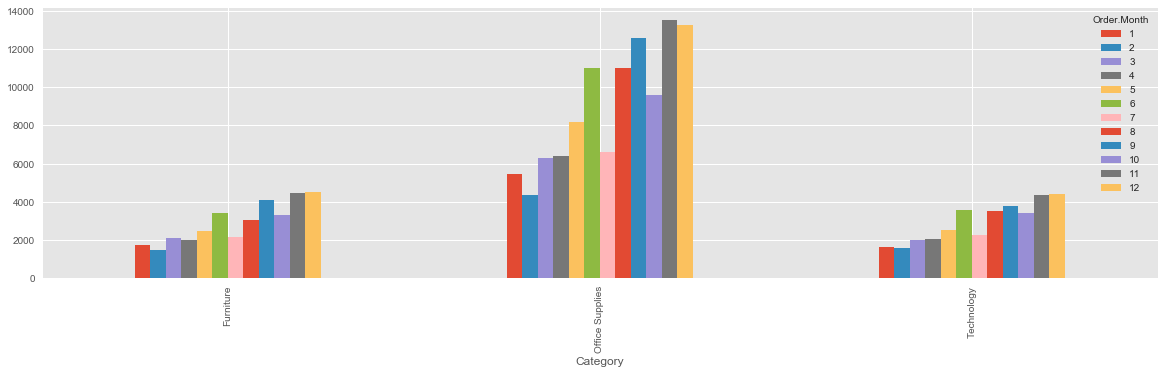

In [54]:
#Data overall by Category - Quantity
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 5))
Orders.groupby(['Category','Order.Month'])['Quantity'].sum().unstack().plot.bar(ax=ax)
#Comment : In only Quantity, Office Supplies are the largest.

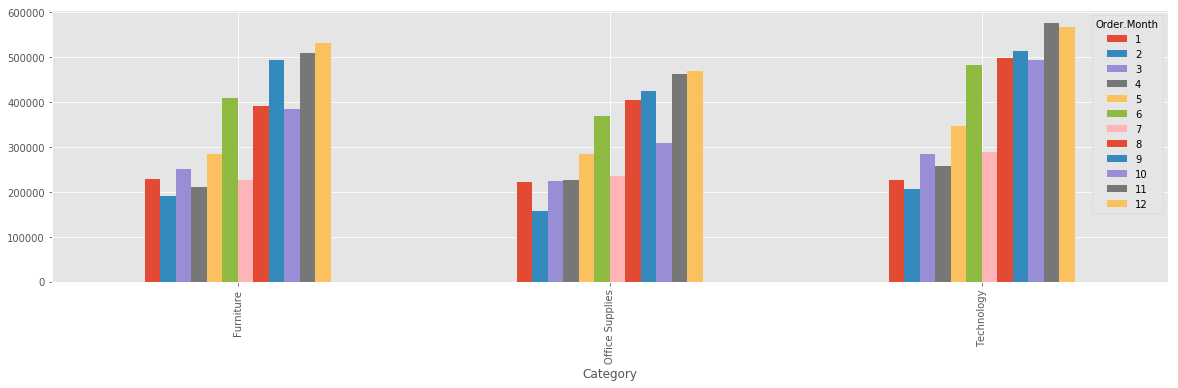

In [5]:
#Data overall by Category - Sales
fig, ax = plt.subplots(figsize=(20, 5))
Orders.groupby(['Category','Order.Month'])['Sales'].sum().unstack().plot.bar(ax=ax)
#Comment : Technology items are so profitable than I expected.

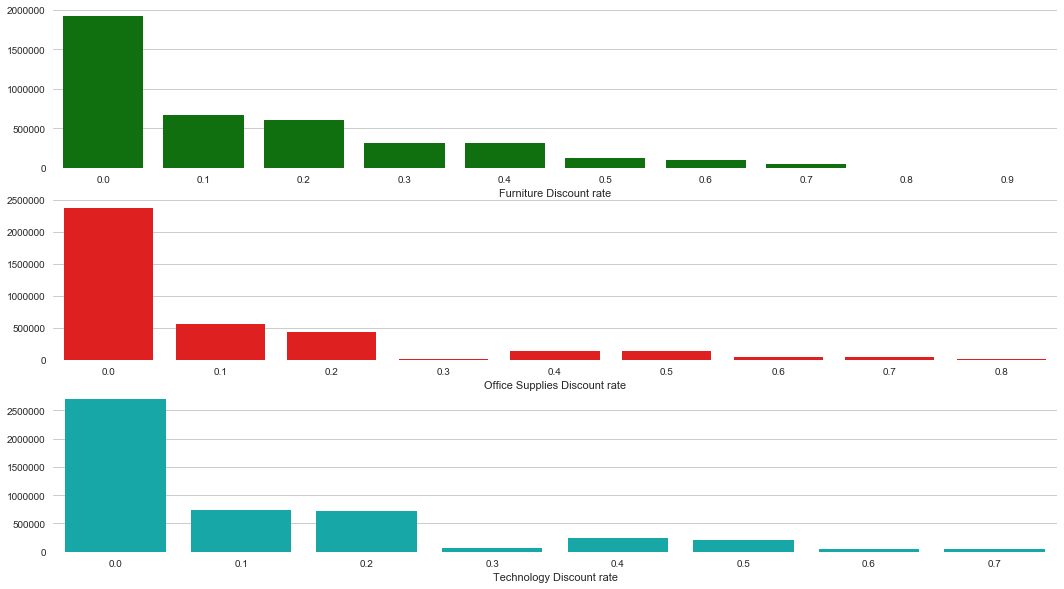

In [6]:
#Data overall by Discount Effect
import seaborn as sns
import matplotlib.pyplot as plt

Furniture_discount_plot = Orders[Orders['Category'] == 'Furniture'][['Sales', 'Roundup.Discount']].groupby('Roundup.Discount').sum().reset_index()
Office_Supplies_discount_plot = Orders[Orders['Category'] == 'Office Supplies'][['Sales', 'Roundup.Discount']].groupby('Roundup.Discount').sum().reset_index()
Technology_discount_plot = Orders[Orders['Category'] == 'Technology'][['Sales', 'Roundup.Discount']].groupby('Roundup.Discount').sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(18,10))

plt.subplot(311)
ax1 = sns.barplot(x="Roundup.Discount", y="Sales", data=Furniture_discount_plot, label="Sales", color='g')
ax1.set(ylabel="", xlabel="Furniture Discount rate")
sns.despine(left=True, bottom=True)

plt.subplot(312)
ax1 = sns.barplot(x="Roundup.Discount", y="Sales", data=Office_Supplies_discount_plot, label="Sales", color='r')
ax1.set(ylabel="", xlabel="Office Supplies Discount rate")
sns.despine(left=True, bottom=True)

plt.subplot(313)
ax1 = sns.barplot(x="Roundup.Discount", y="Sales", data=Technology_discount_plot, label="Sales", color='c')
ax1.set(ylabel="", xlabel="Technology Discount rate")
sns.despine(left=True, bottom=True)

#Comment : There is no relevant between sales and discount rates.

Month : 1


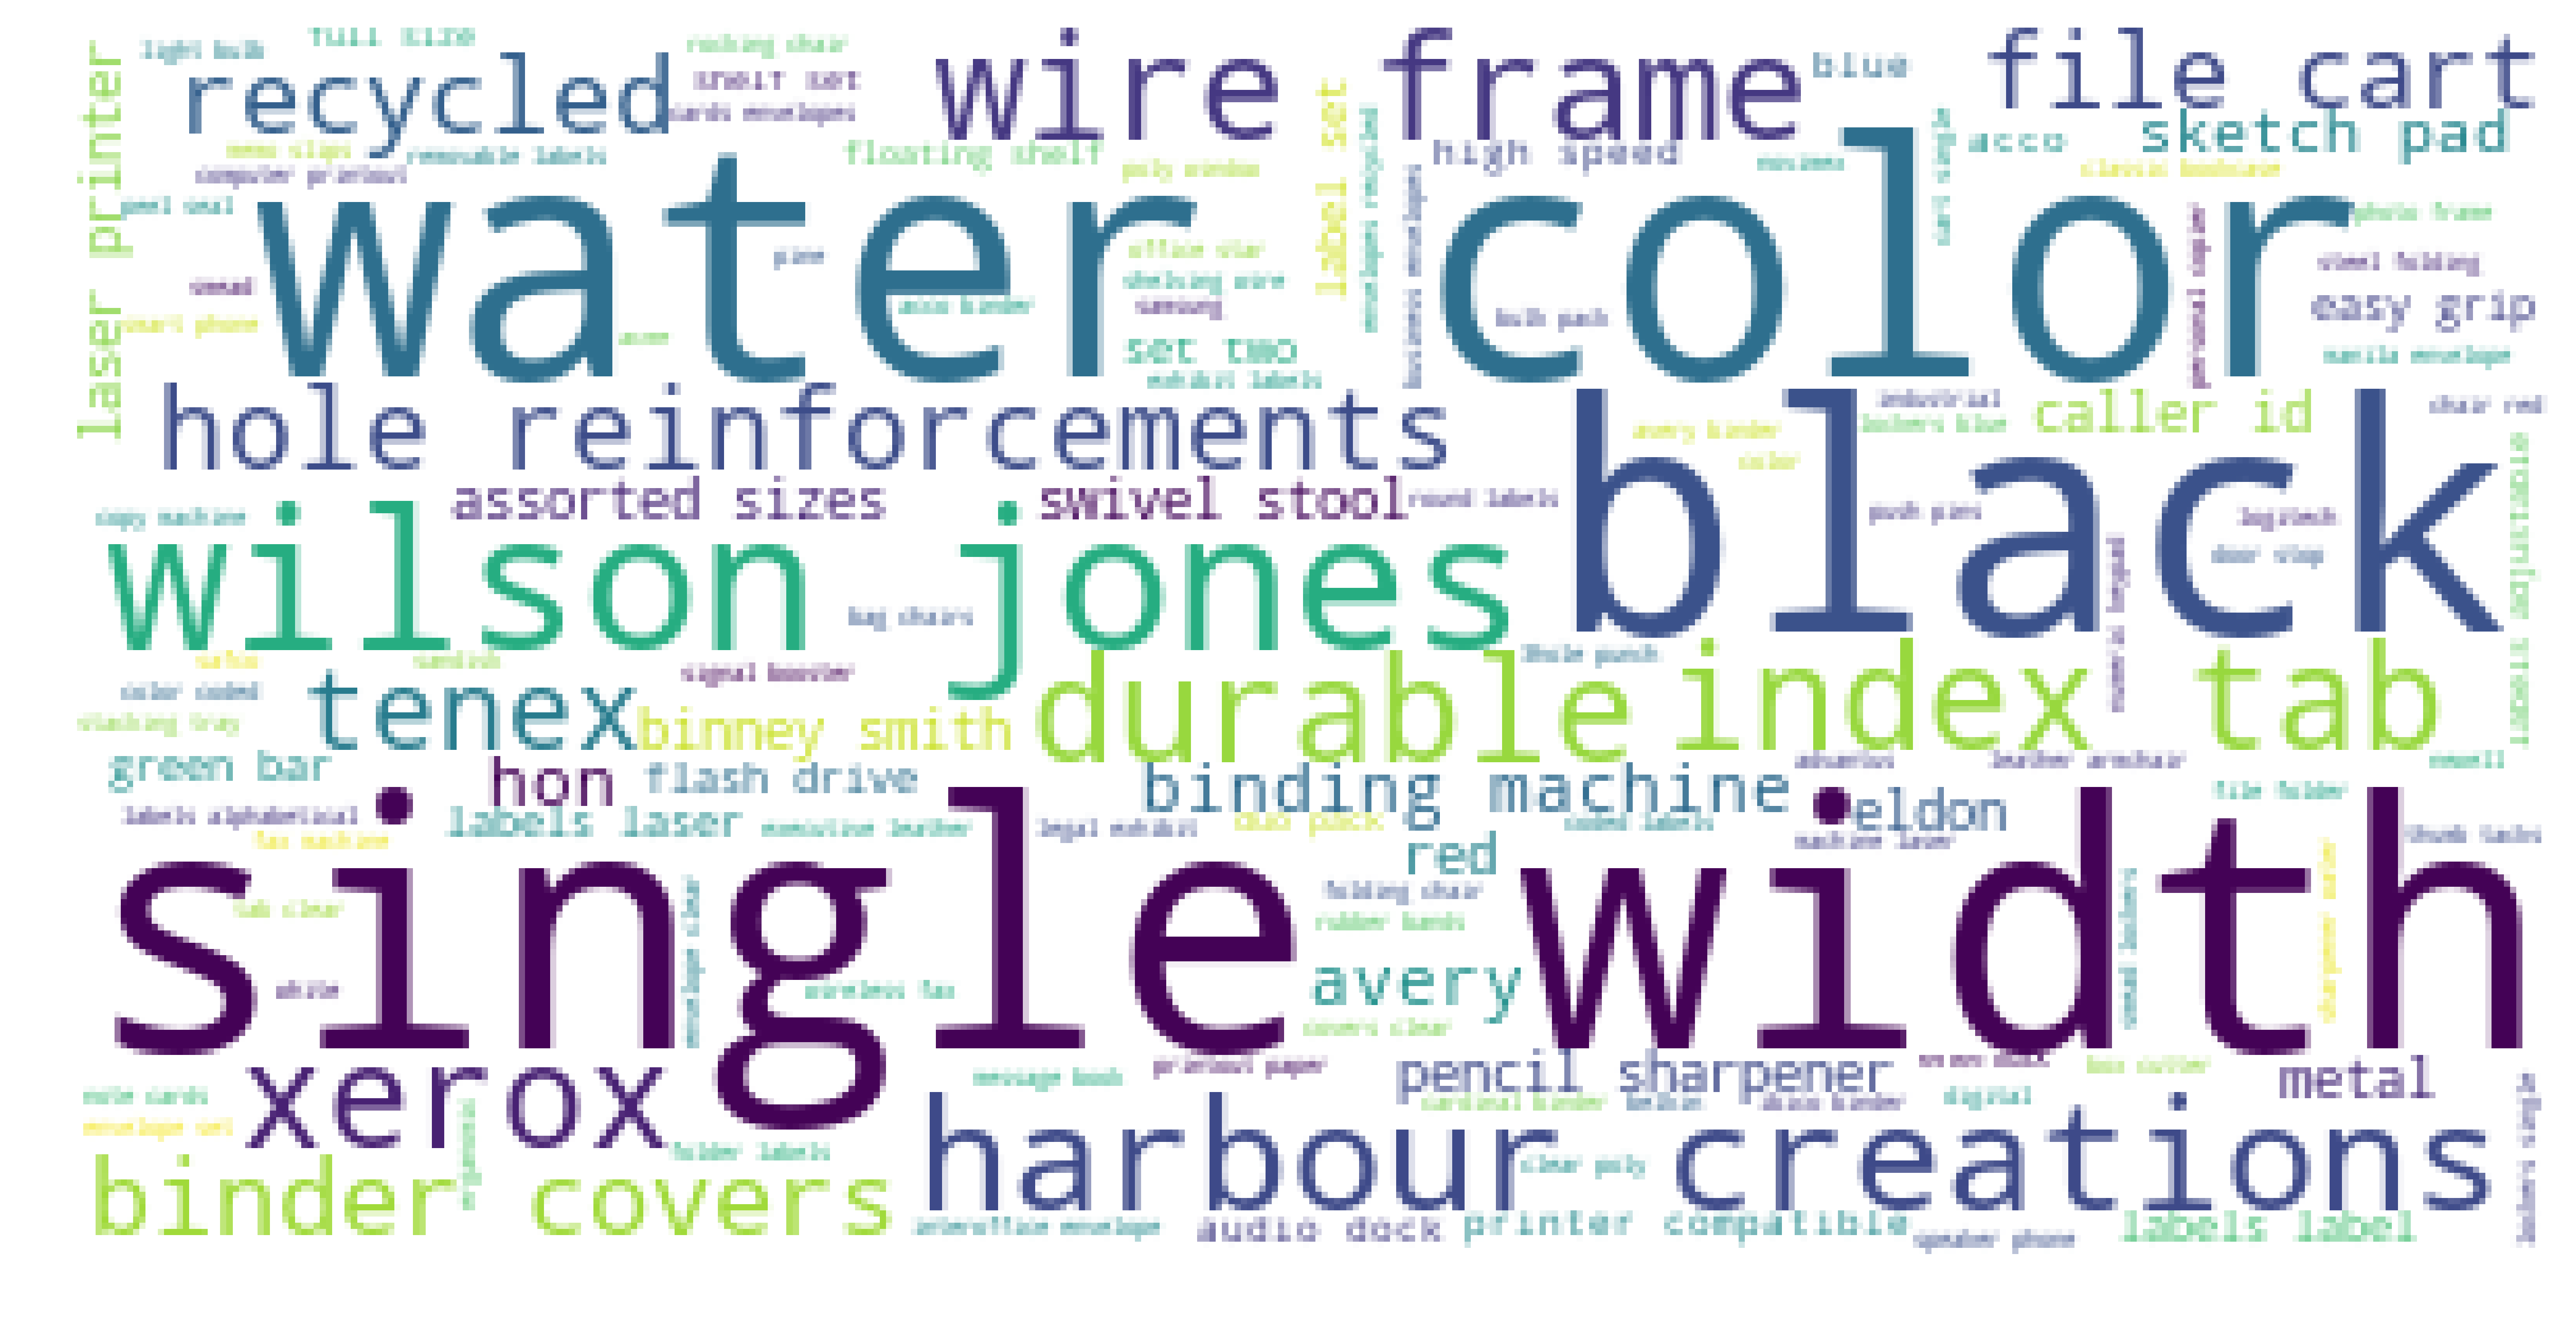

Month : 2


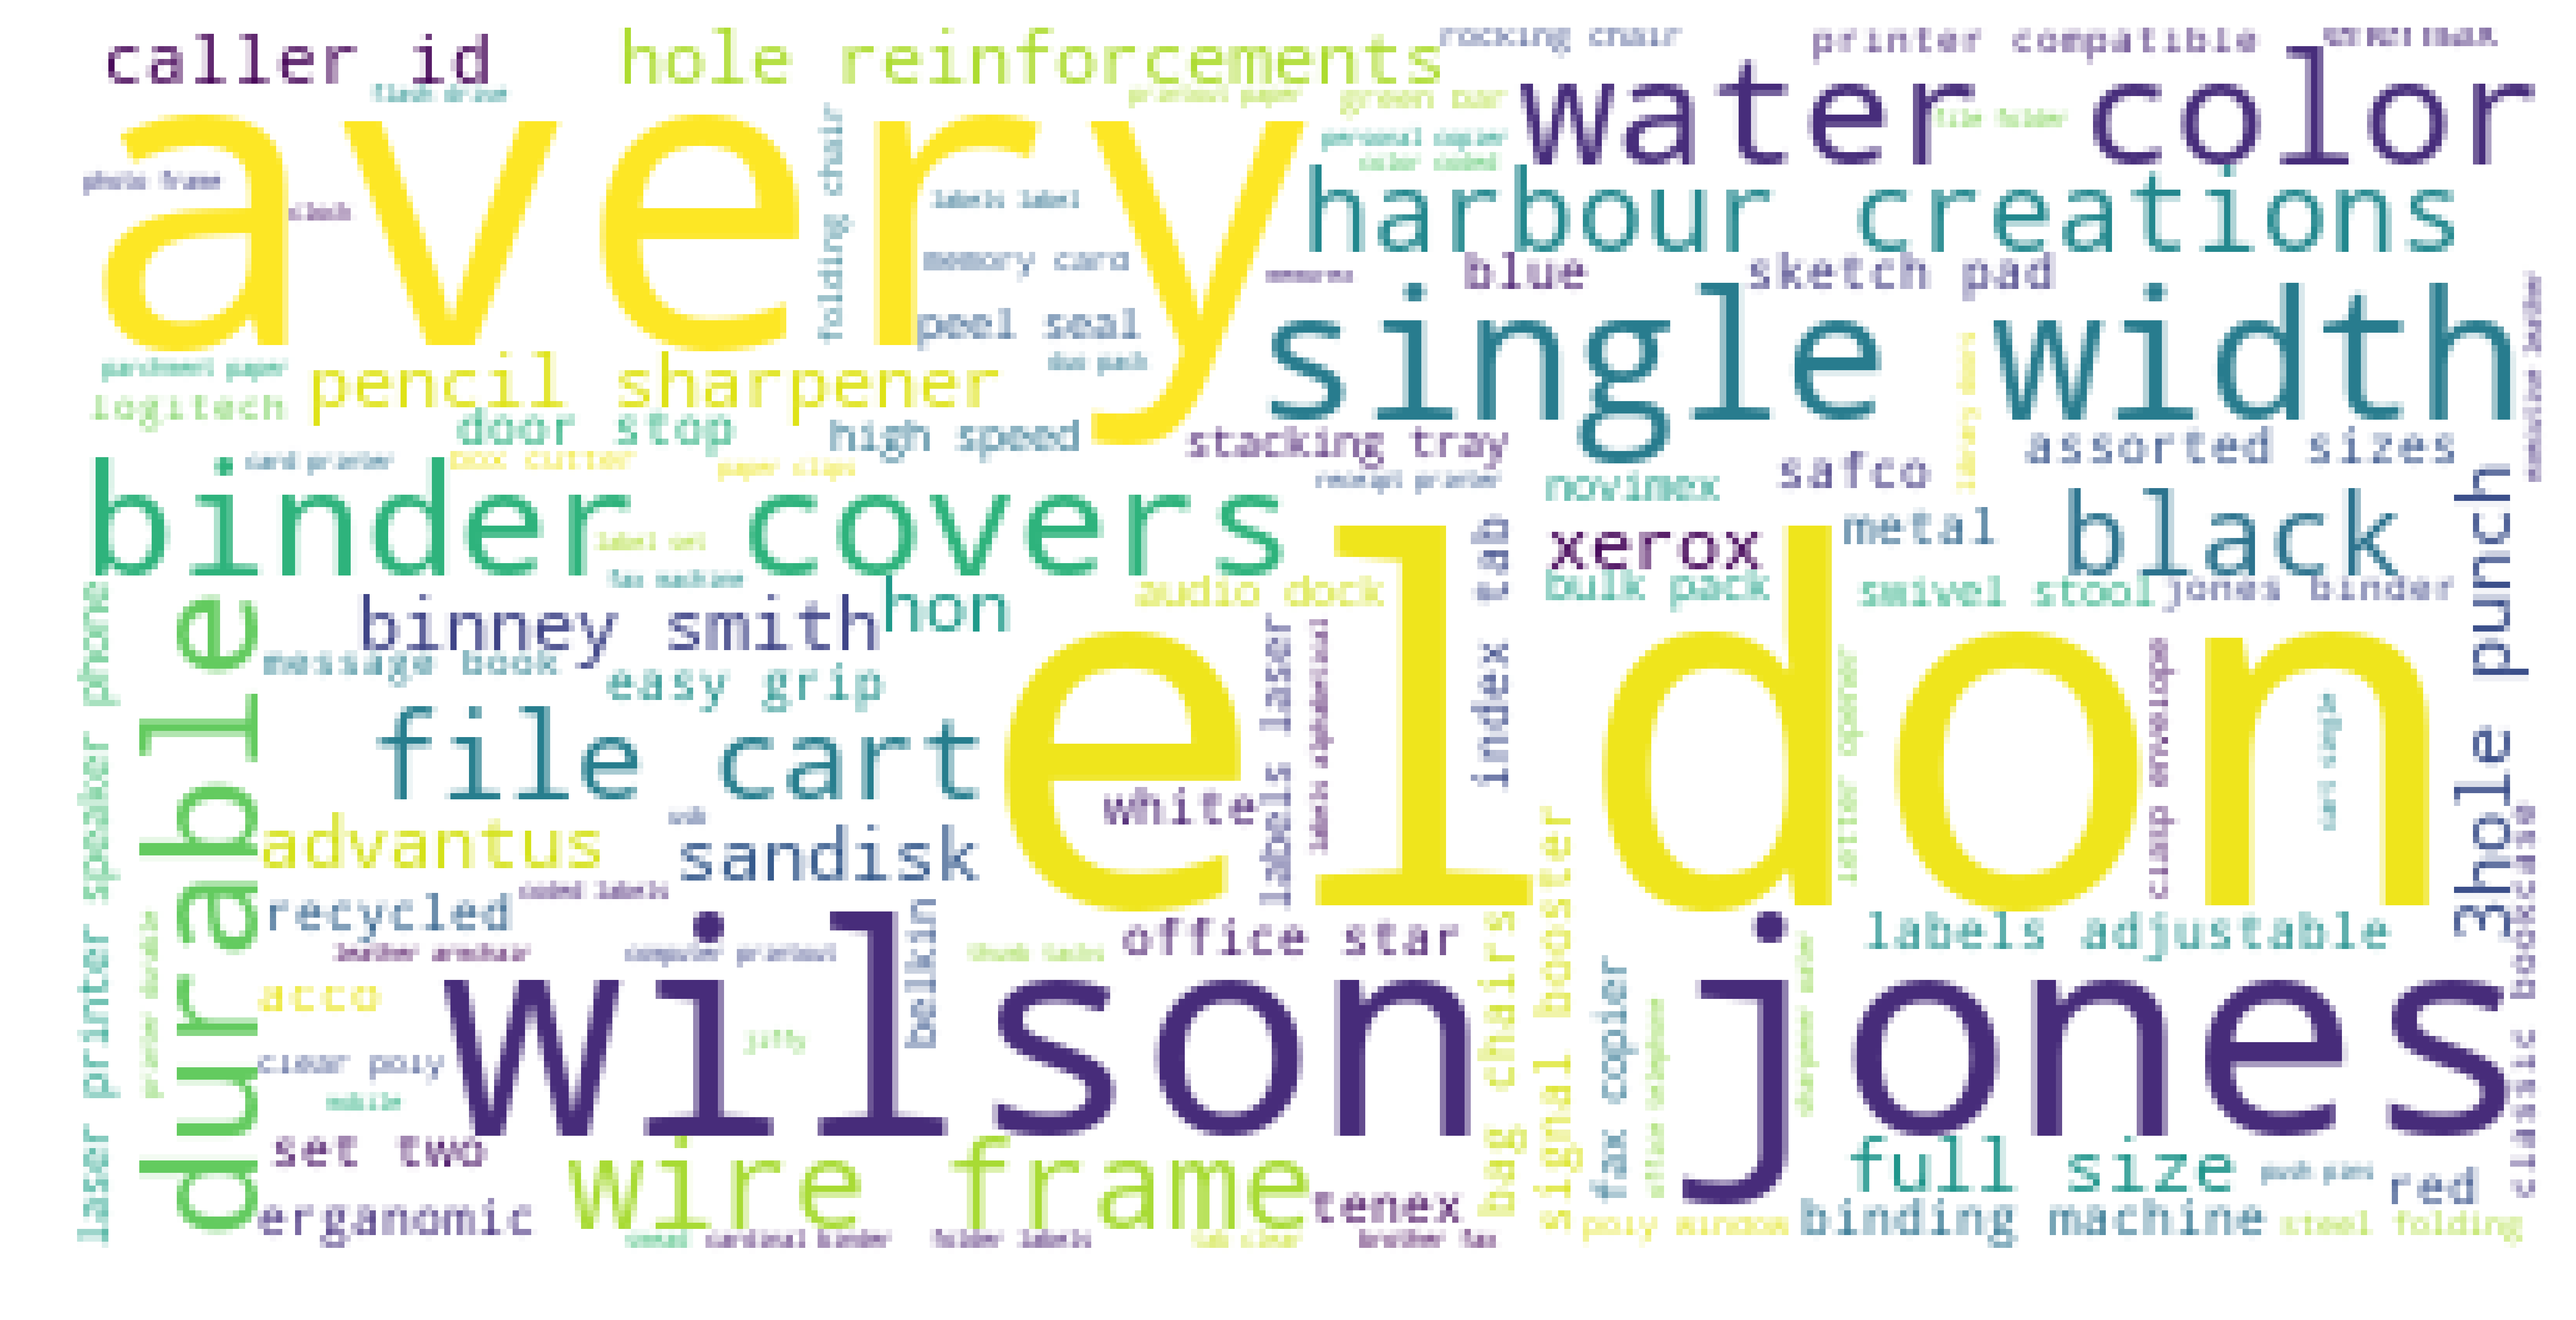

Month : 3


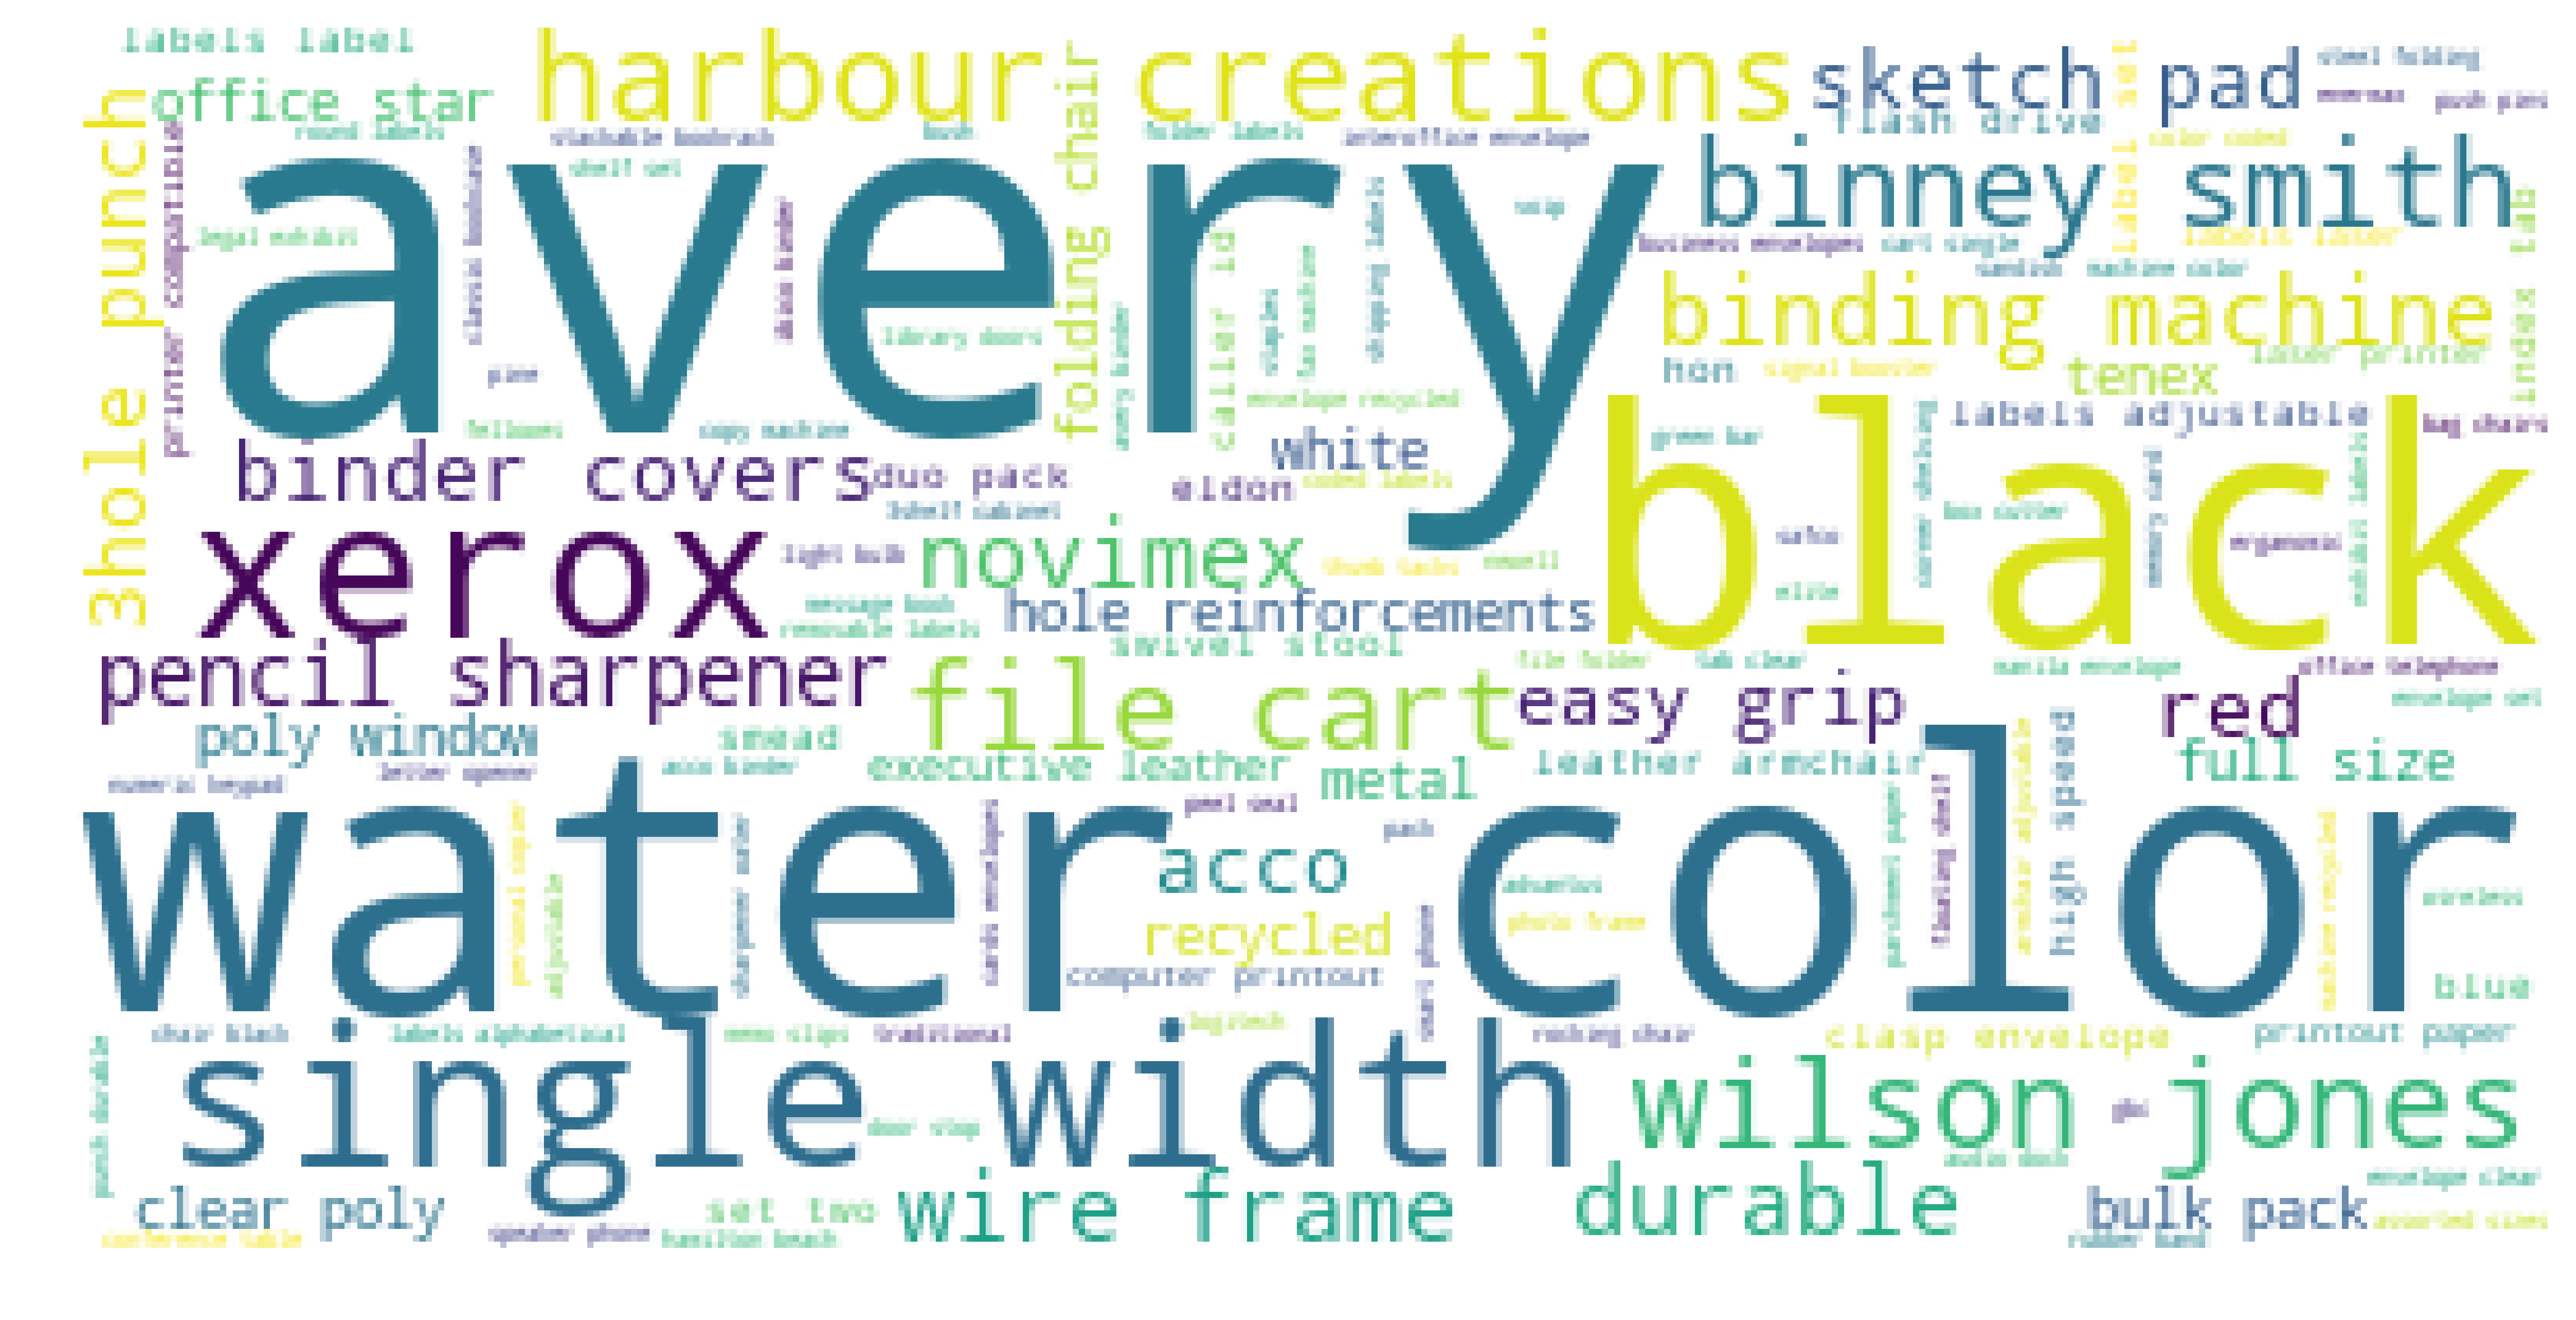

Month : 4


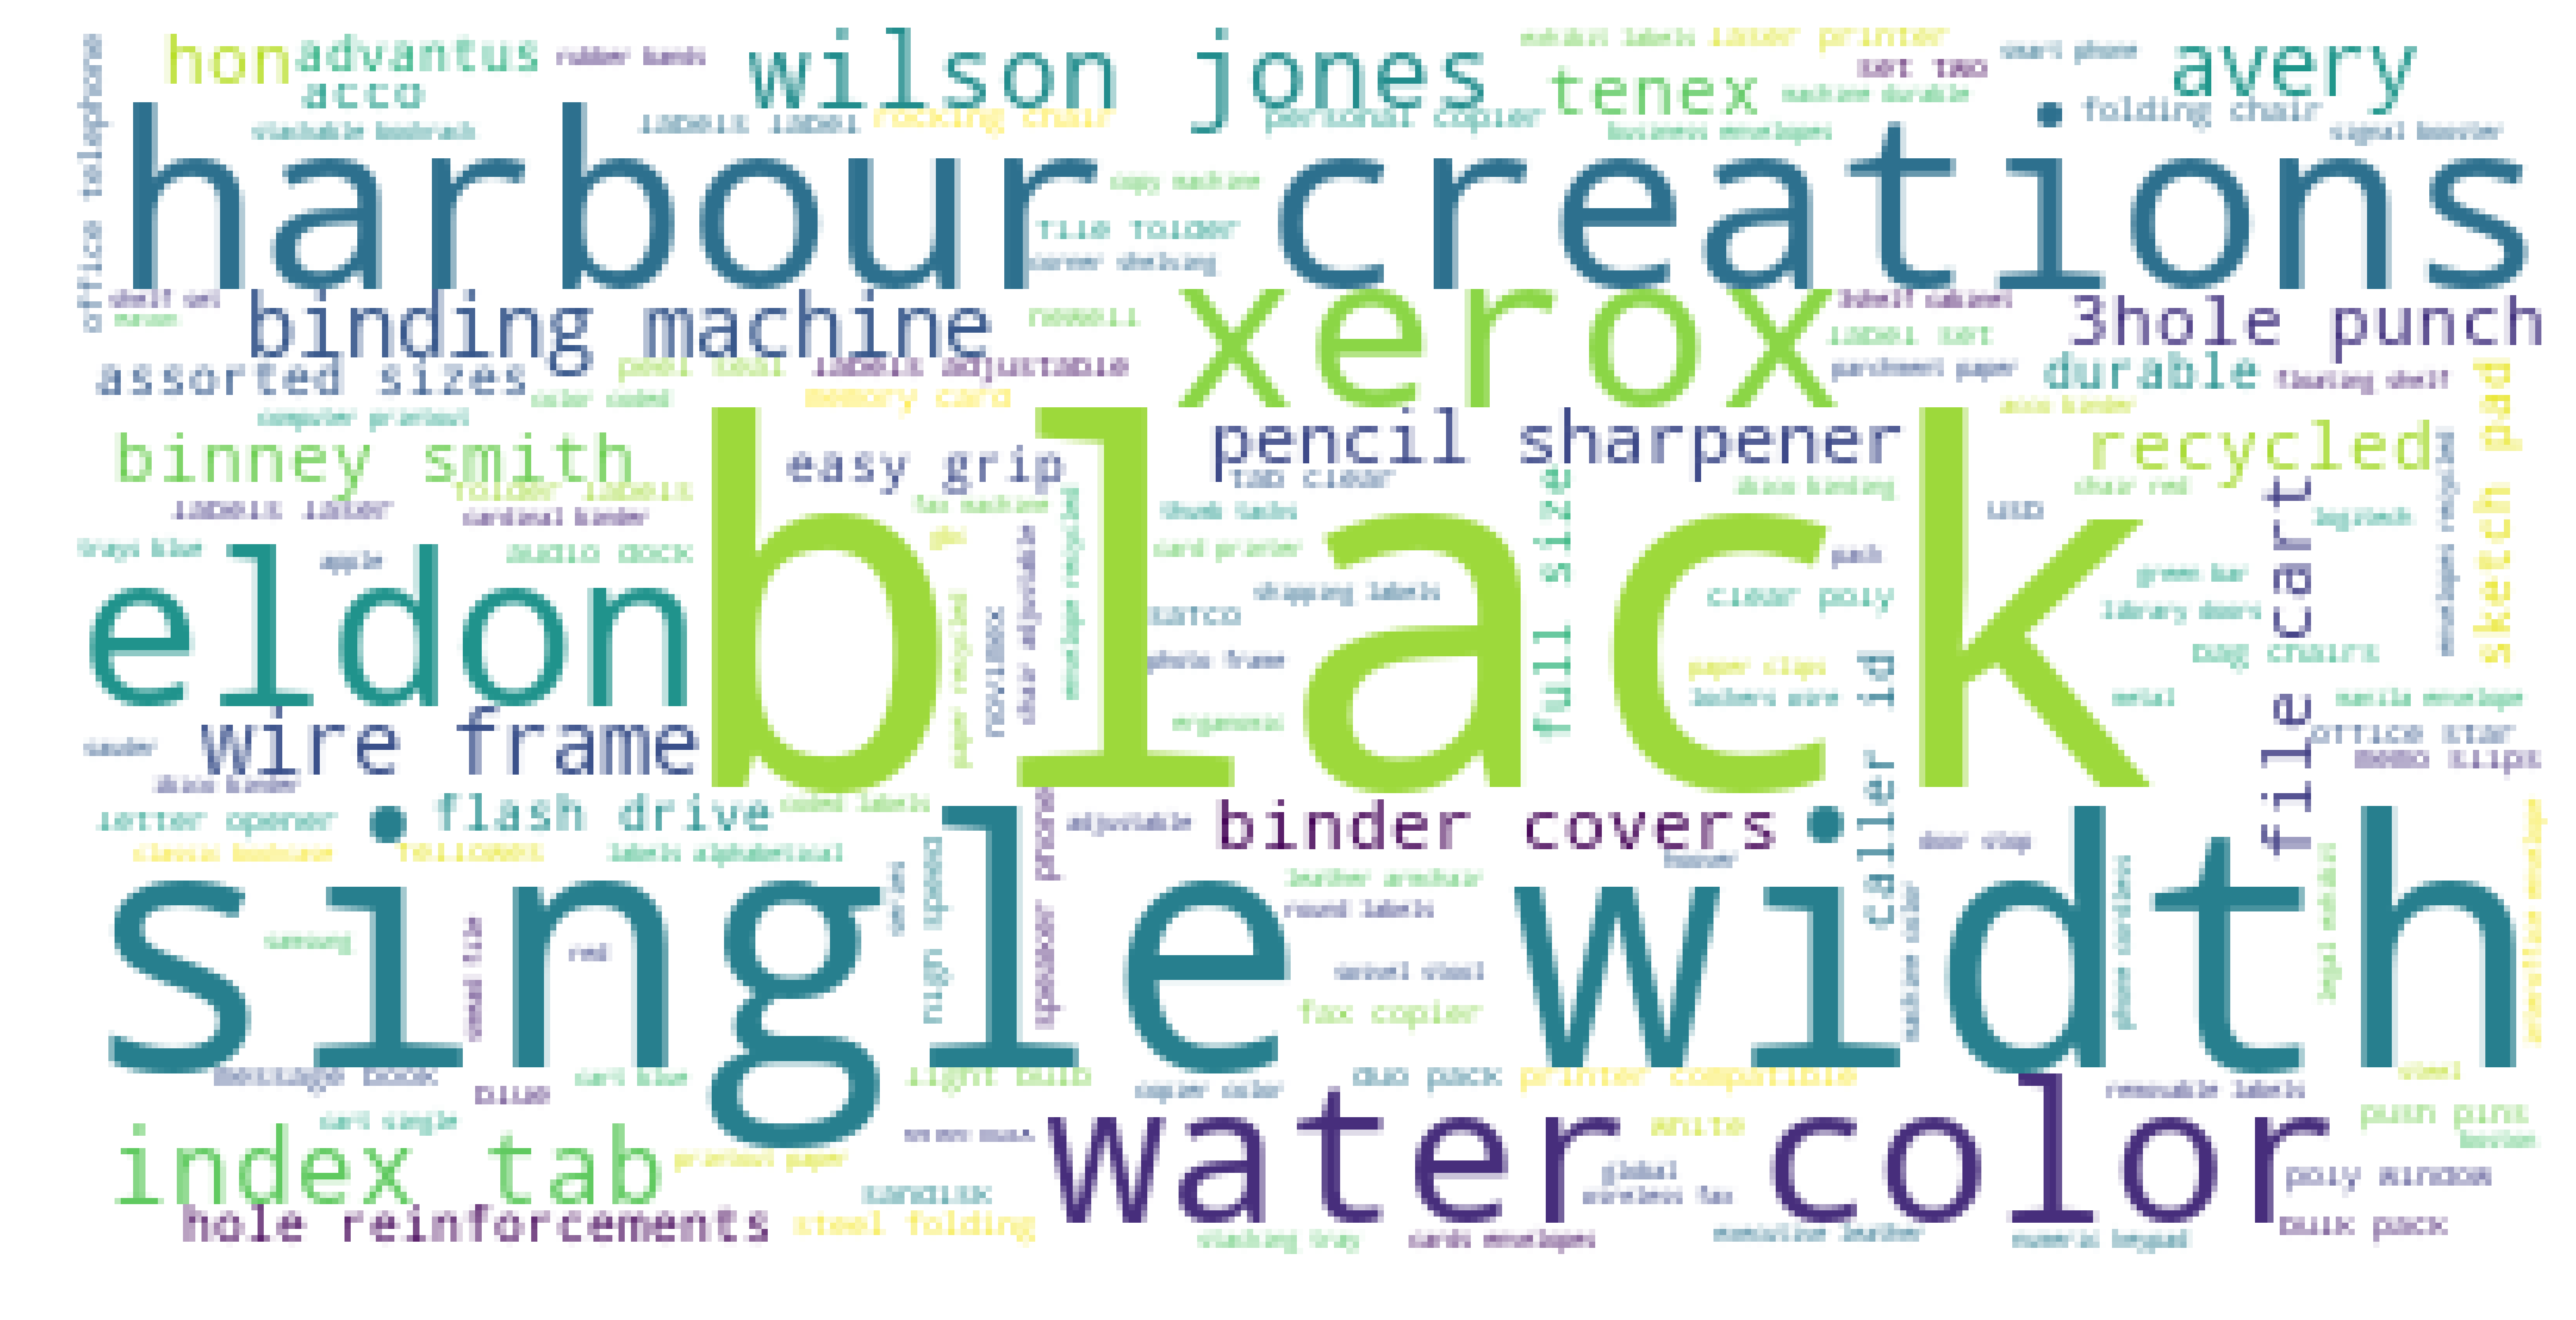

Month : 5


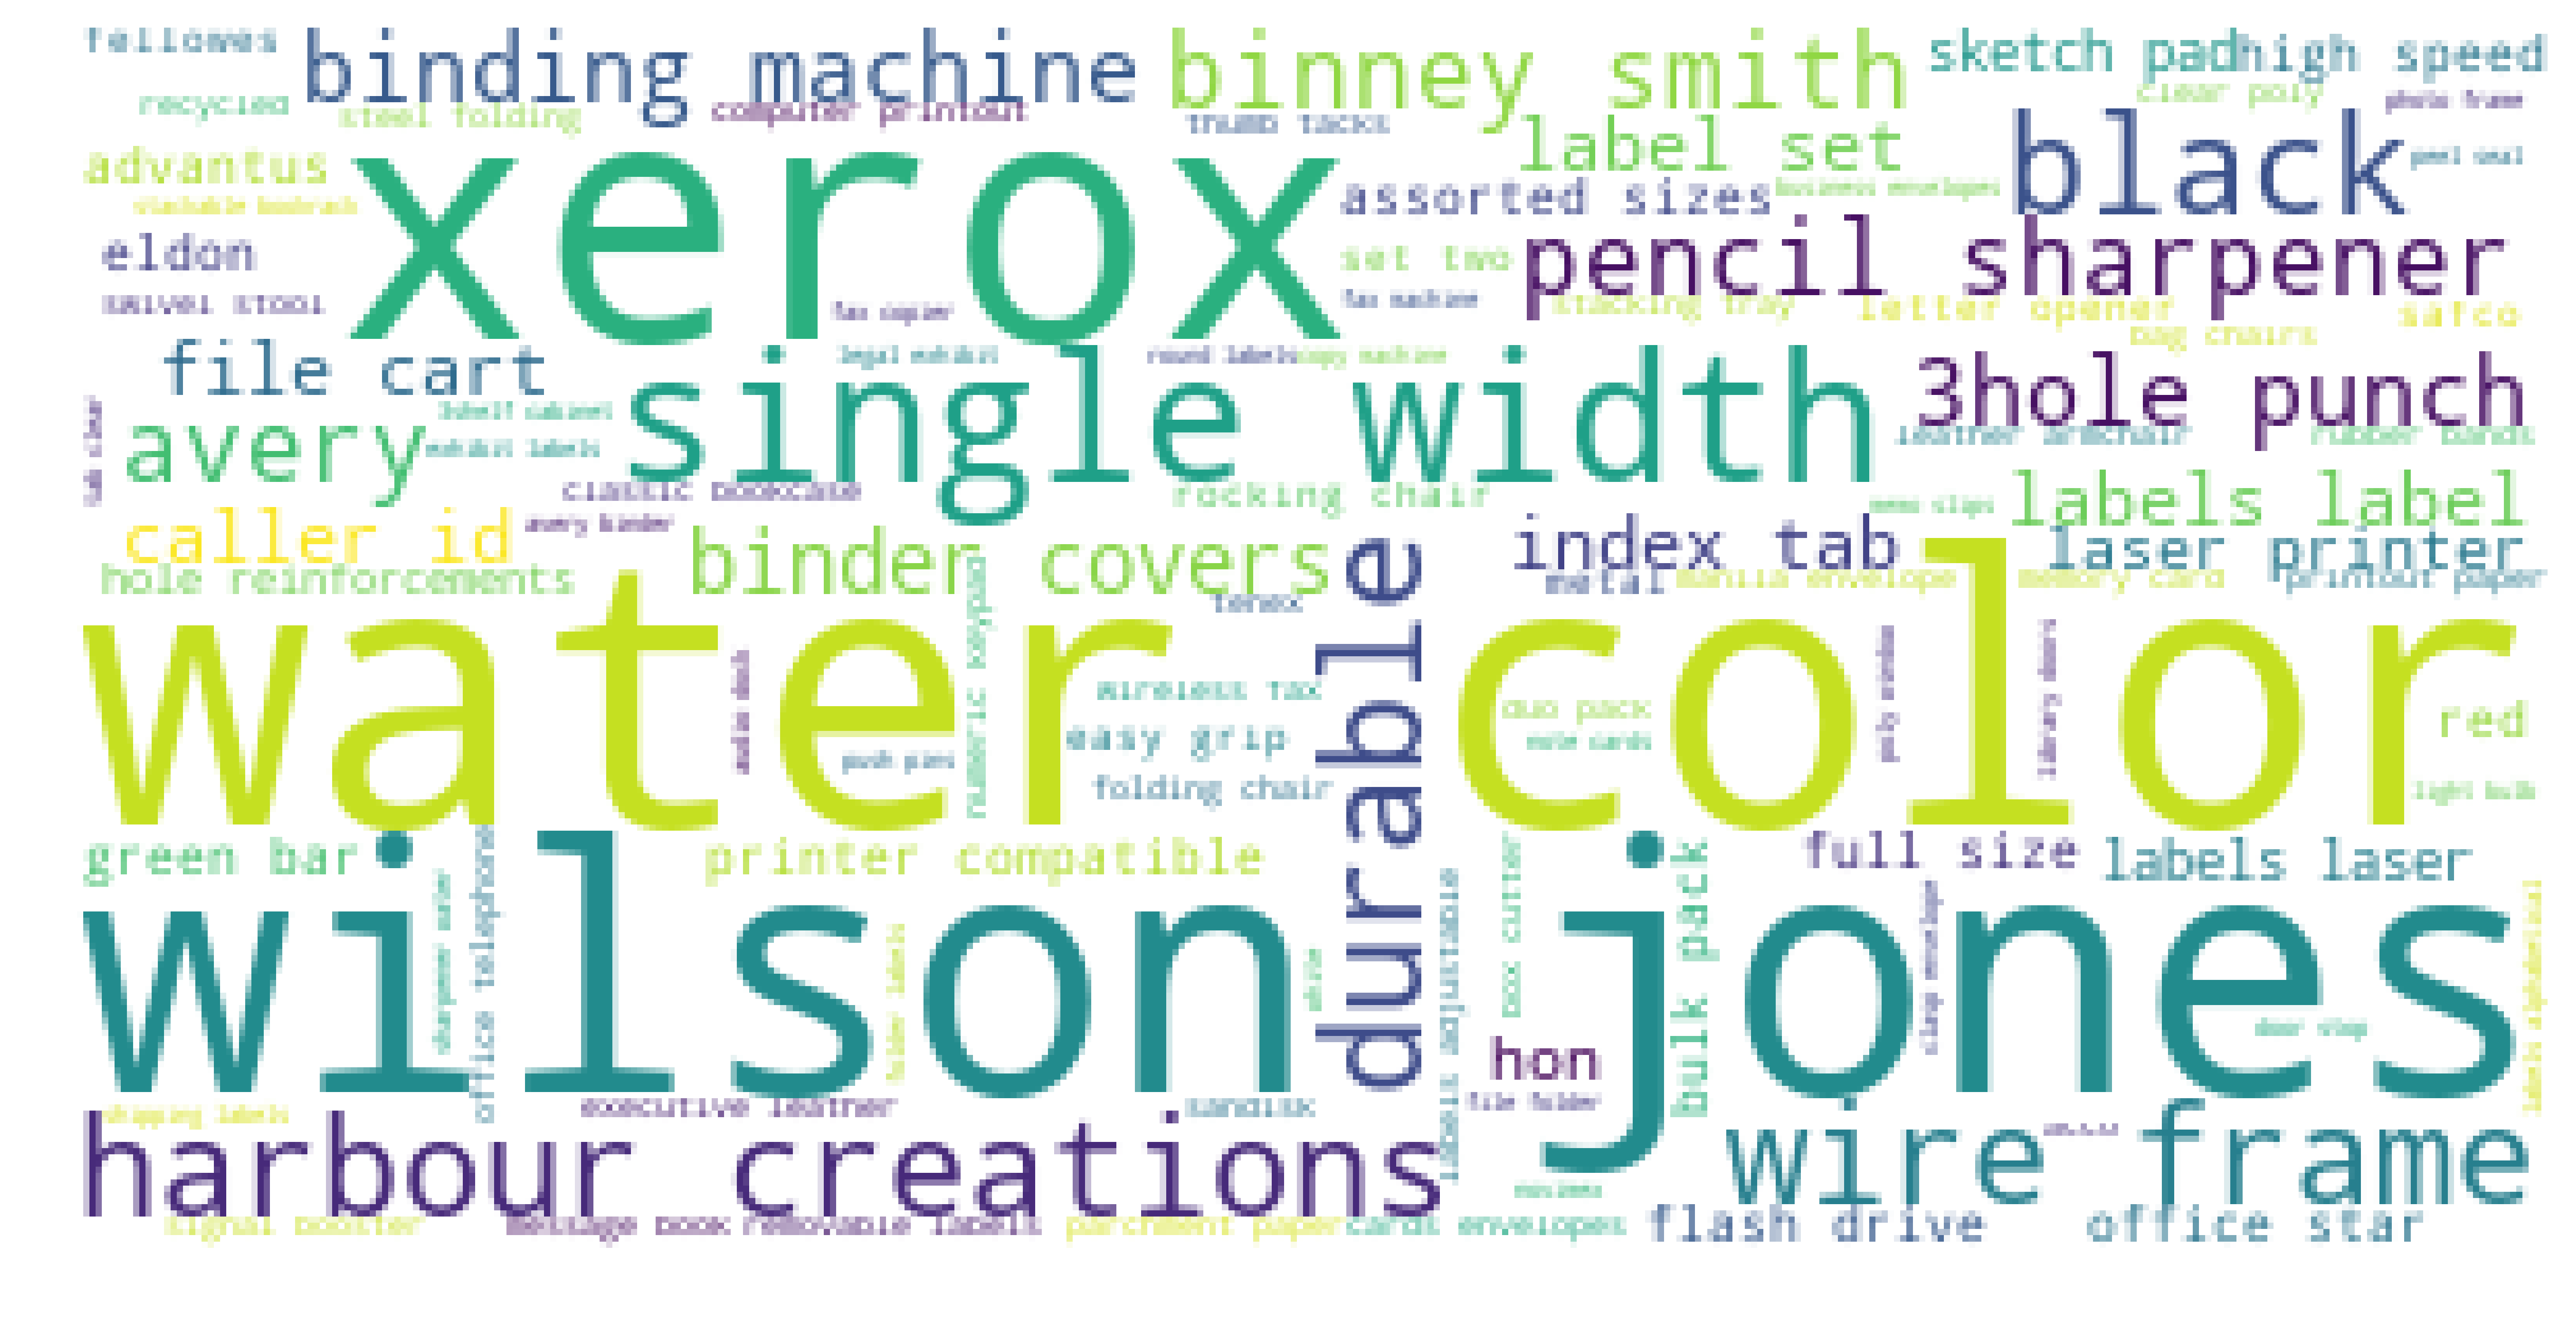

Month : 6


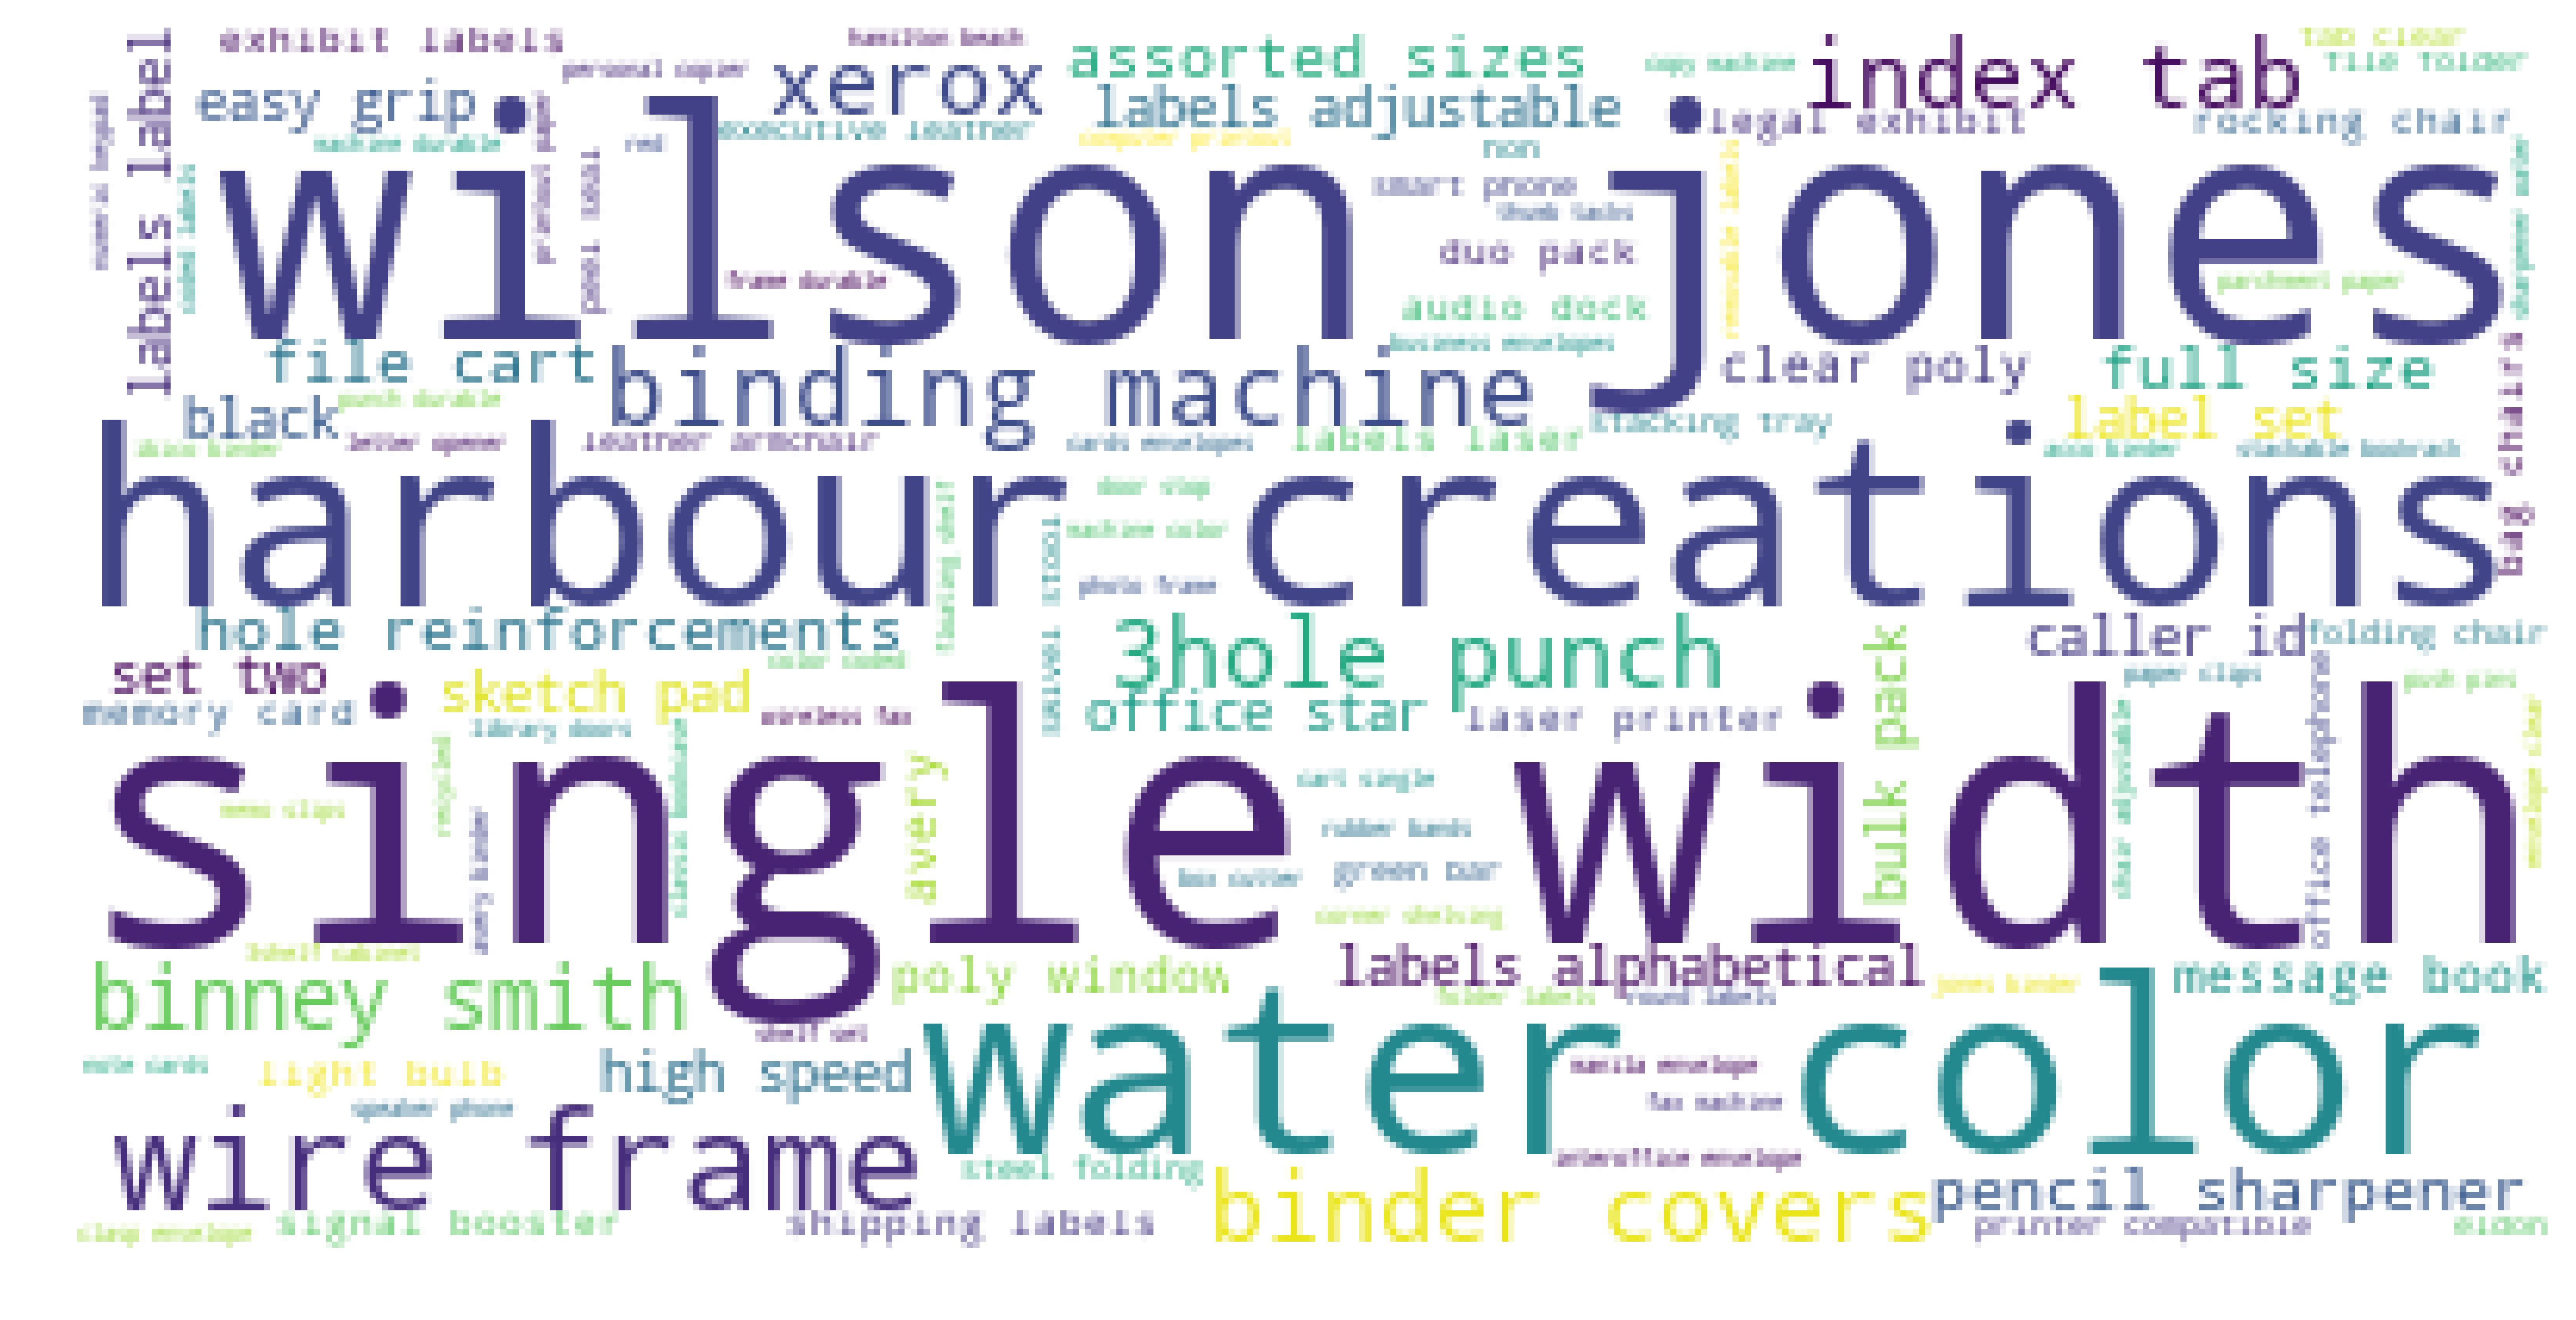

Month : 7


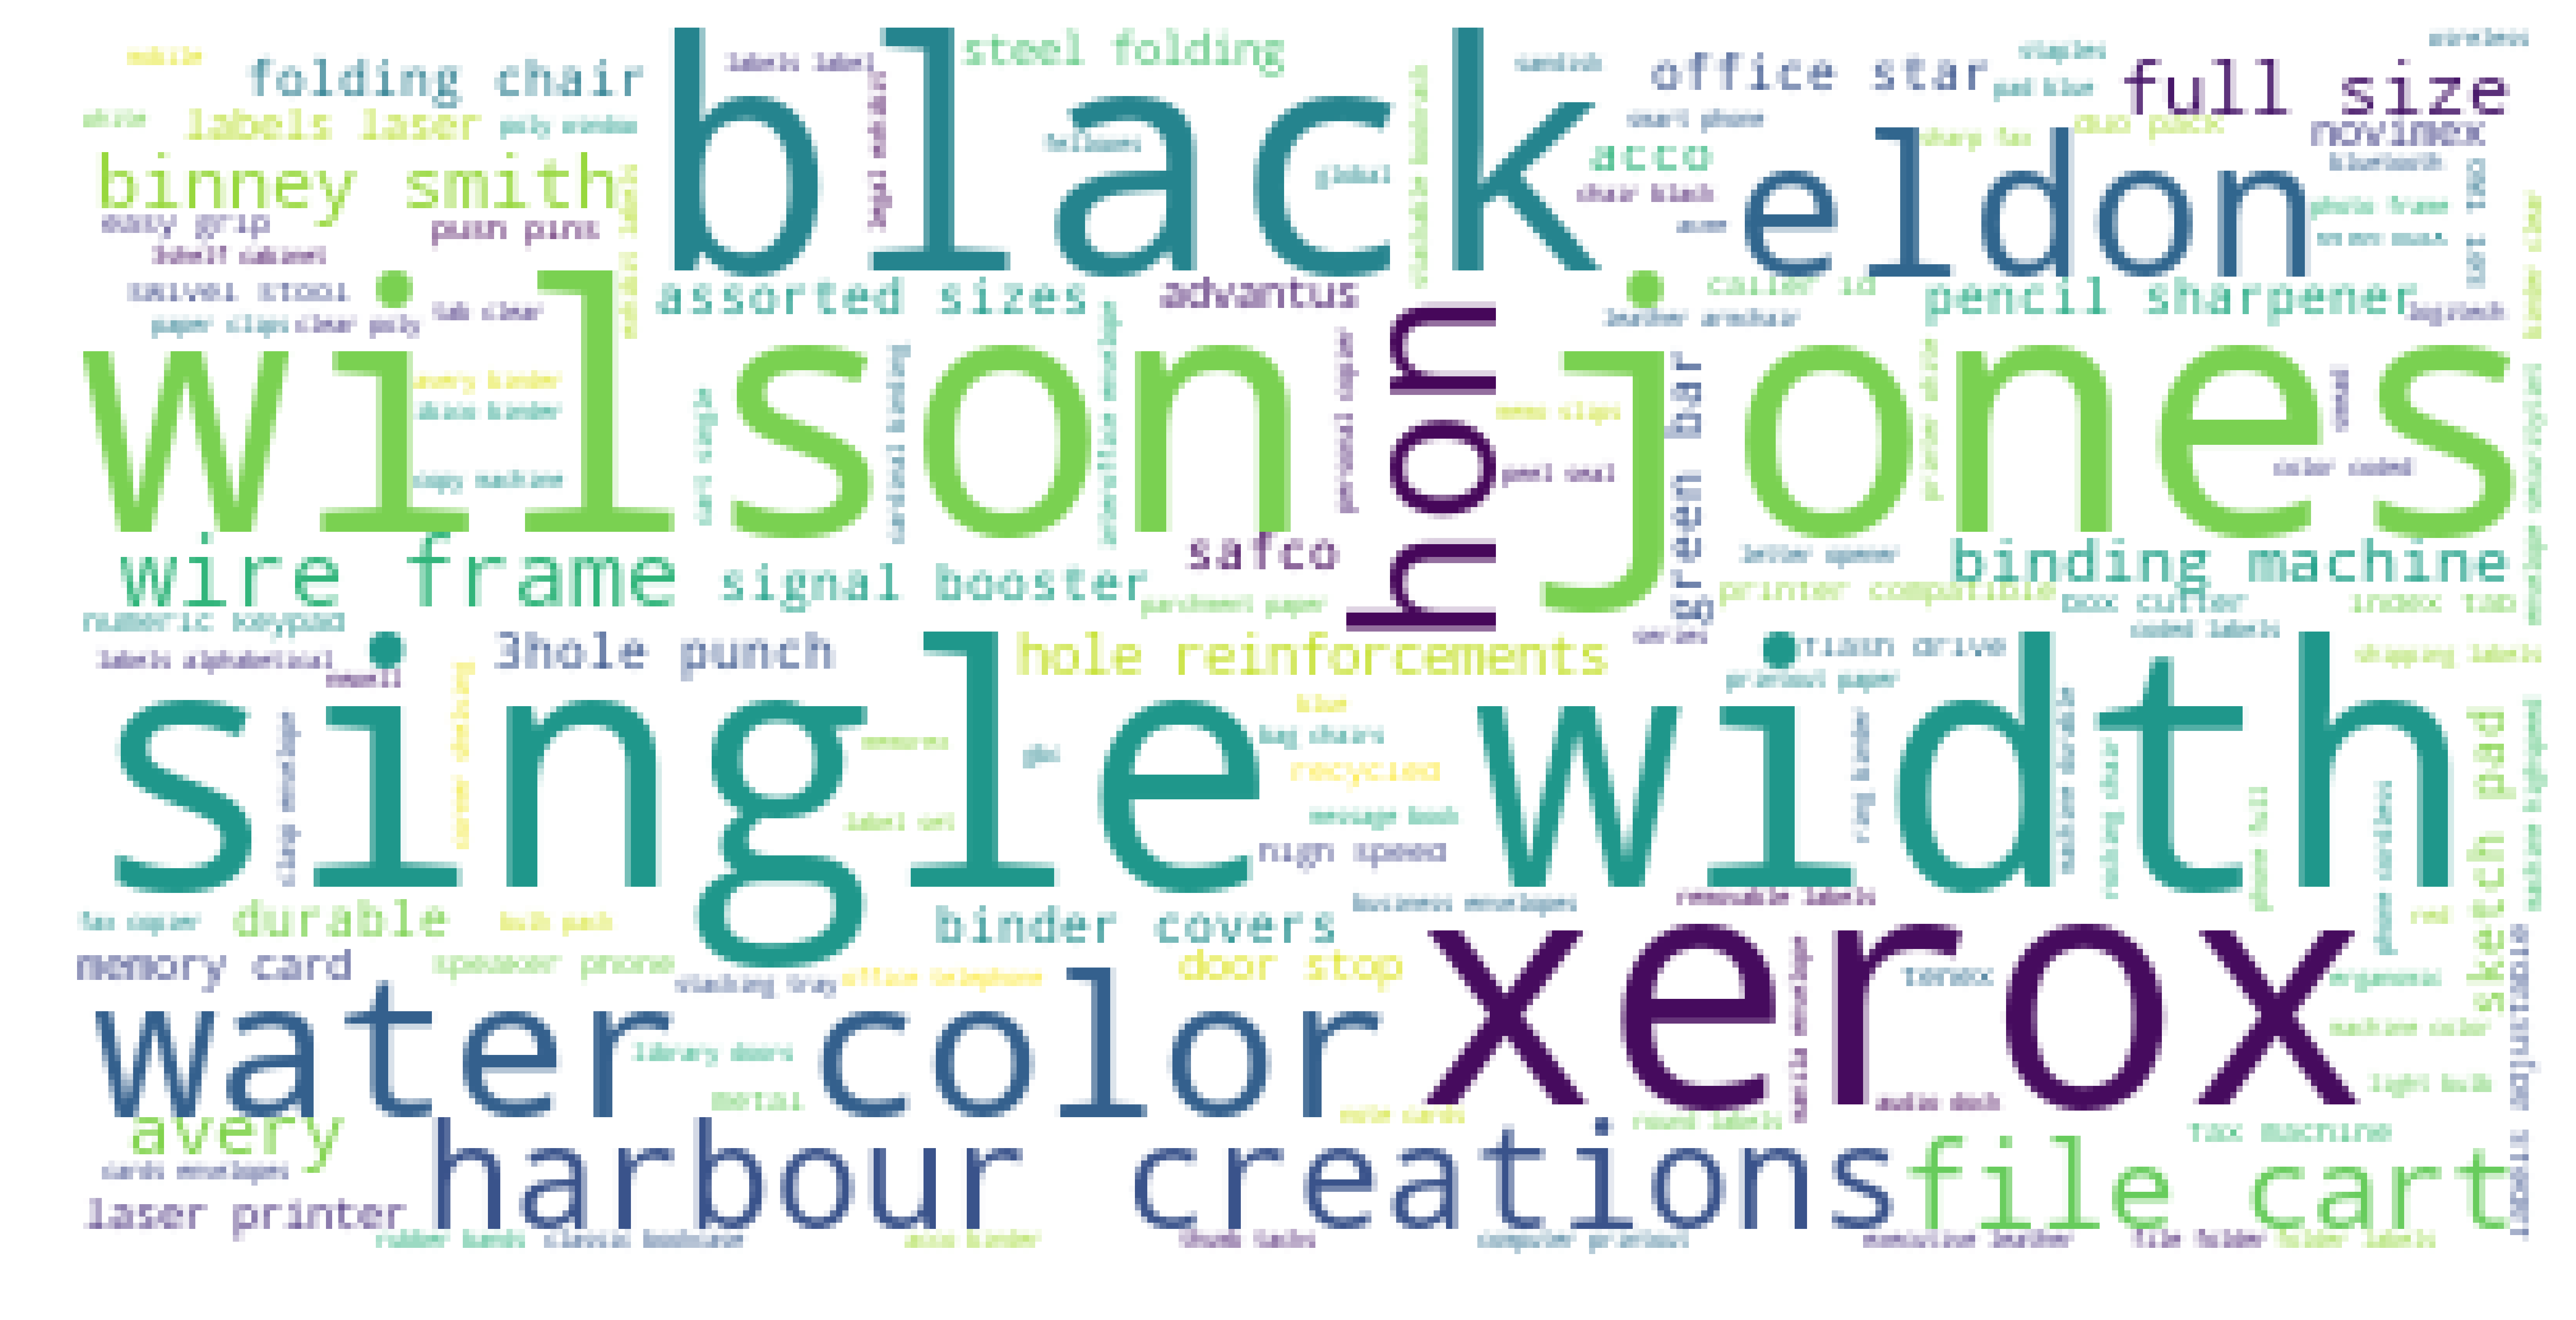

Month : 8


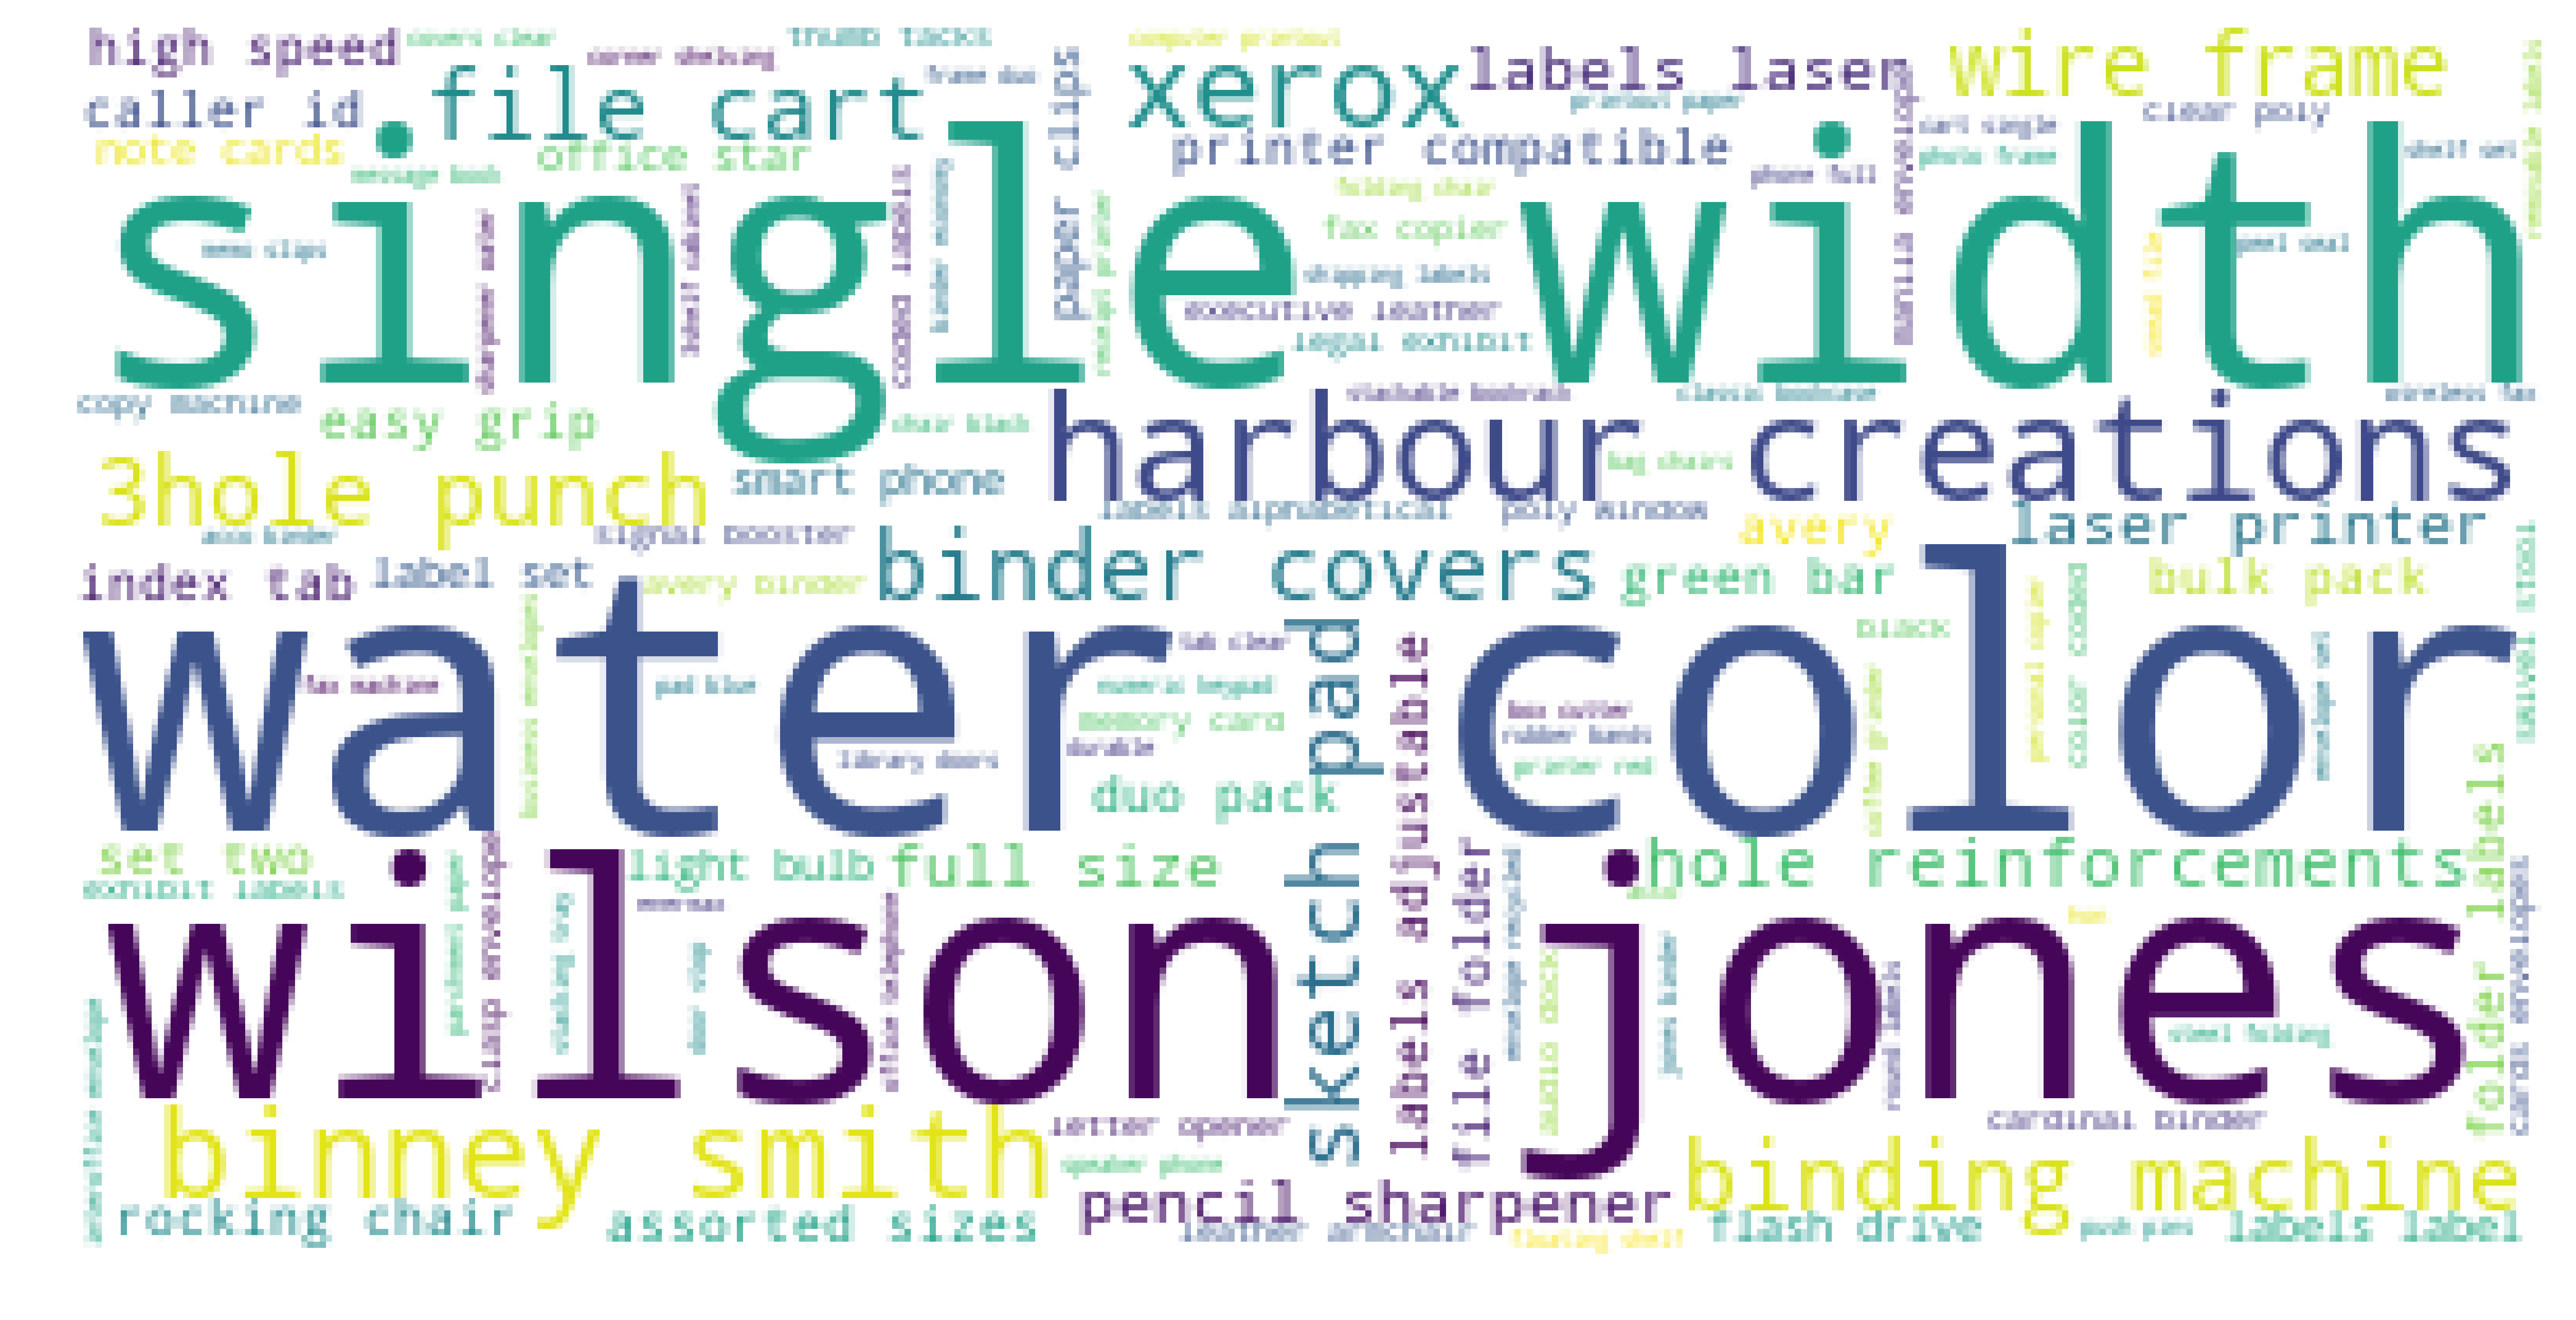

Month : 9


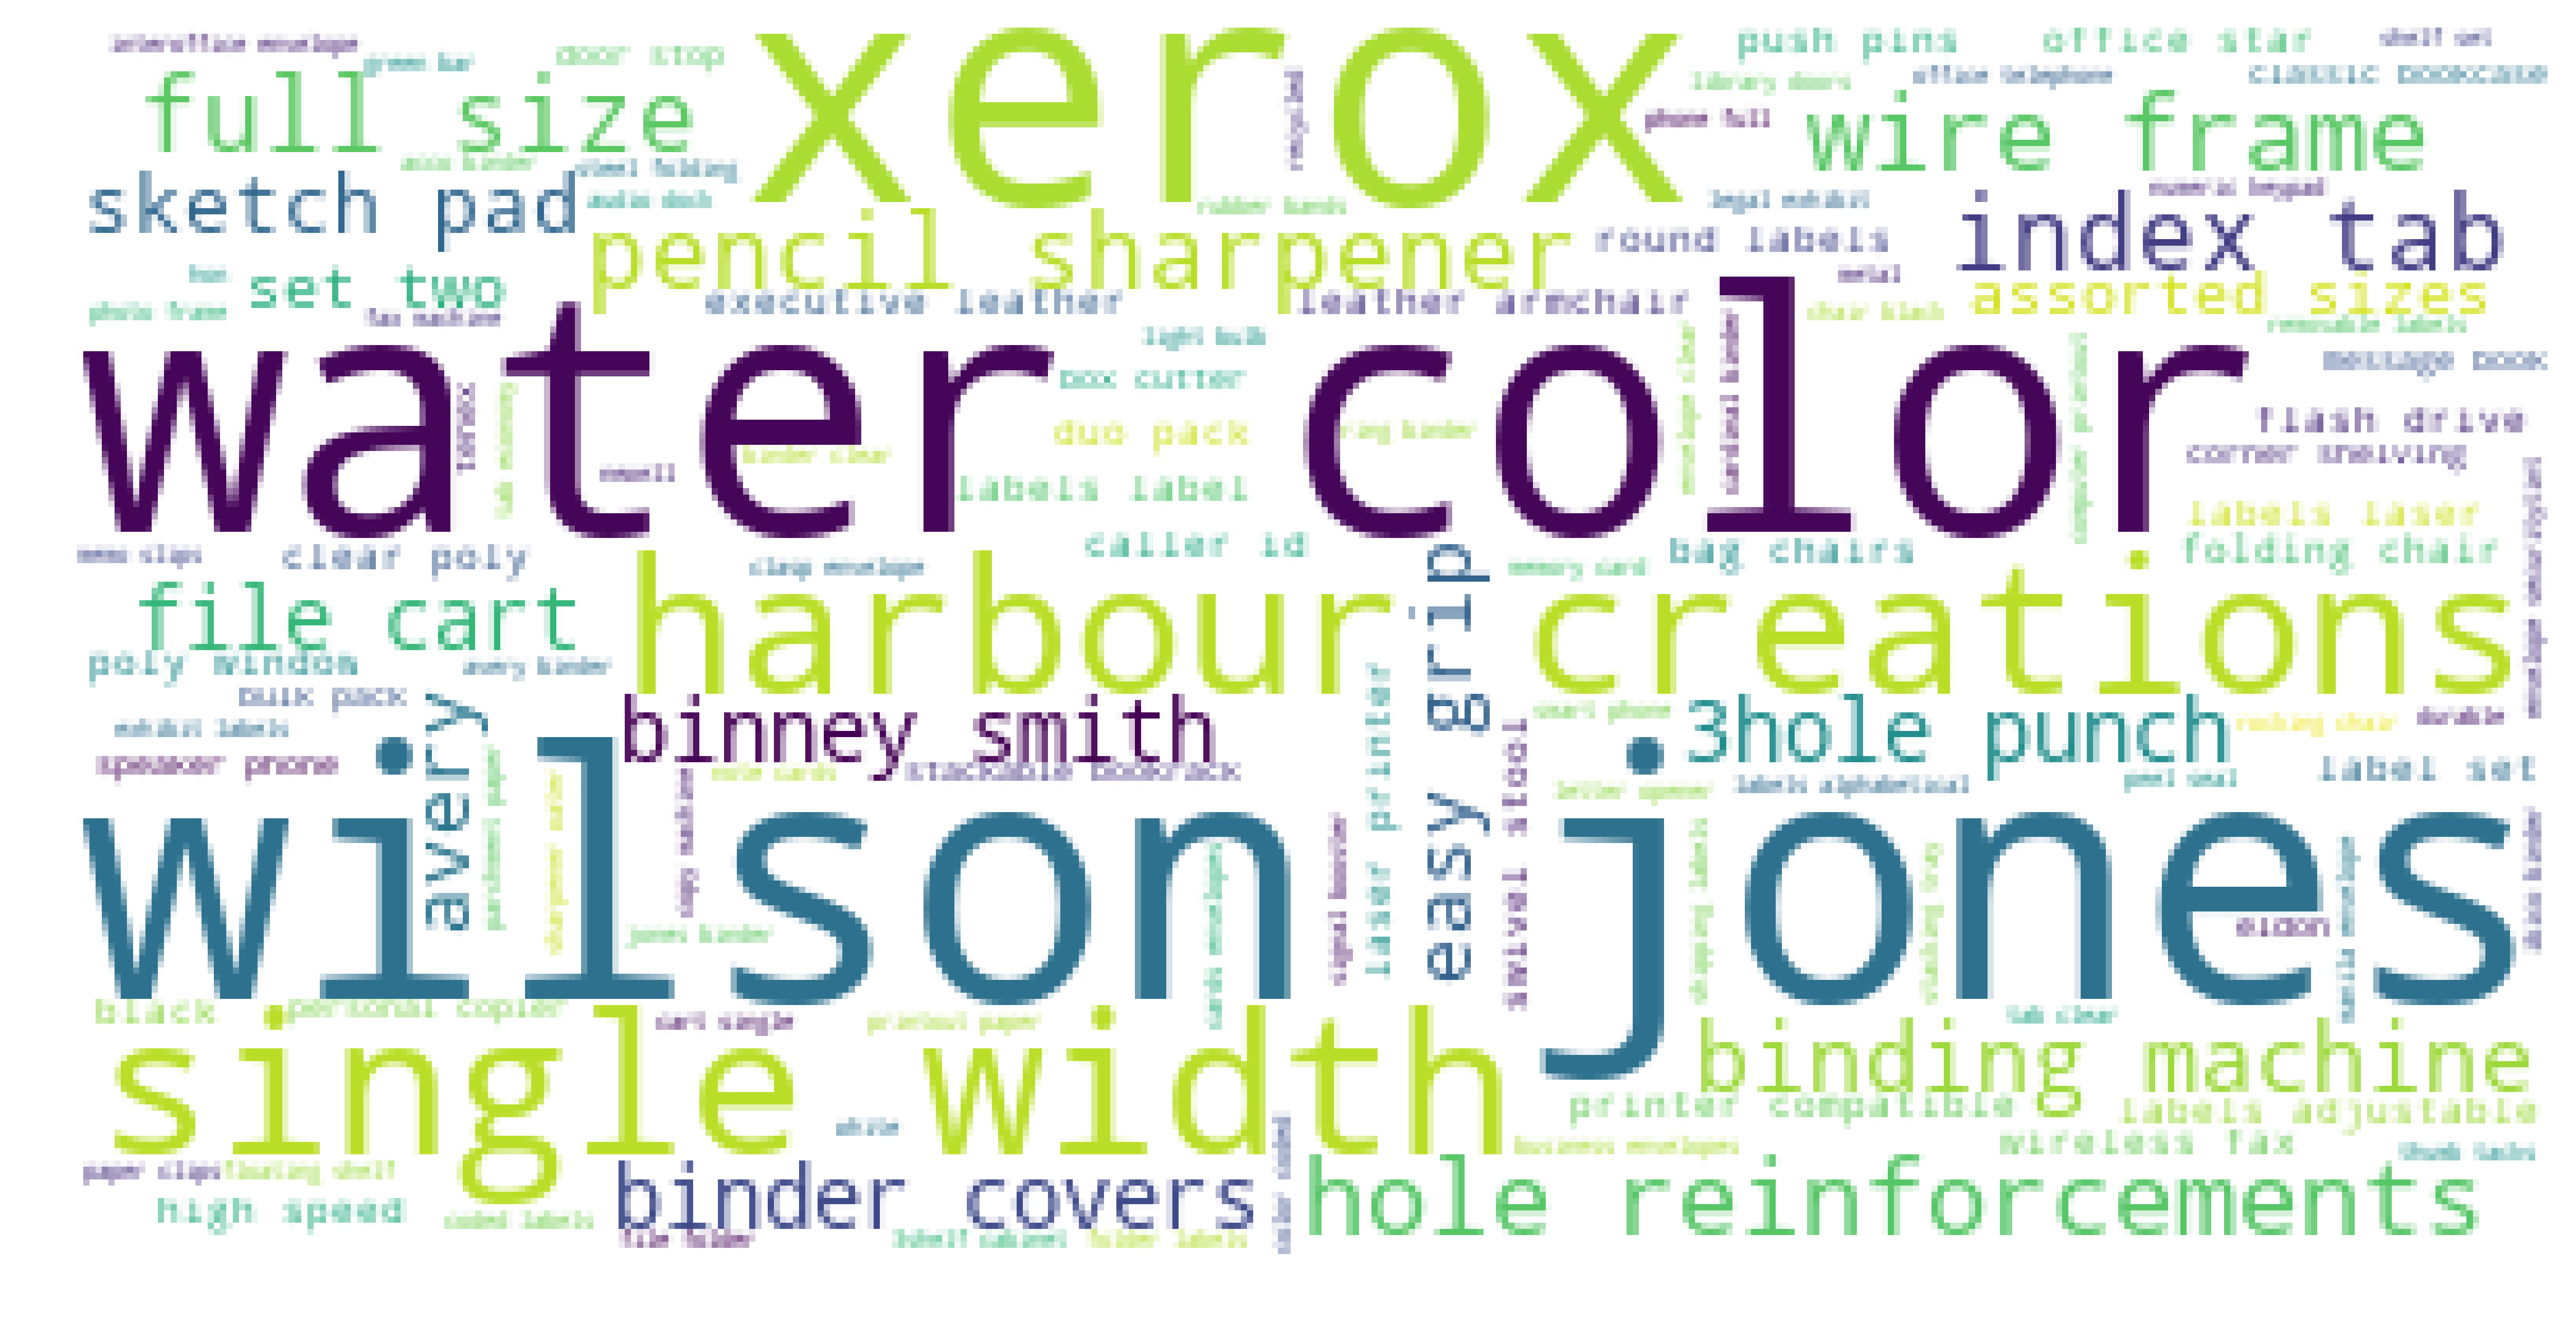

Month : 10


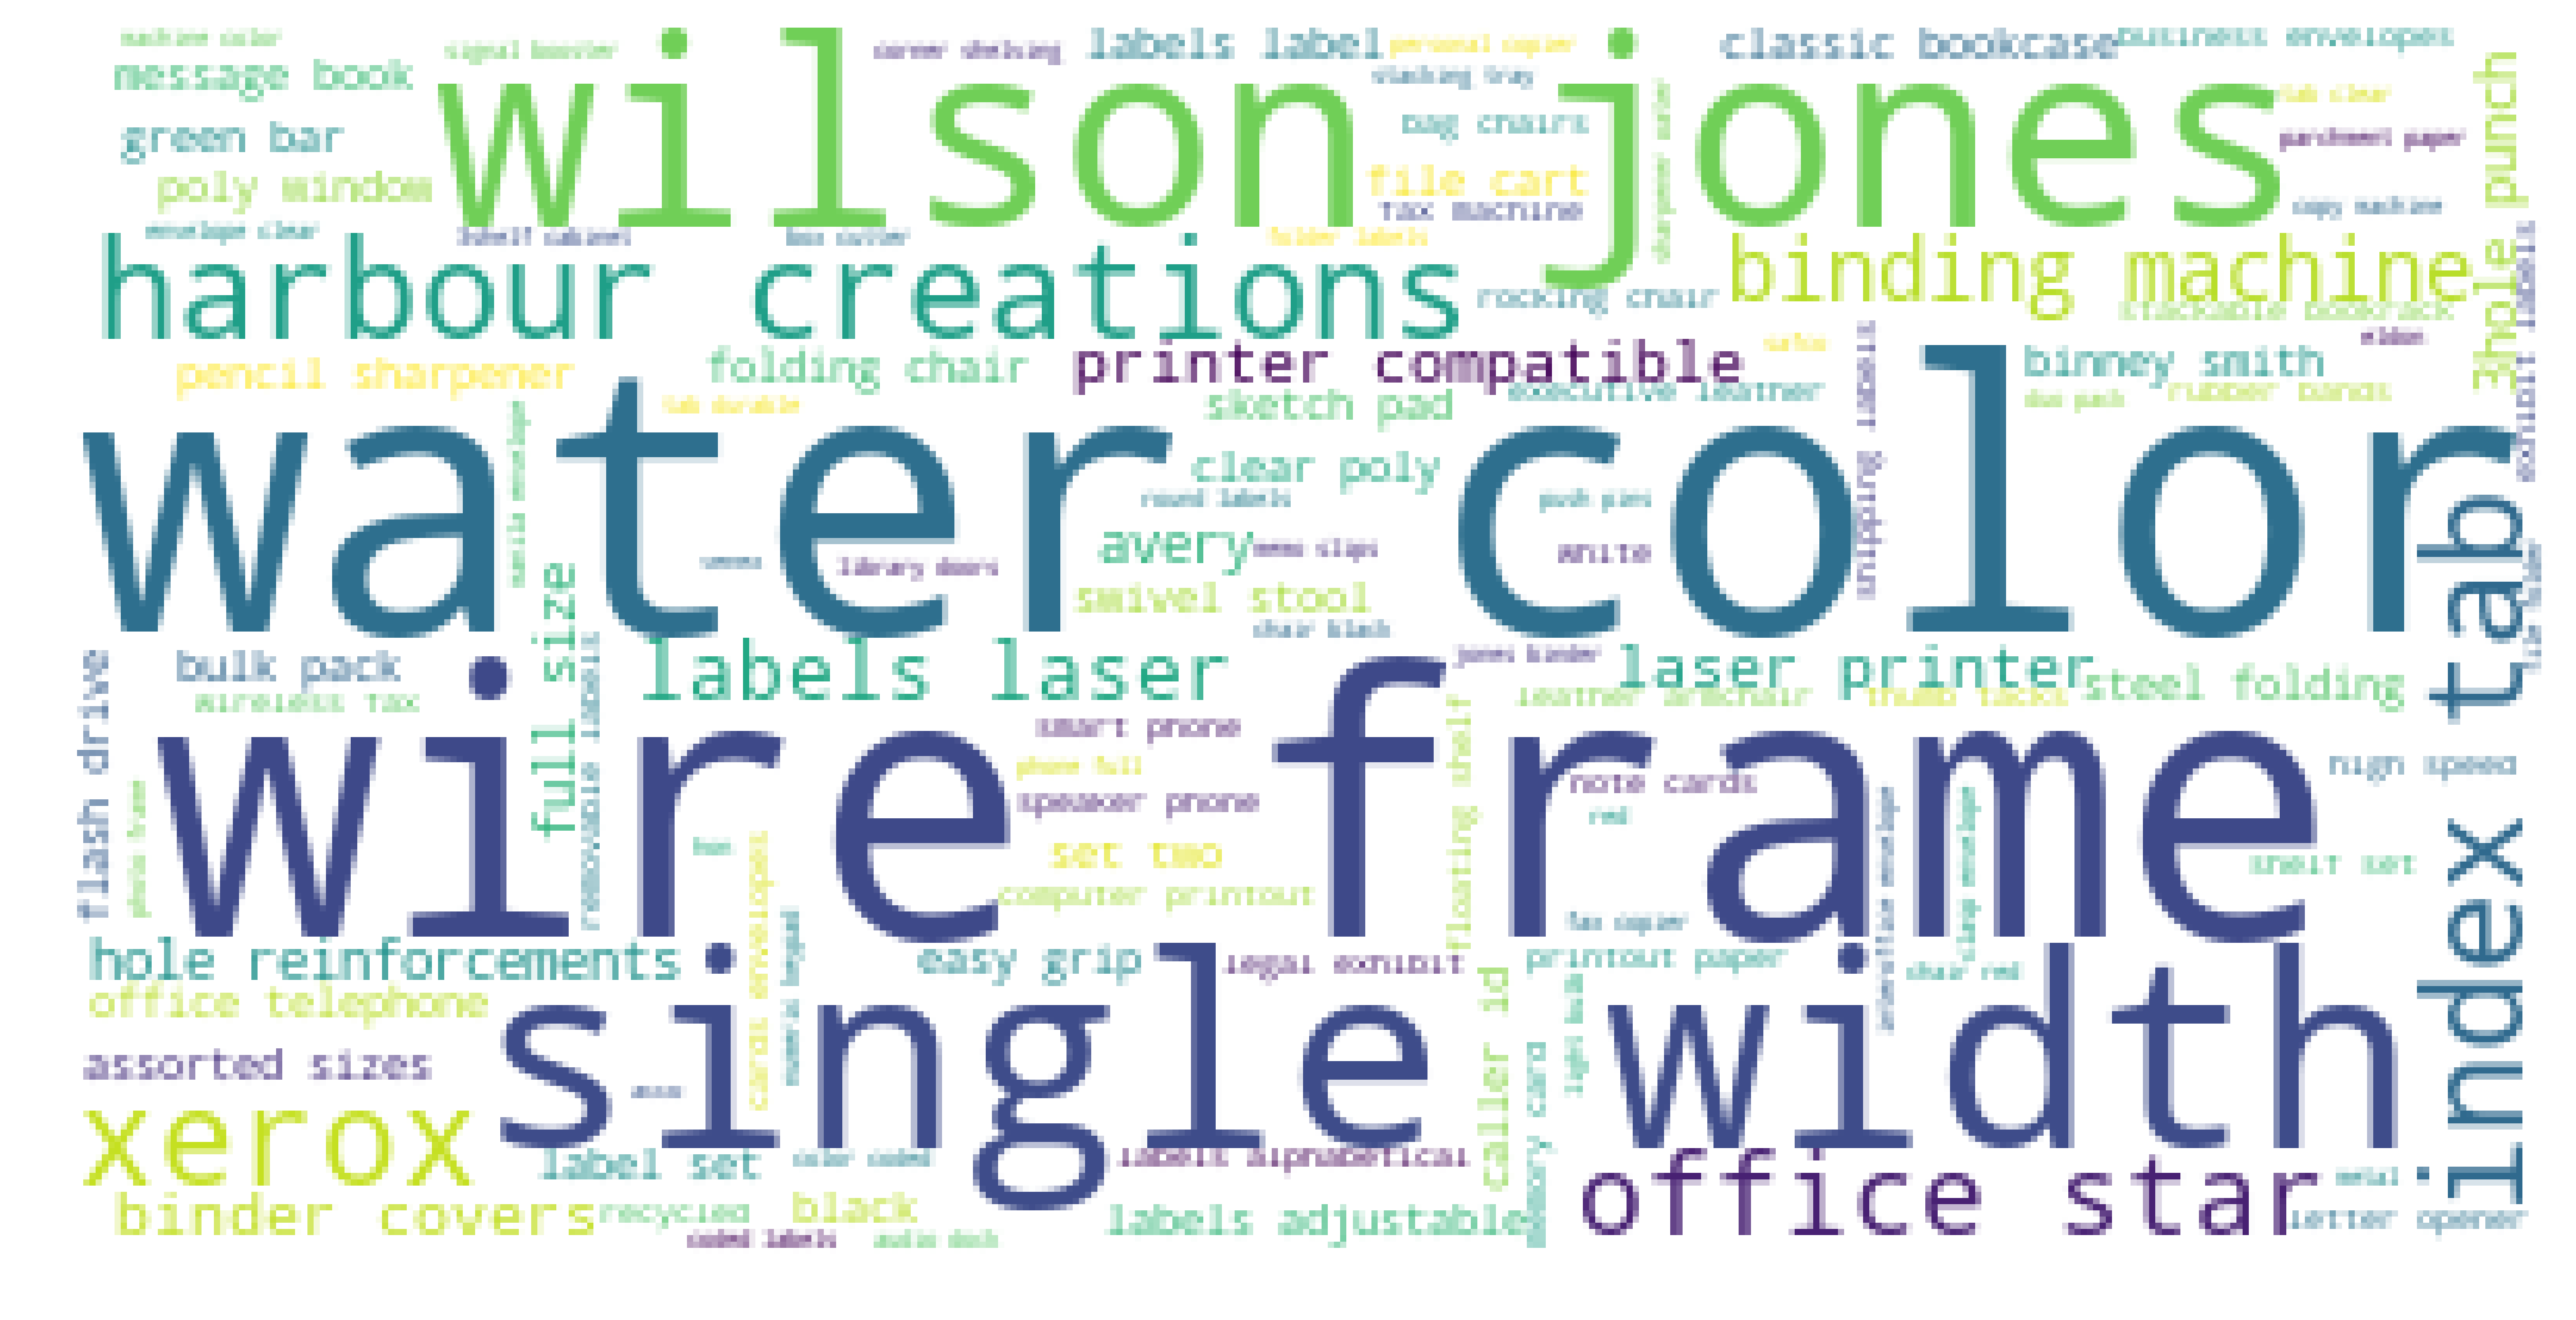

Month : 11


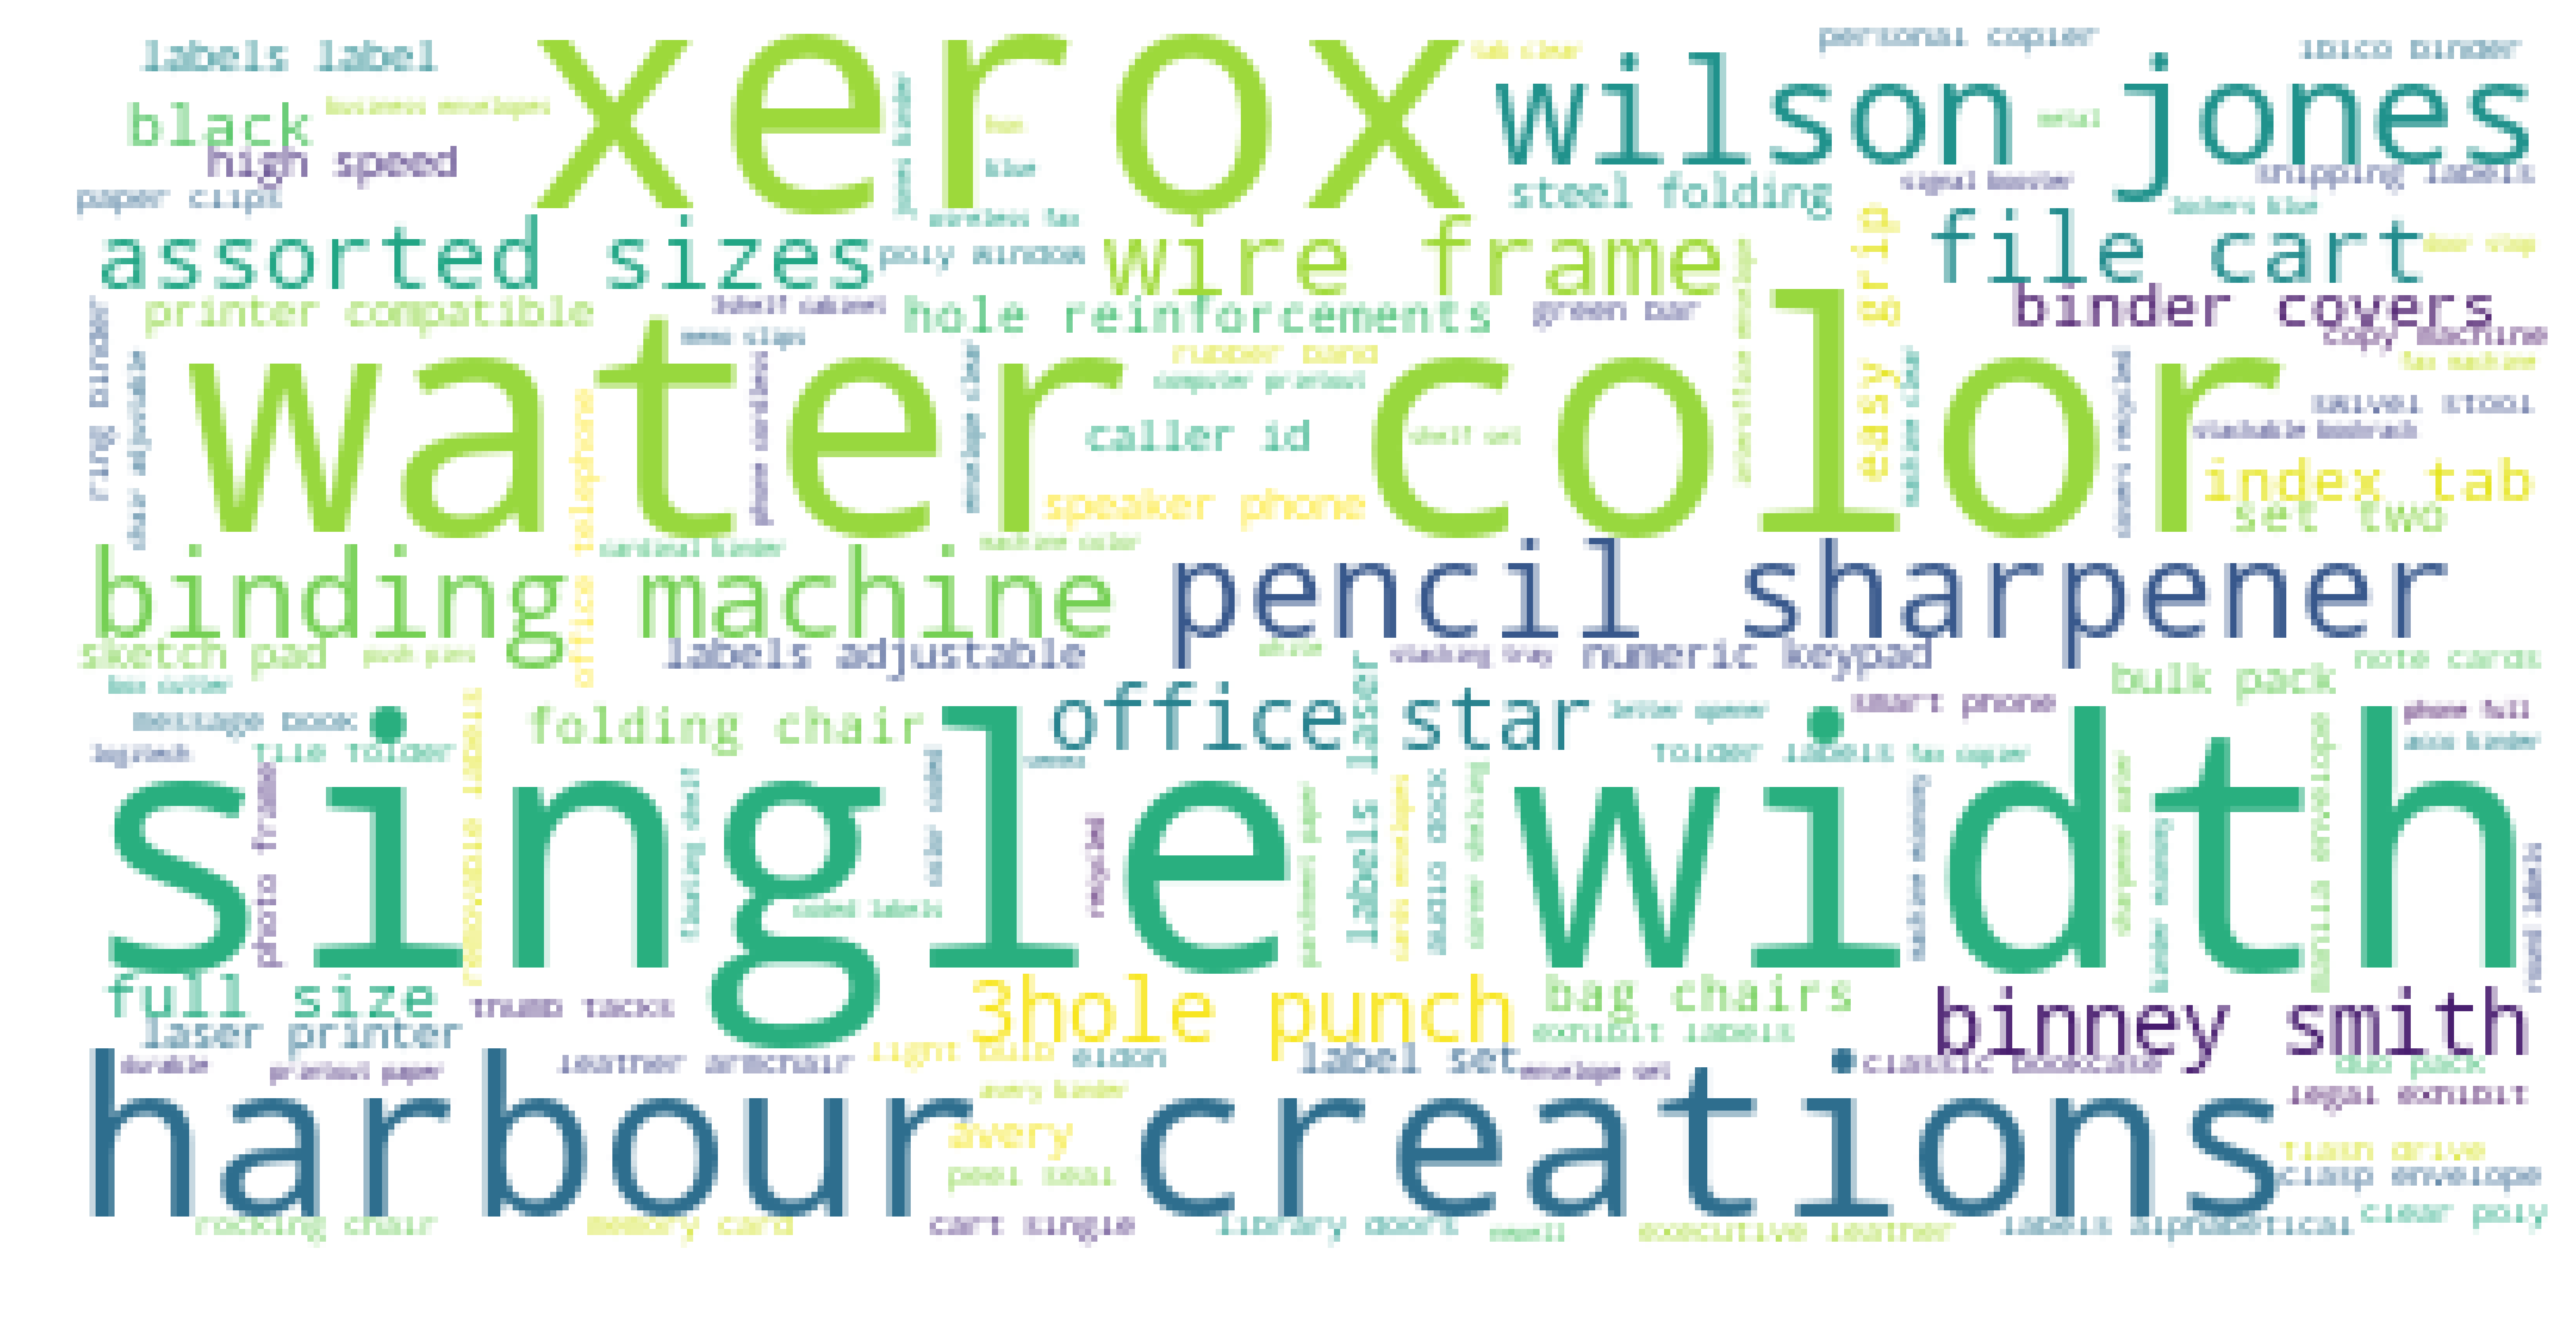

Month : 12


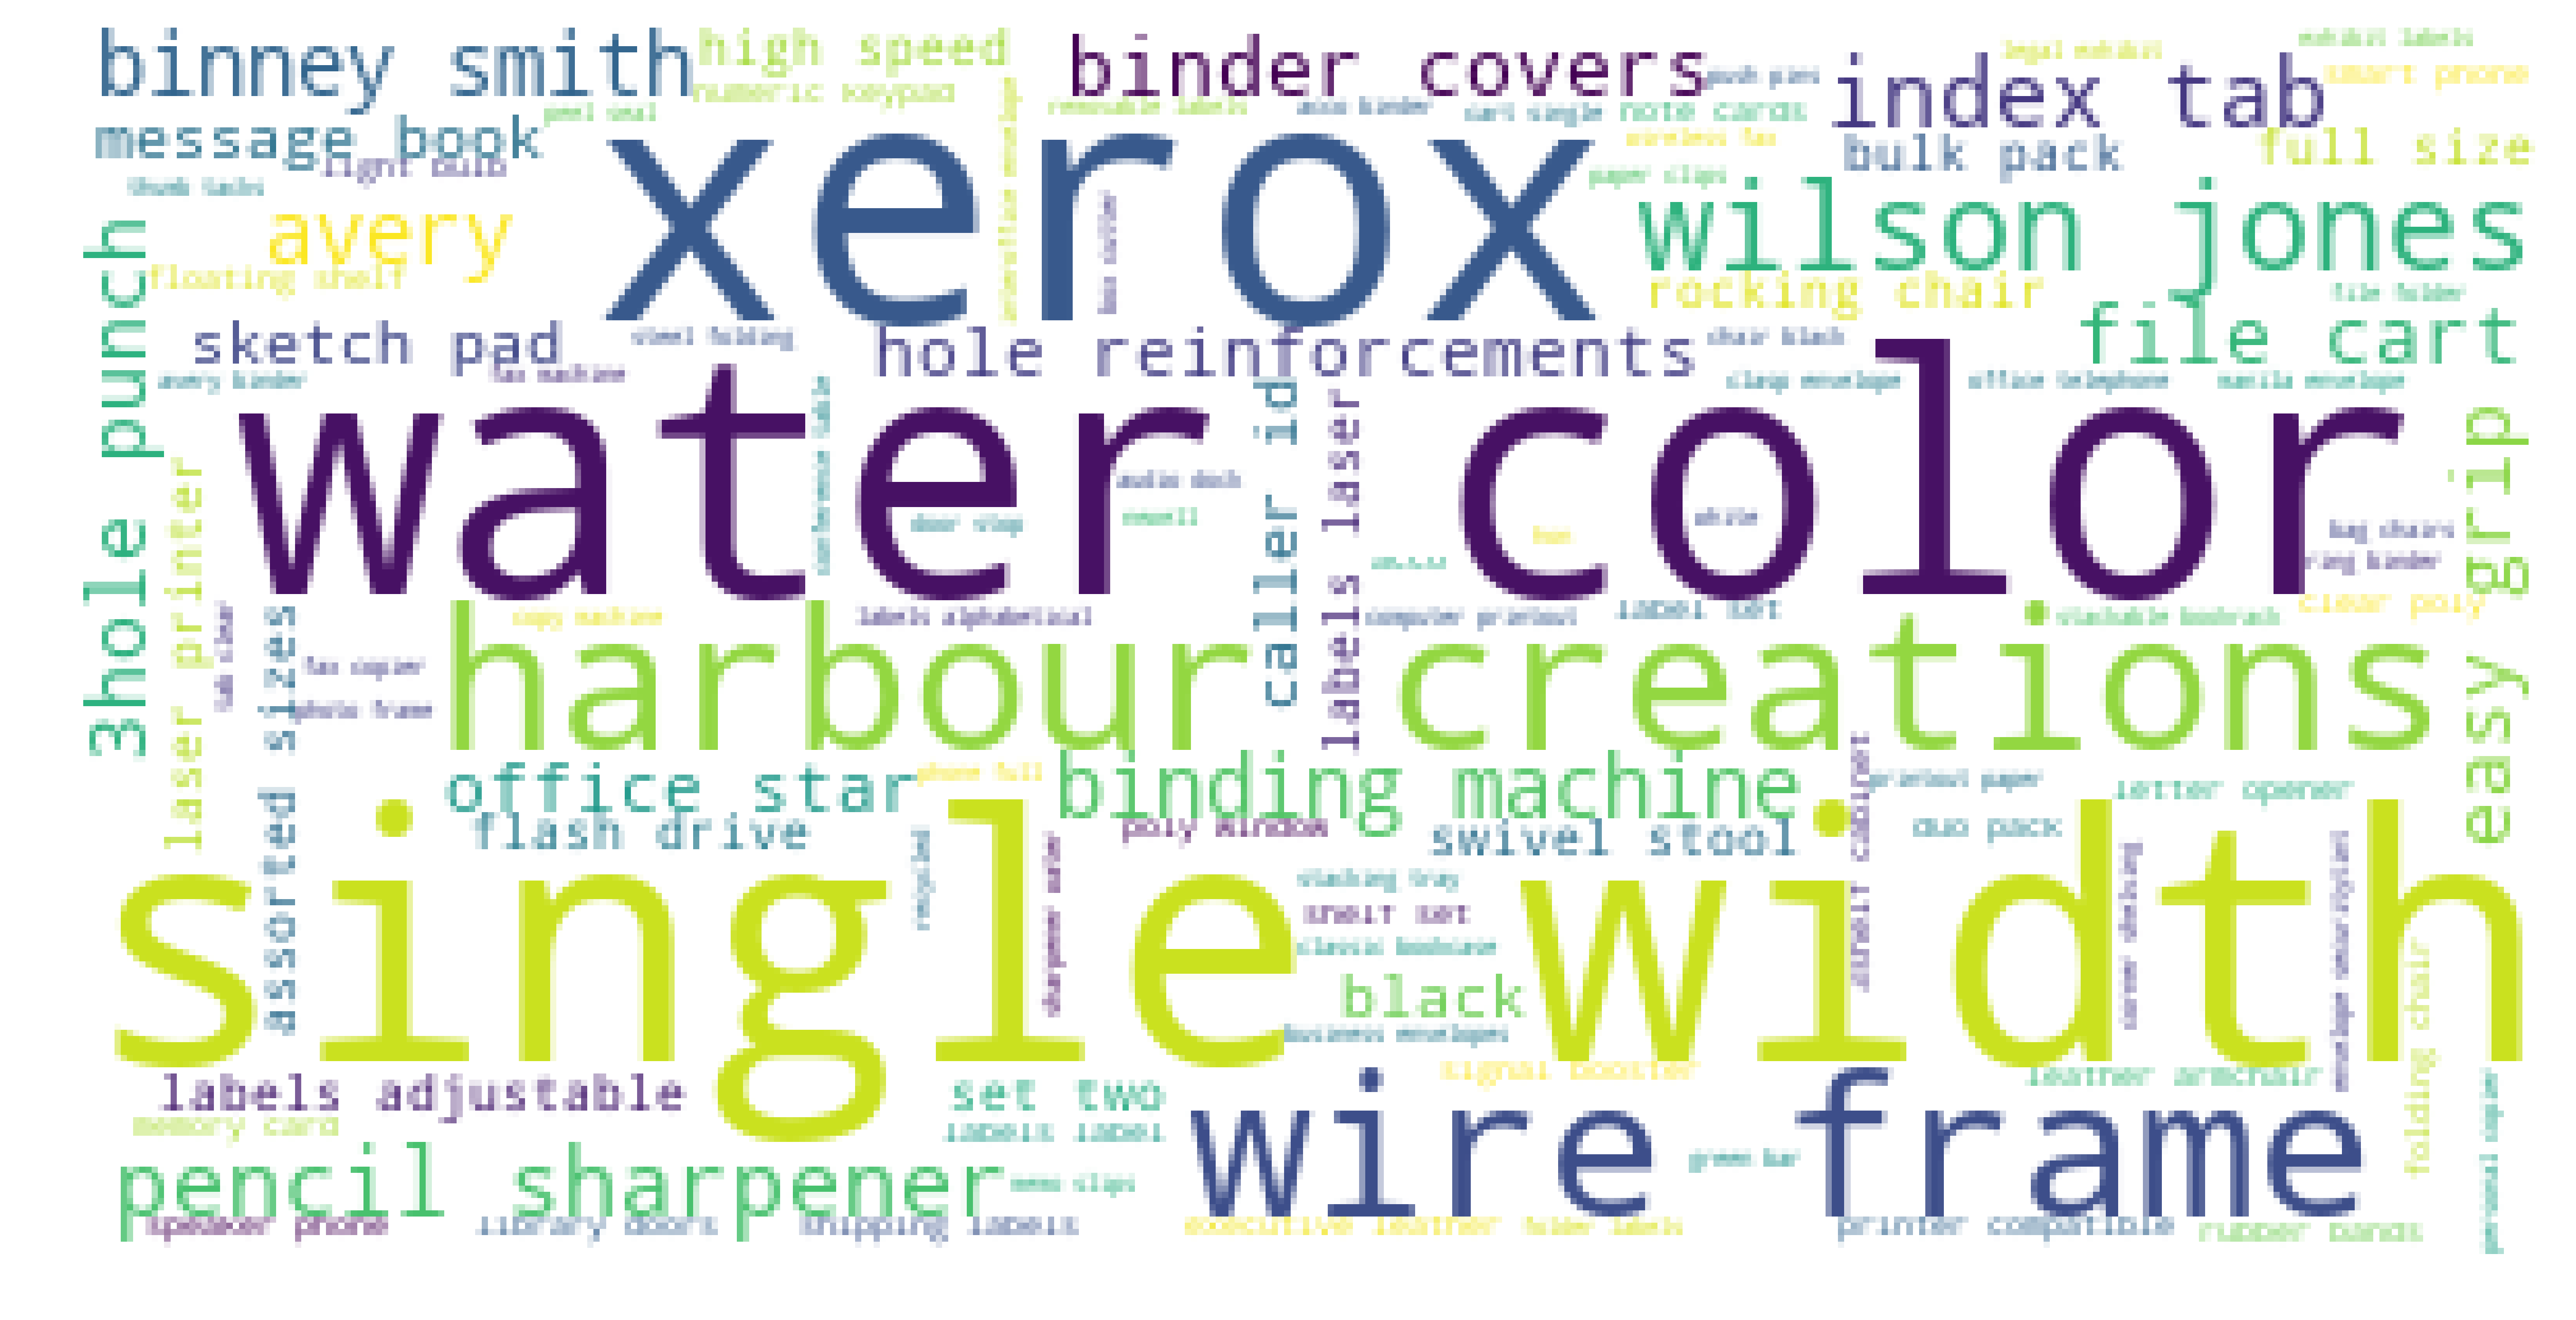

In [7]:
#Word Cloud from Product.Name by Order.Month
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

monthly_words = {}
for i in range(1,13):
    text_chunk = ' '.join(Orders[Orders['Order.Month'] == i]['Product.Name']).lower()
    text_chunk = re.sub('[:\',\-!;"()?”“’|=%\[\]/£+$><]',"", text_chunk)
    print('Month : ' + str(i))
    wordcloud = WordCloud(background_color="white",max_words=len(text_chunk),max_font_size=80, relative_scaling=.5).generate(text_chunk)
    plt.figure(figsize=(20,10), dpi = 400)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    text_tokens = nltk.word_tokenize(text_chunk)
    monthly_words['%s' % i] = text_tokens

Month : 1


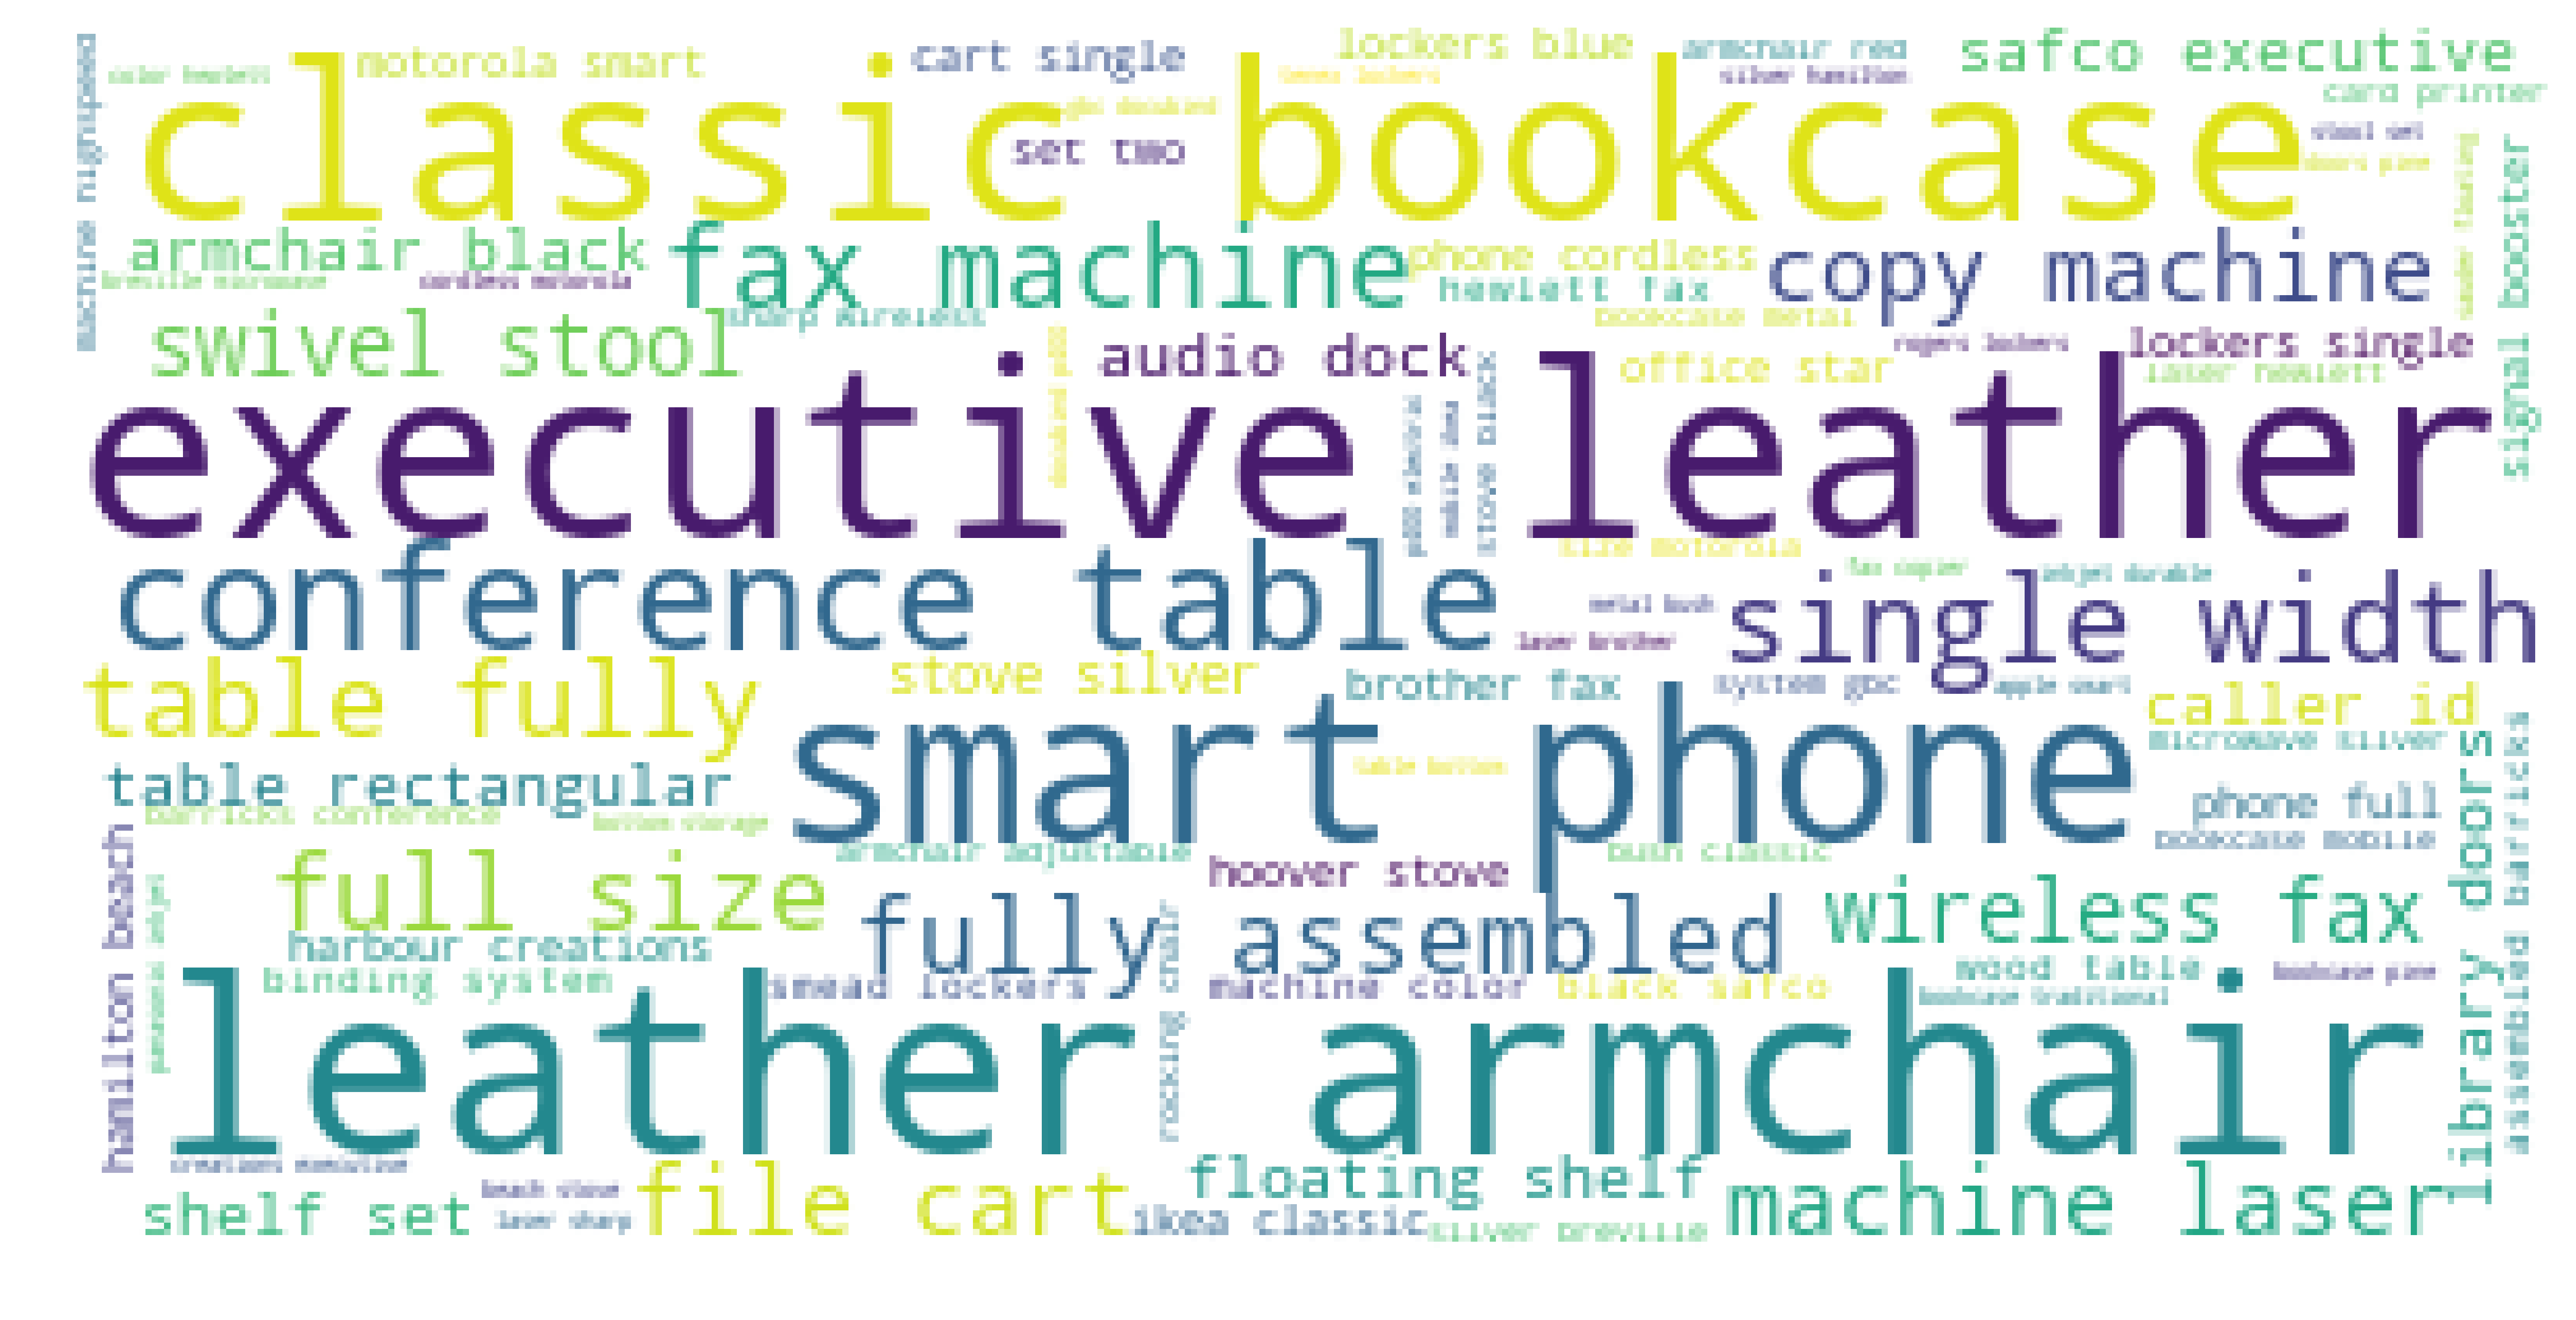

Month : 2


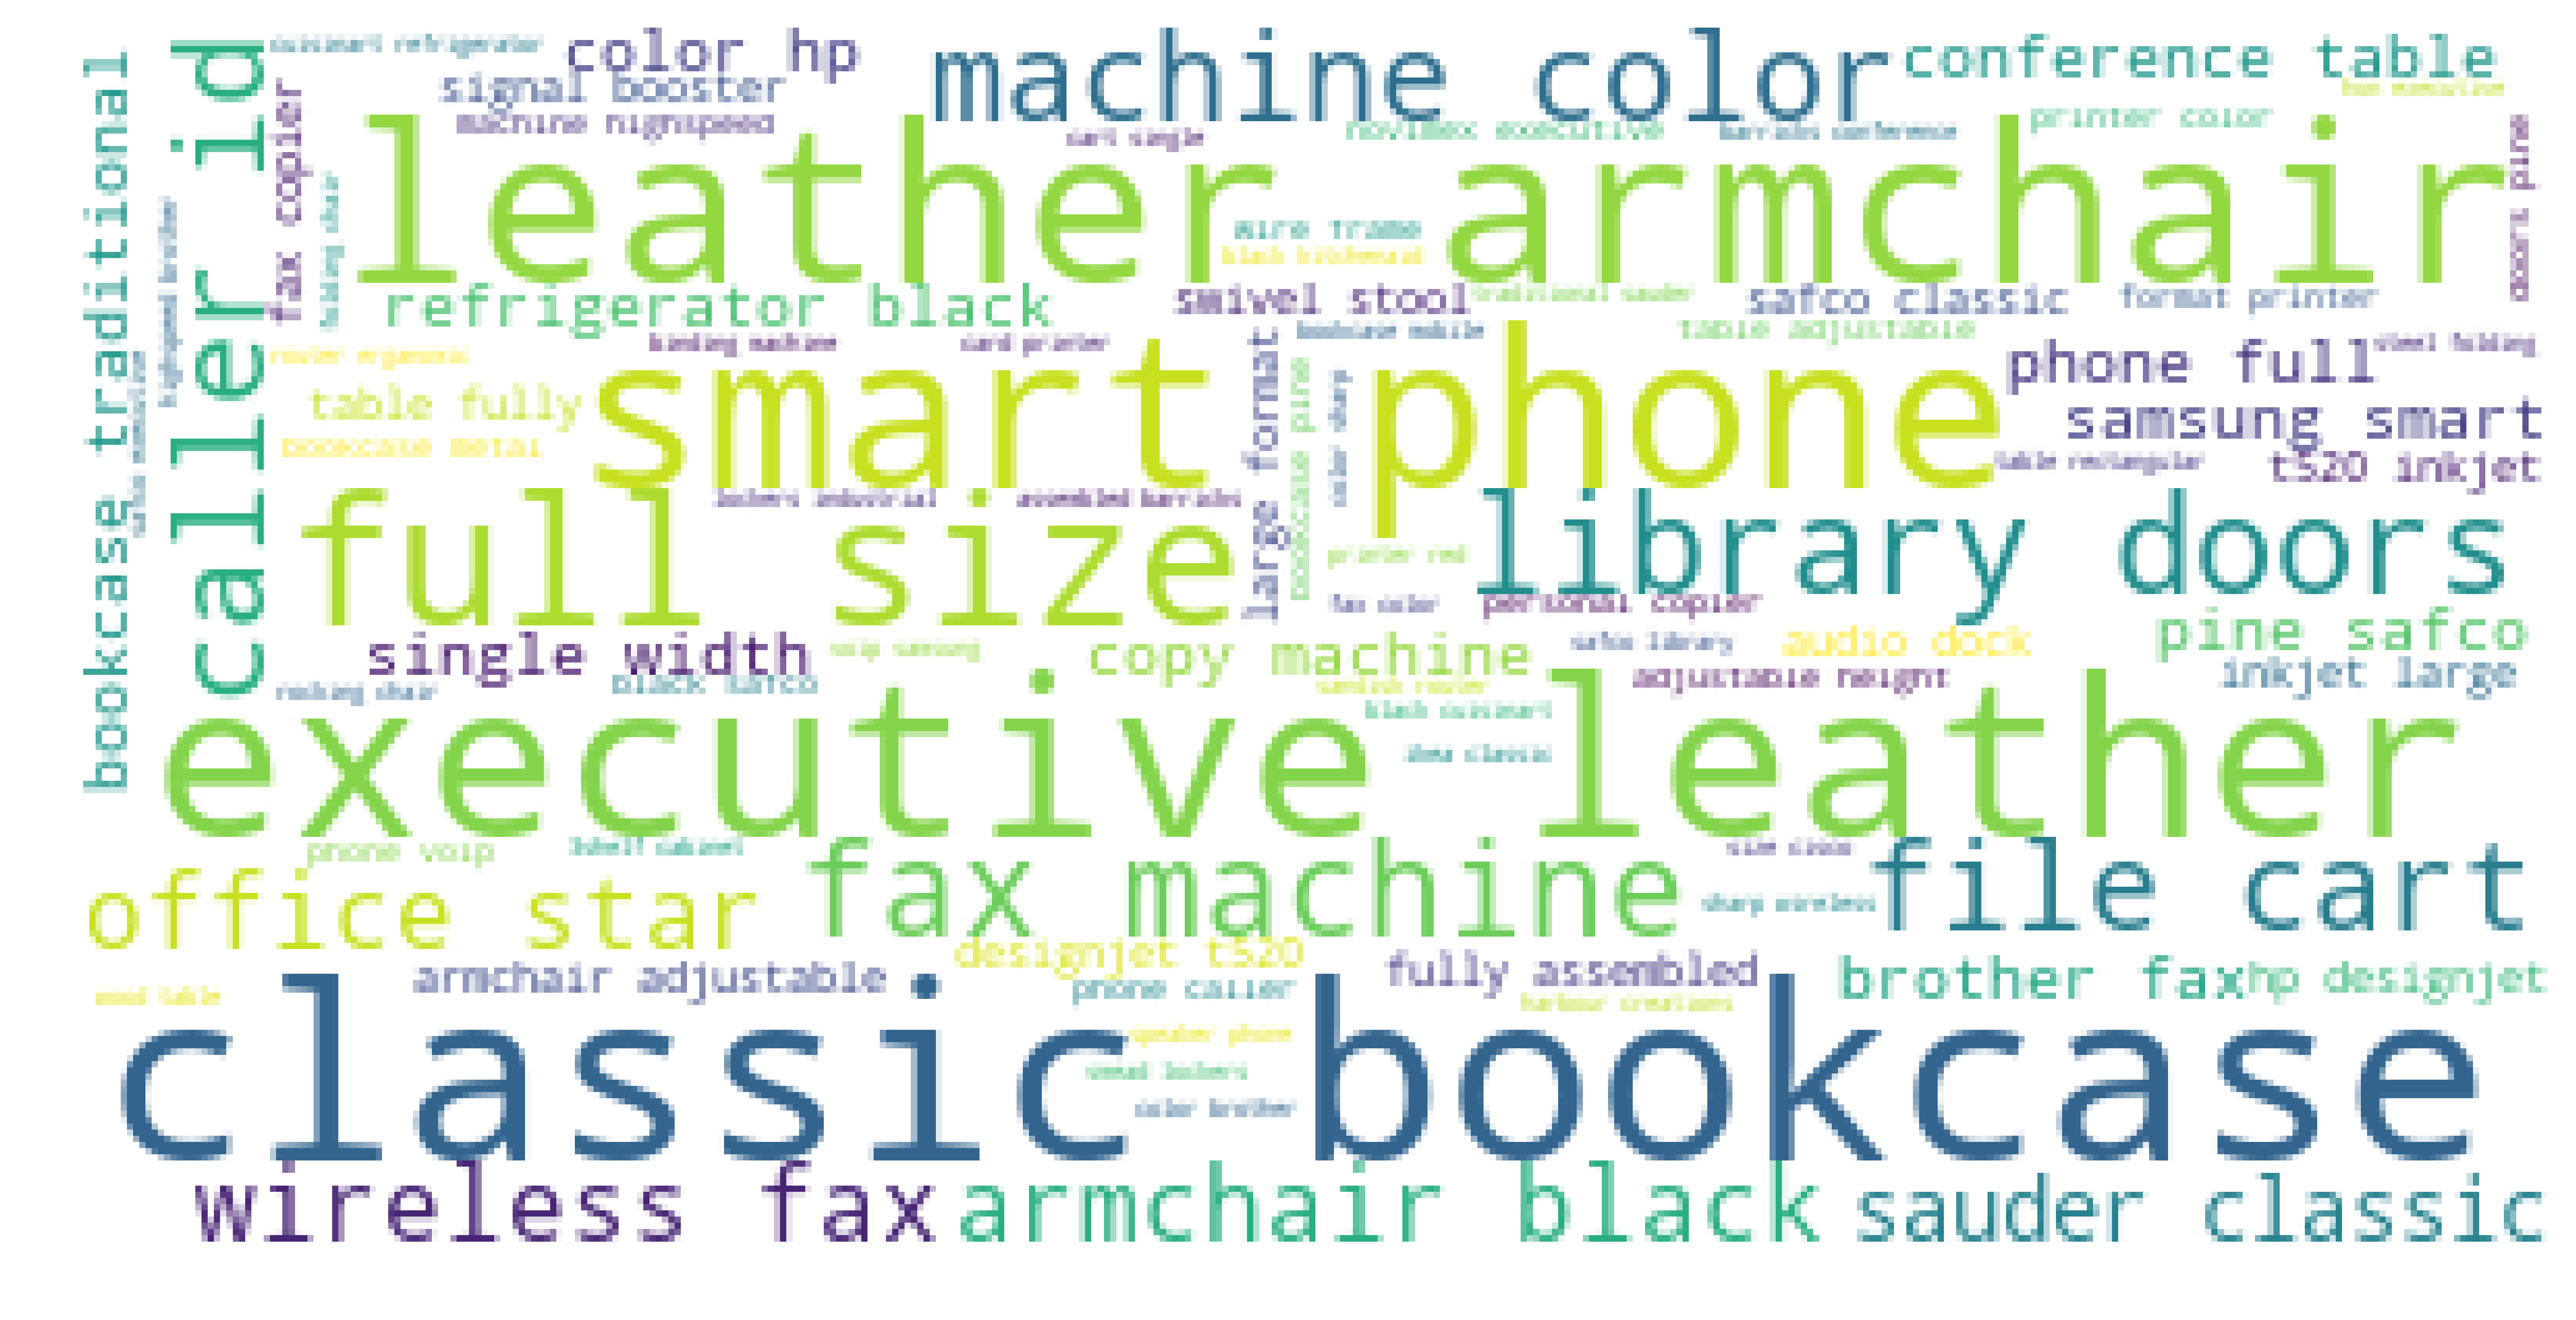

Month : 3


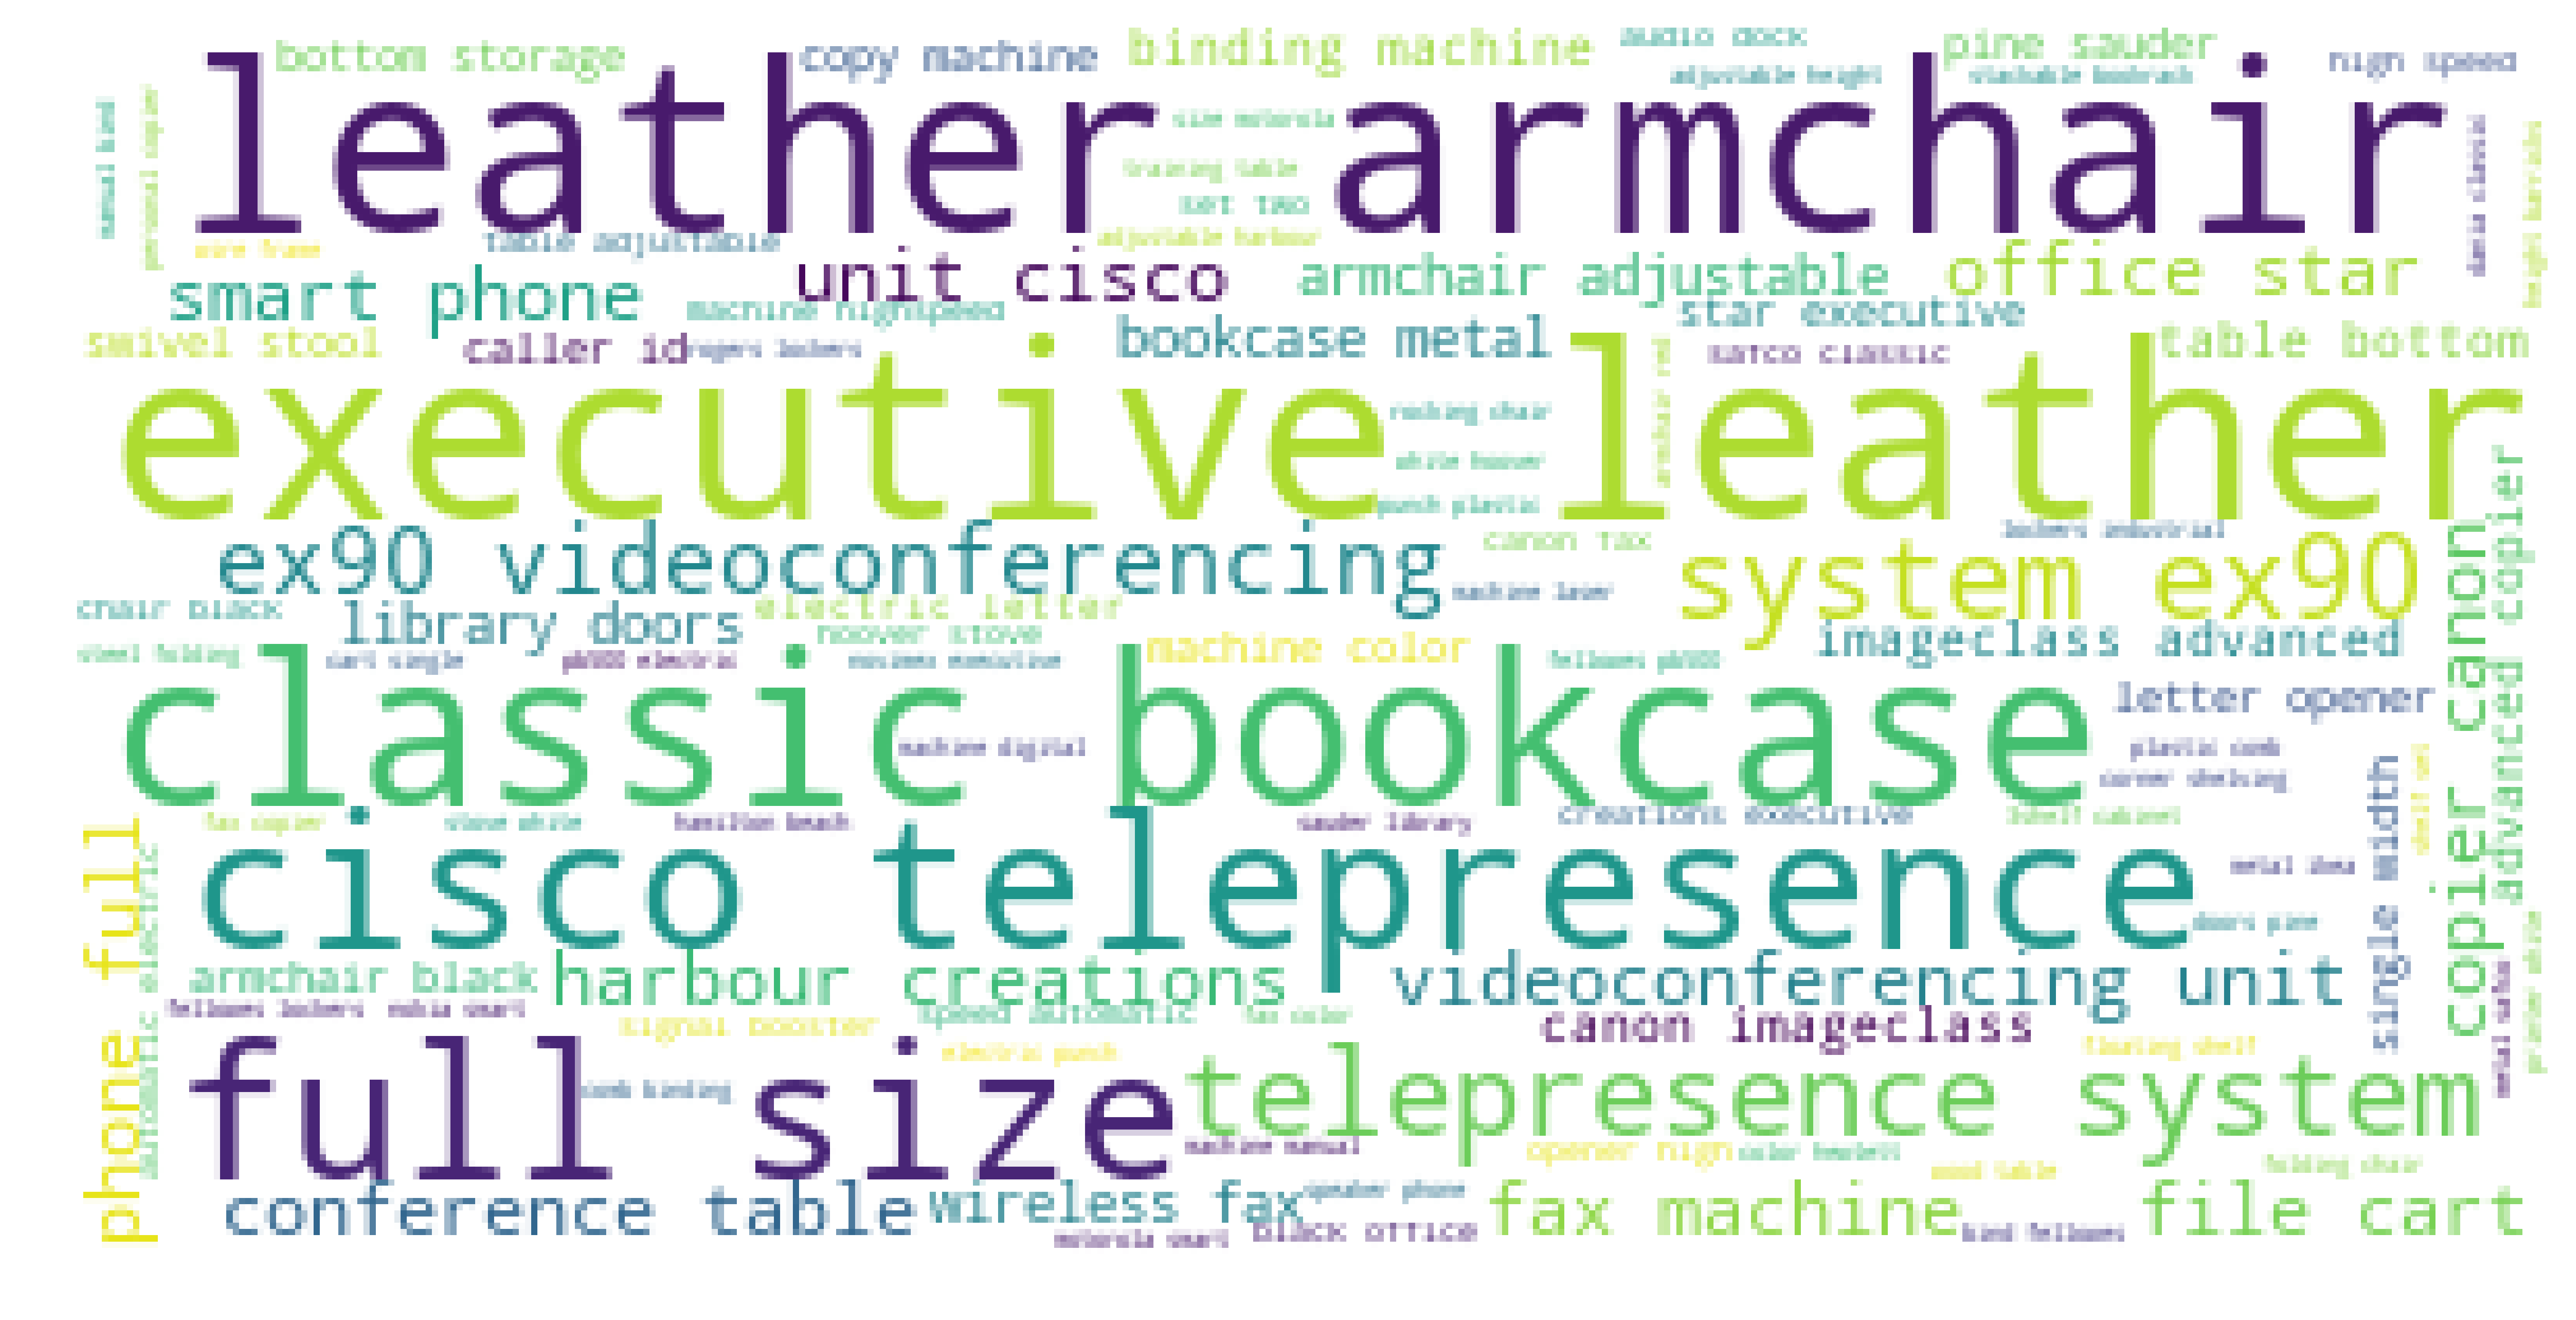

Month : 4


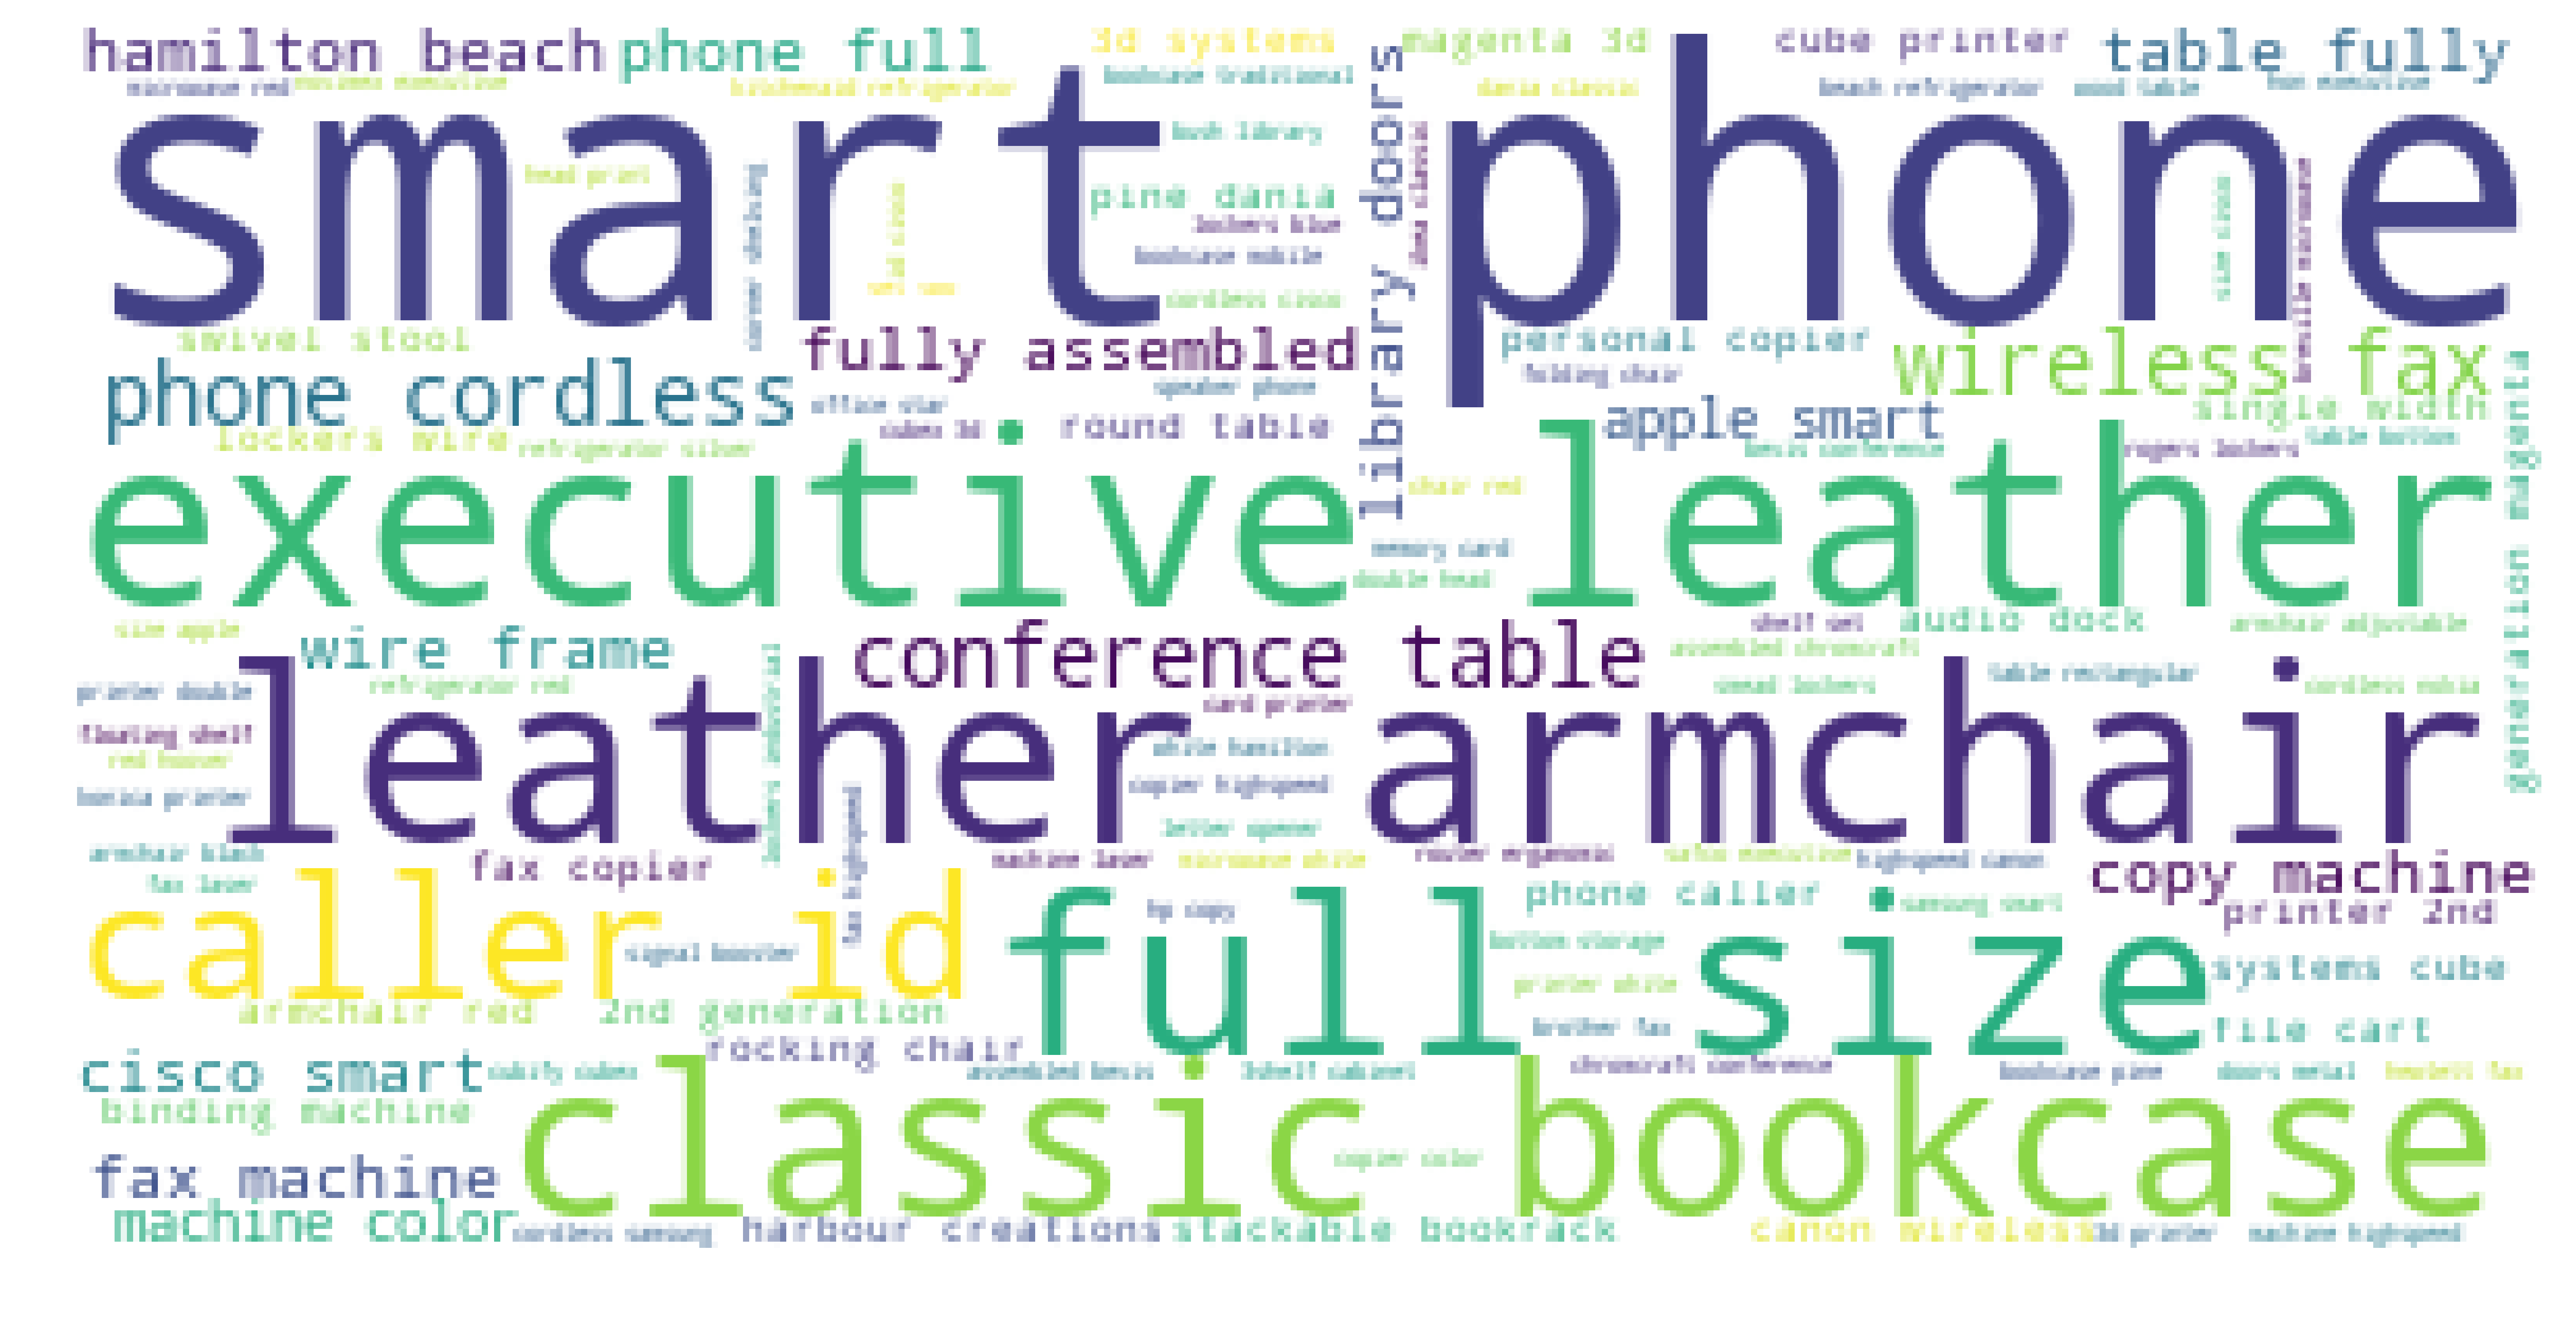

Month : 5


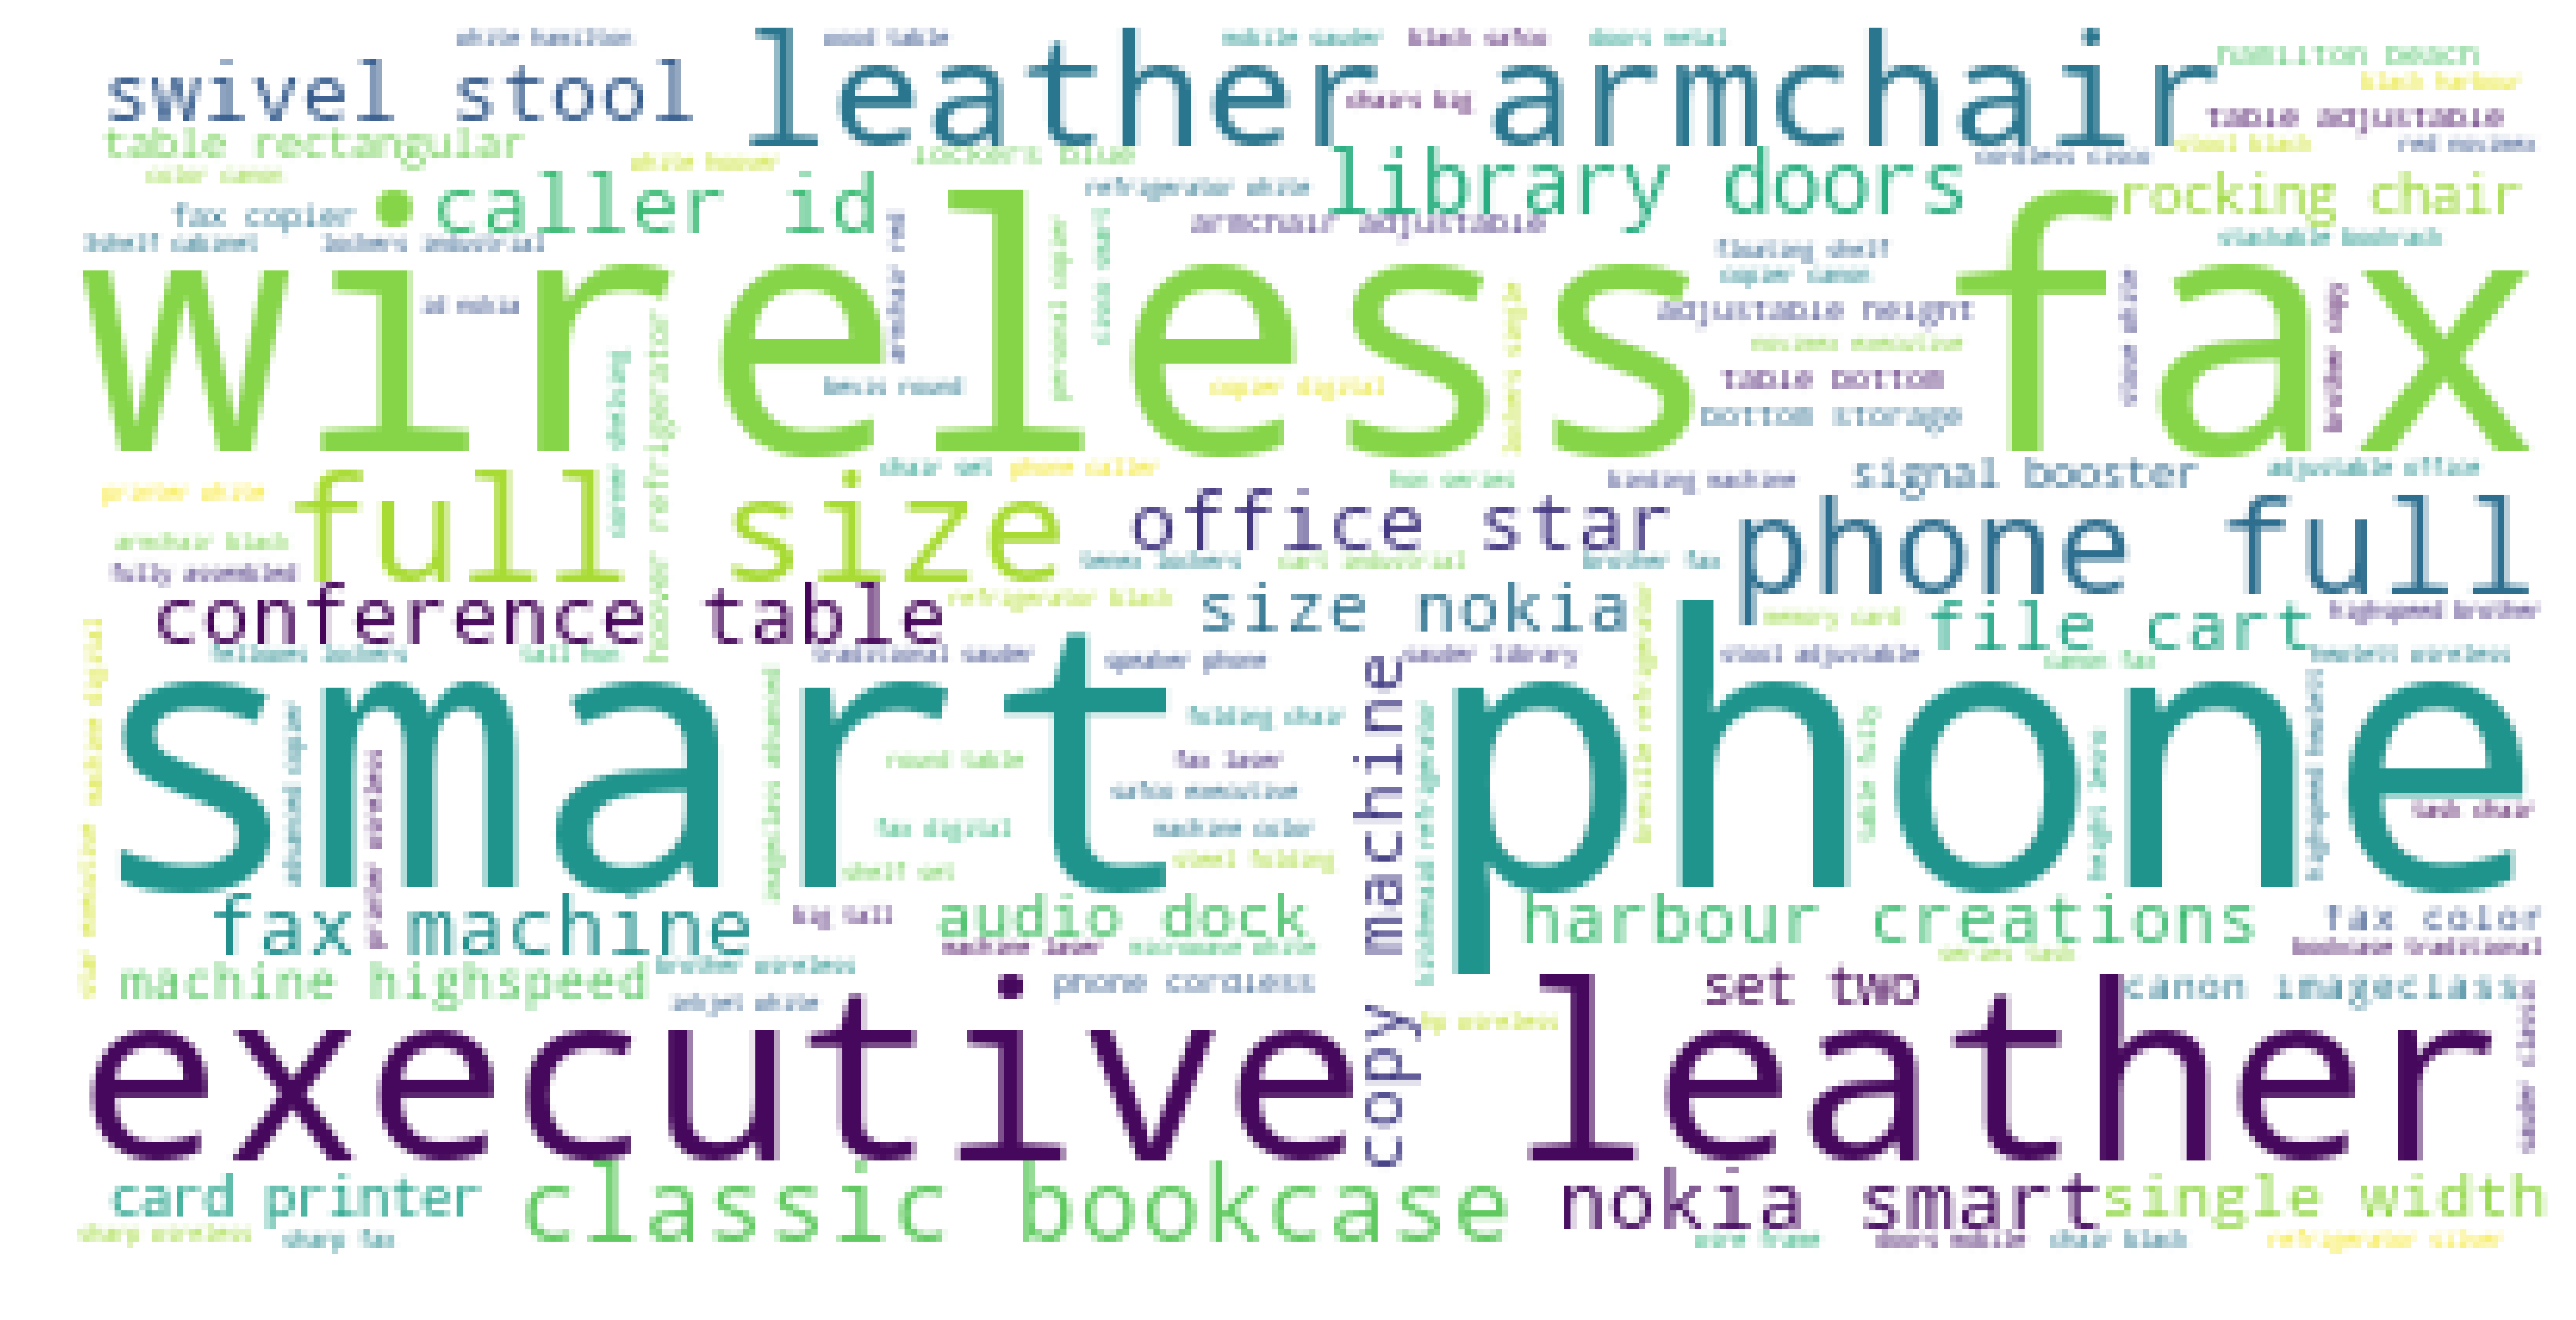

Month : 6


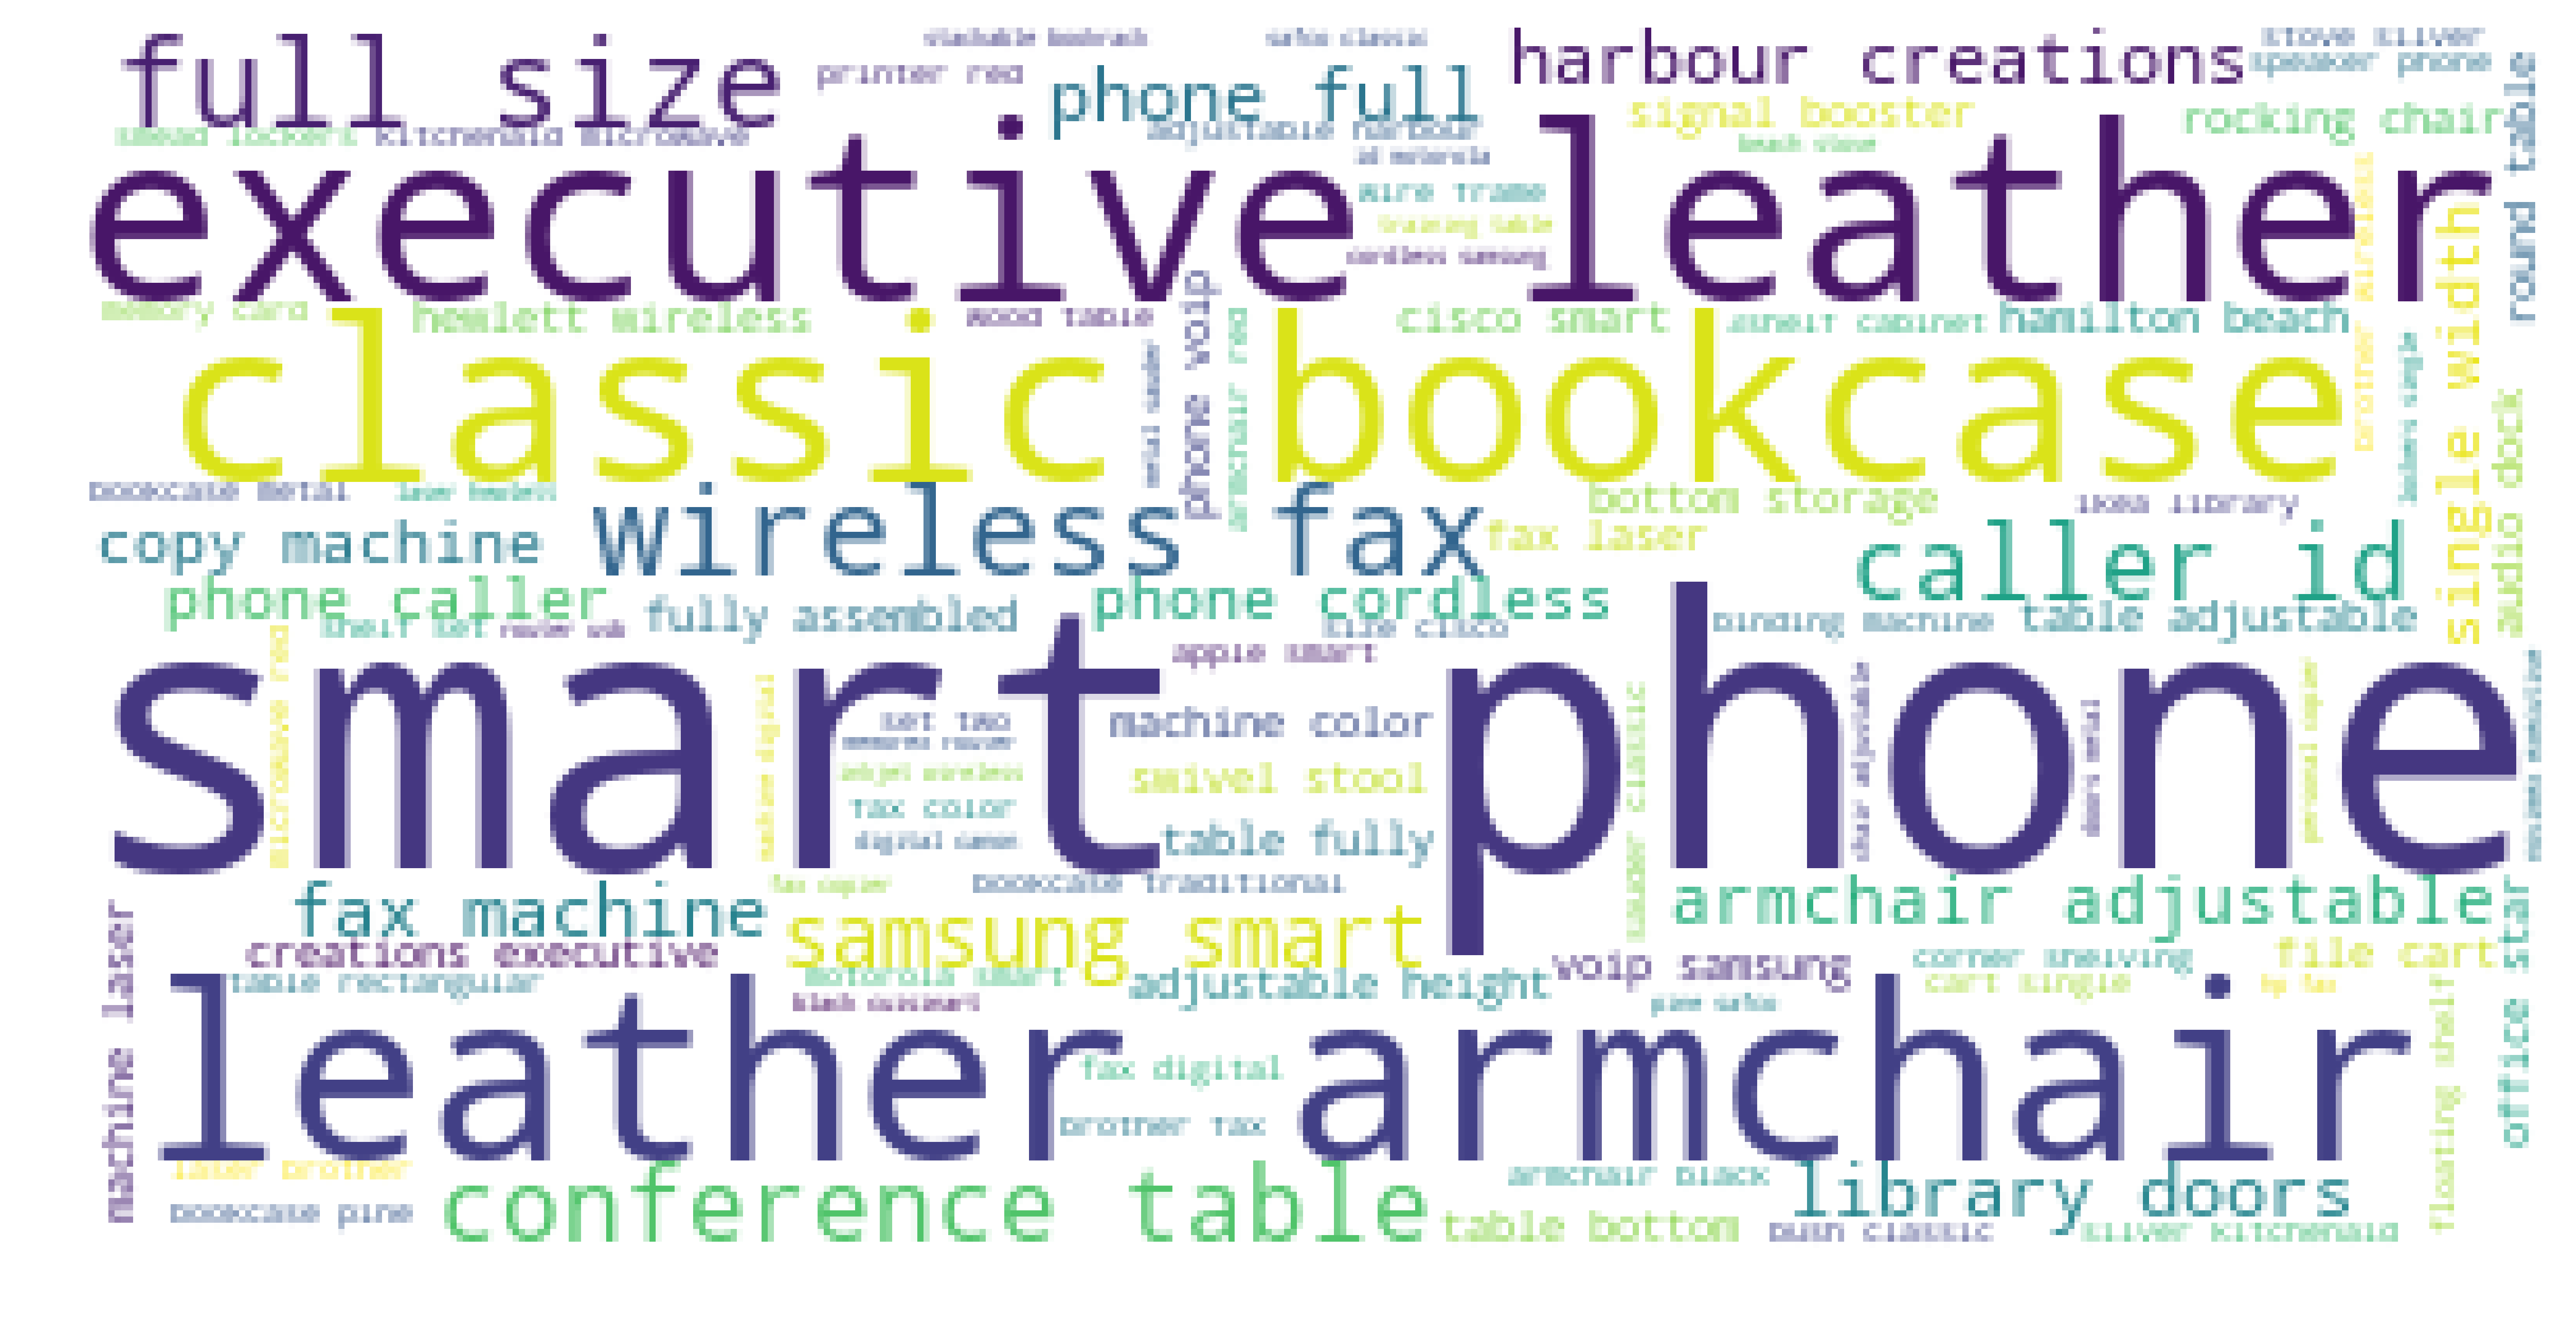

Month : 7


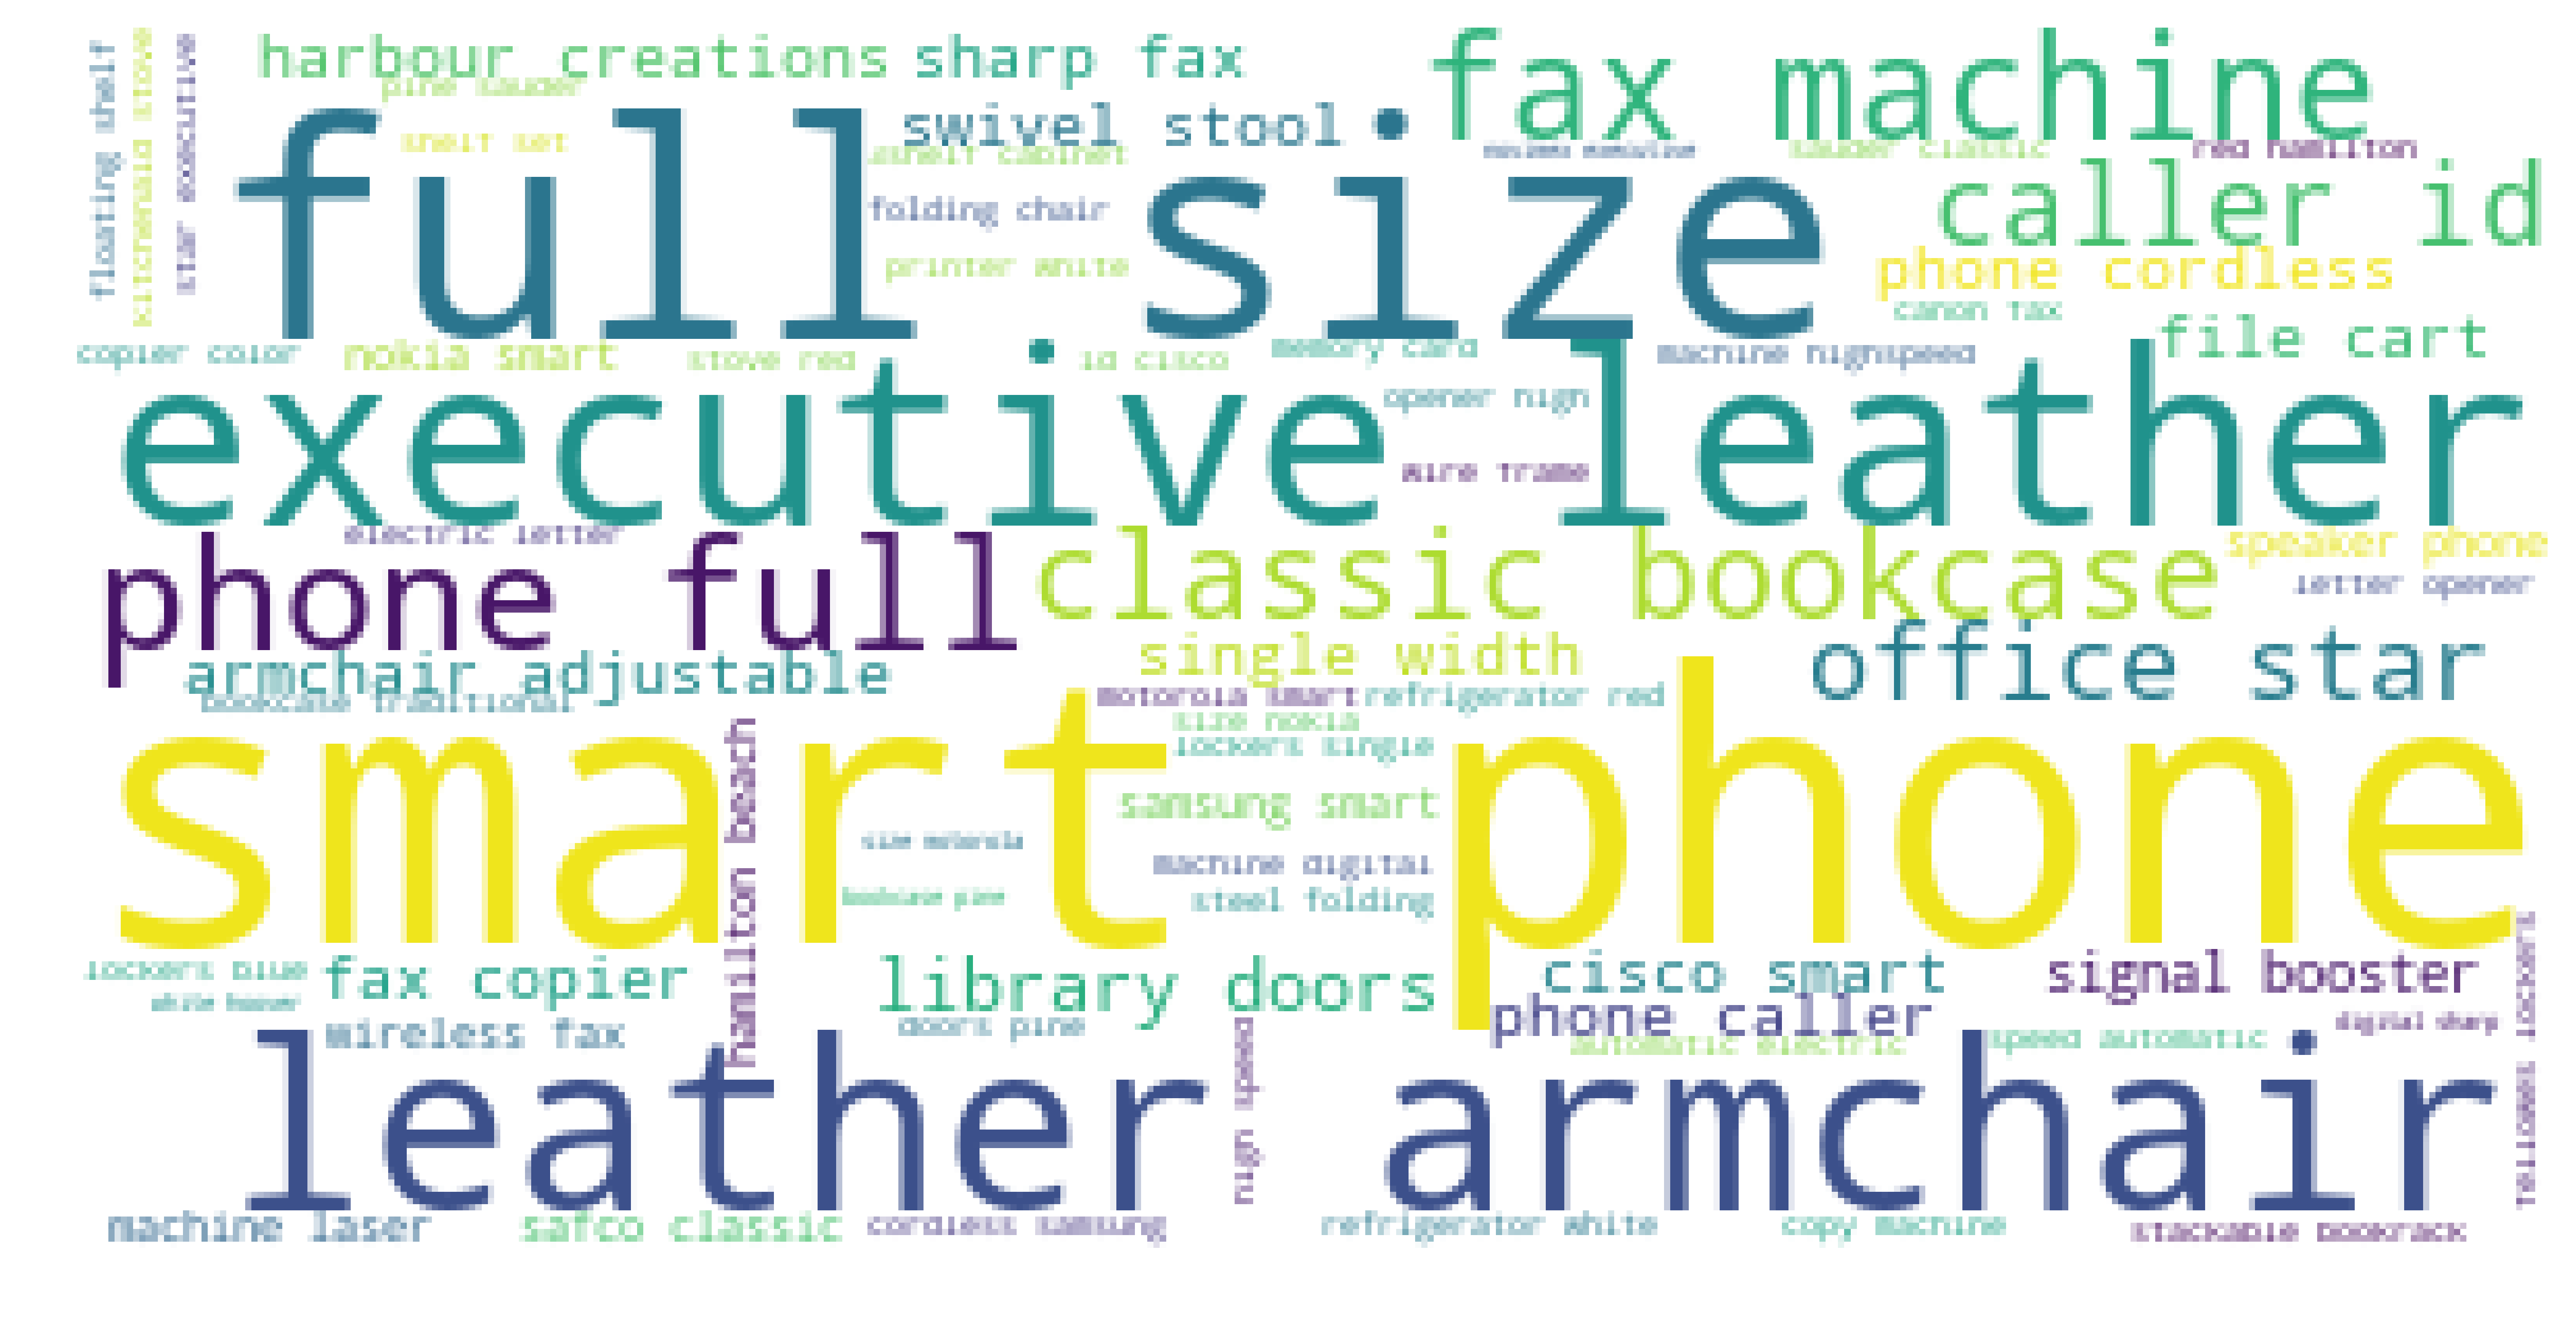

Month : 8


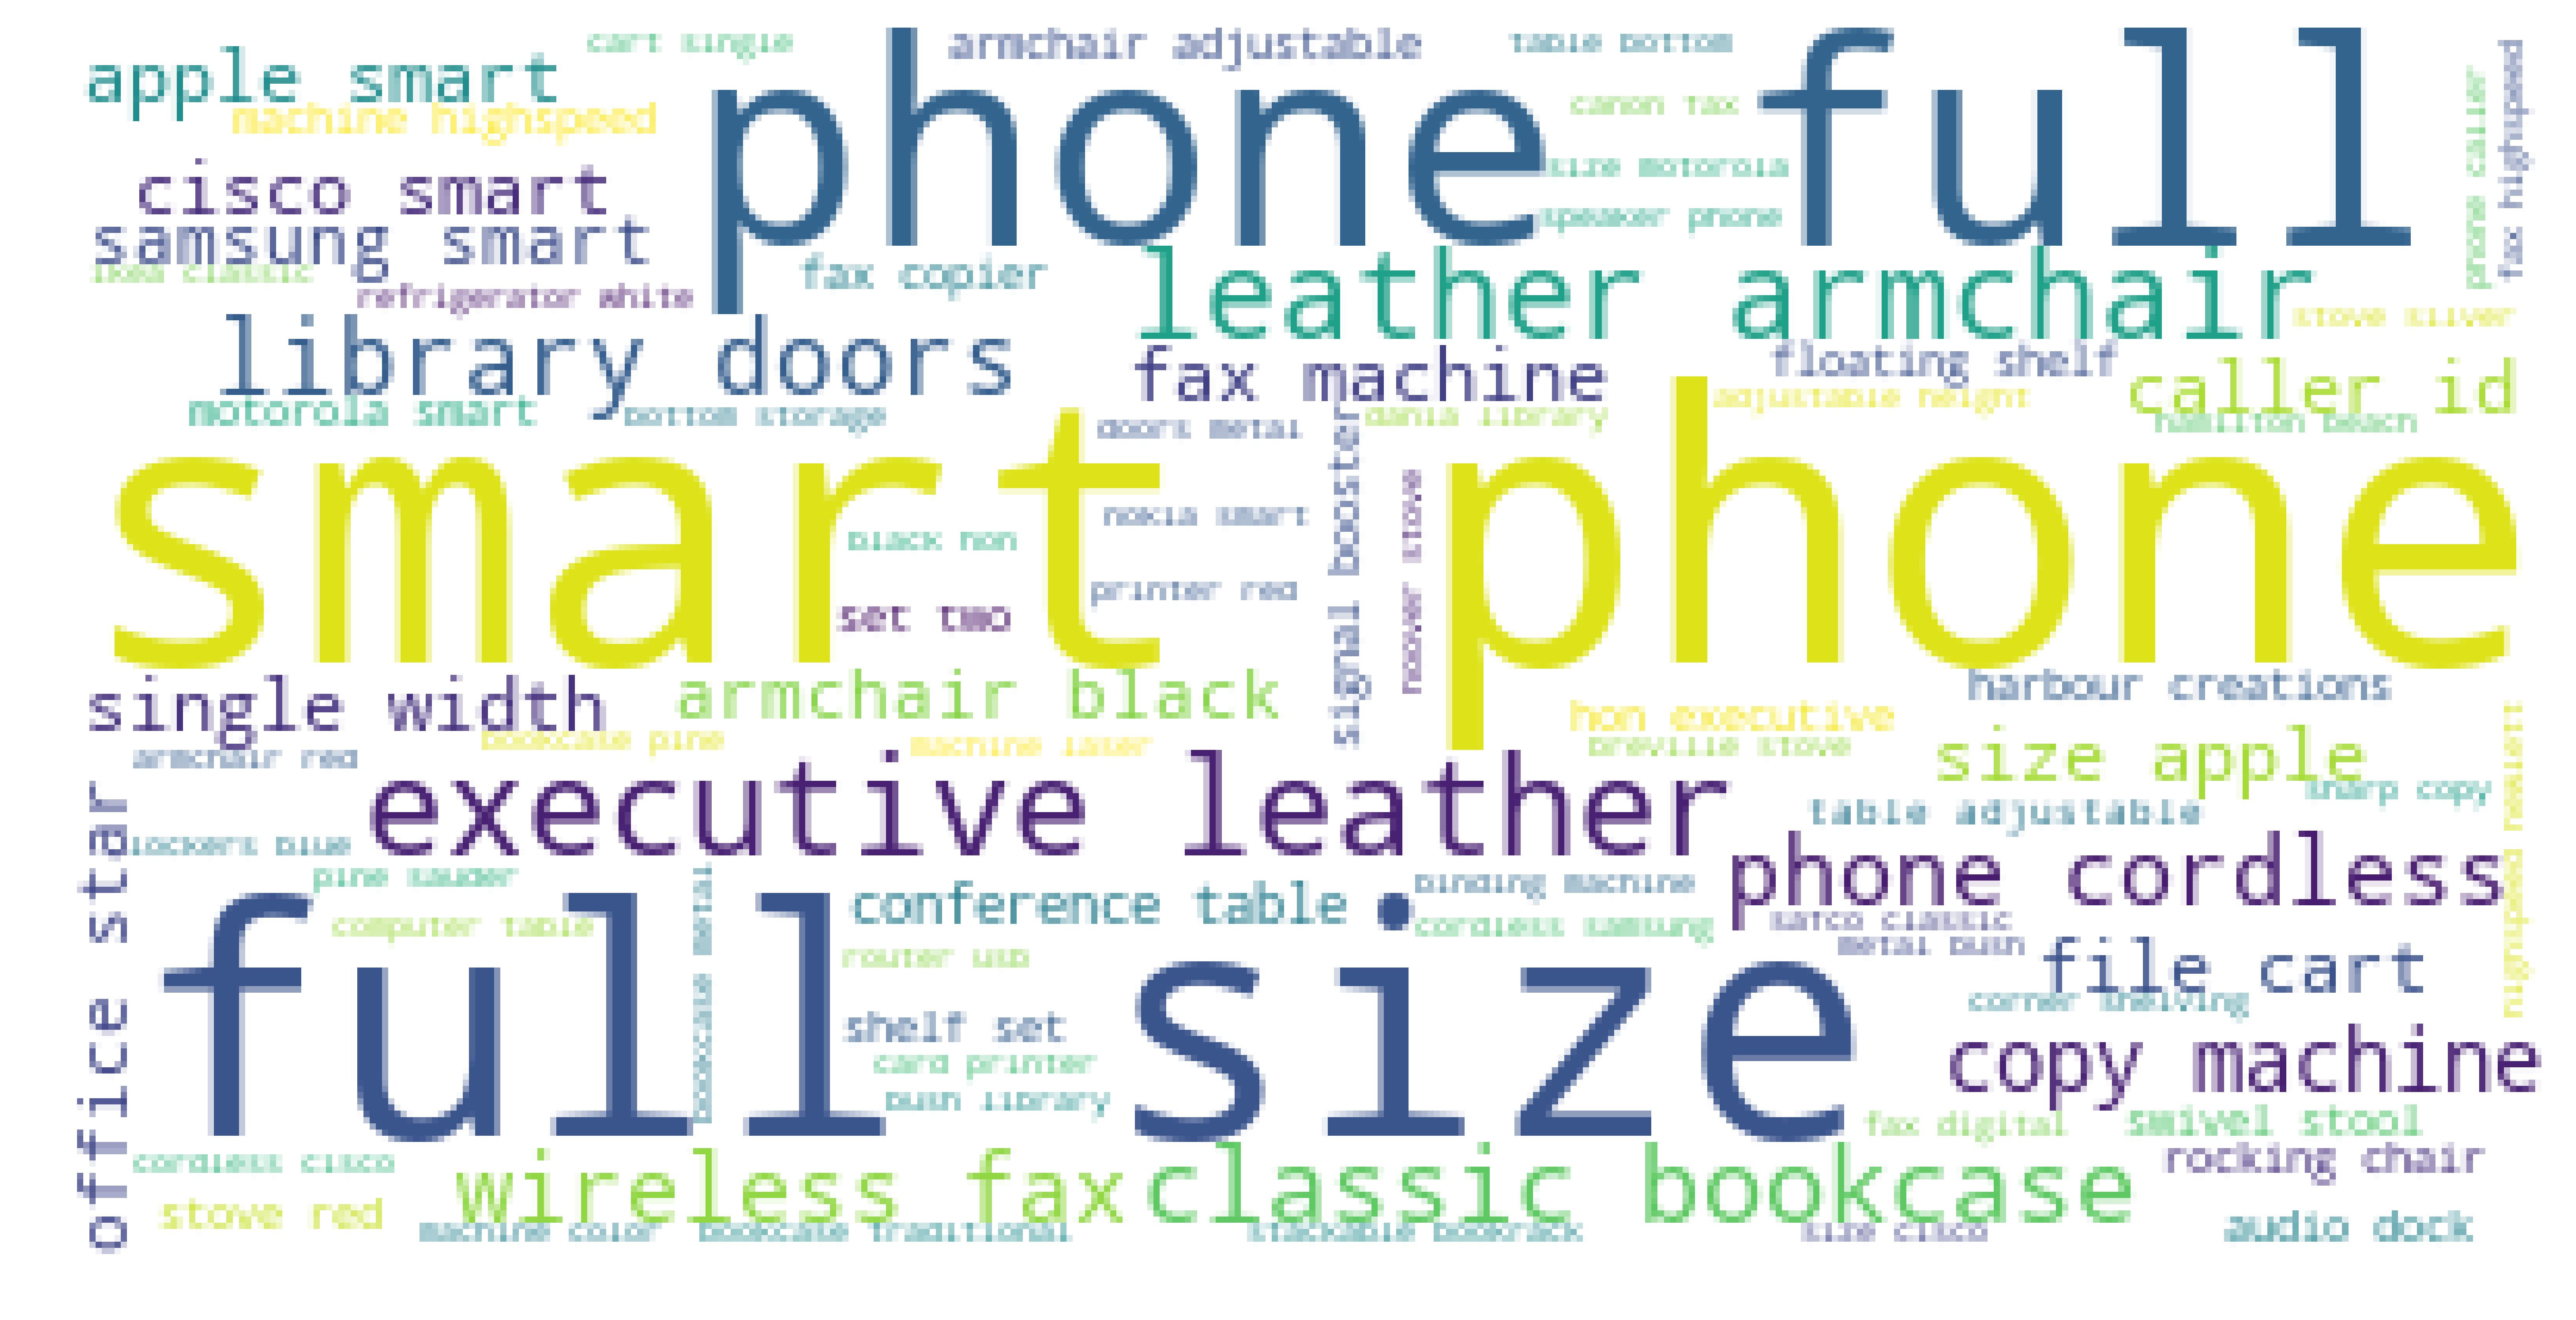

Month : 9


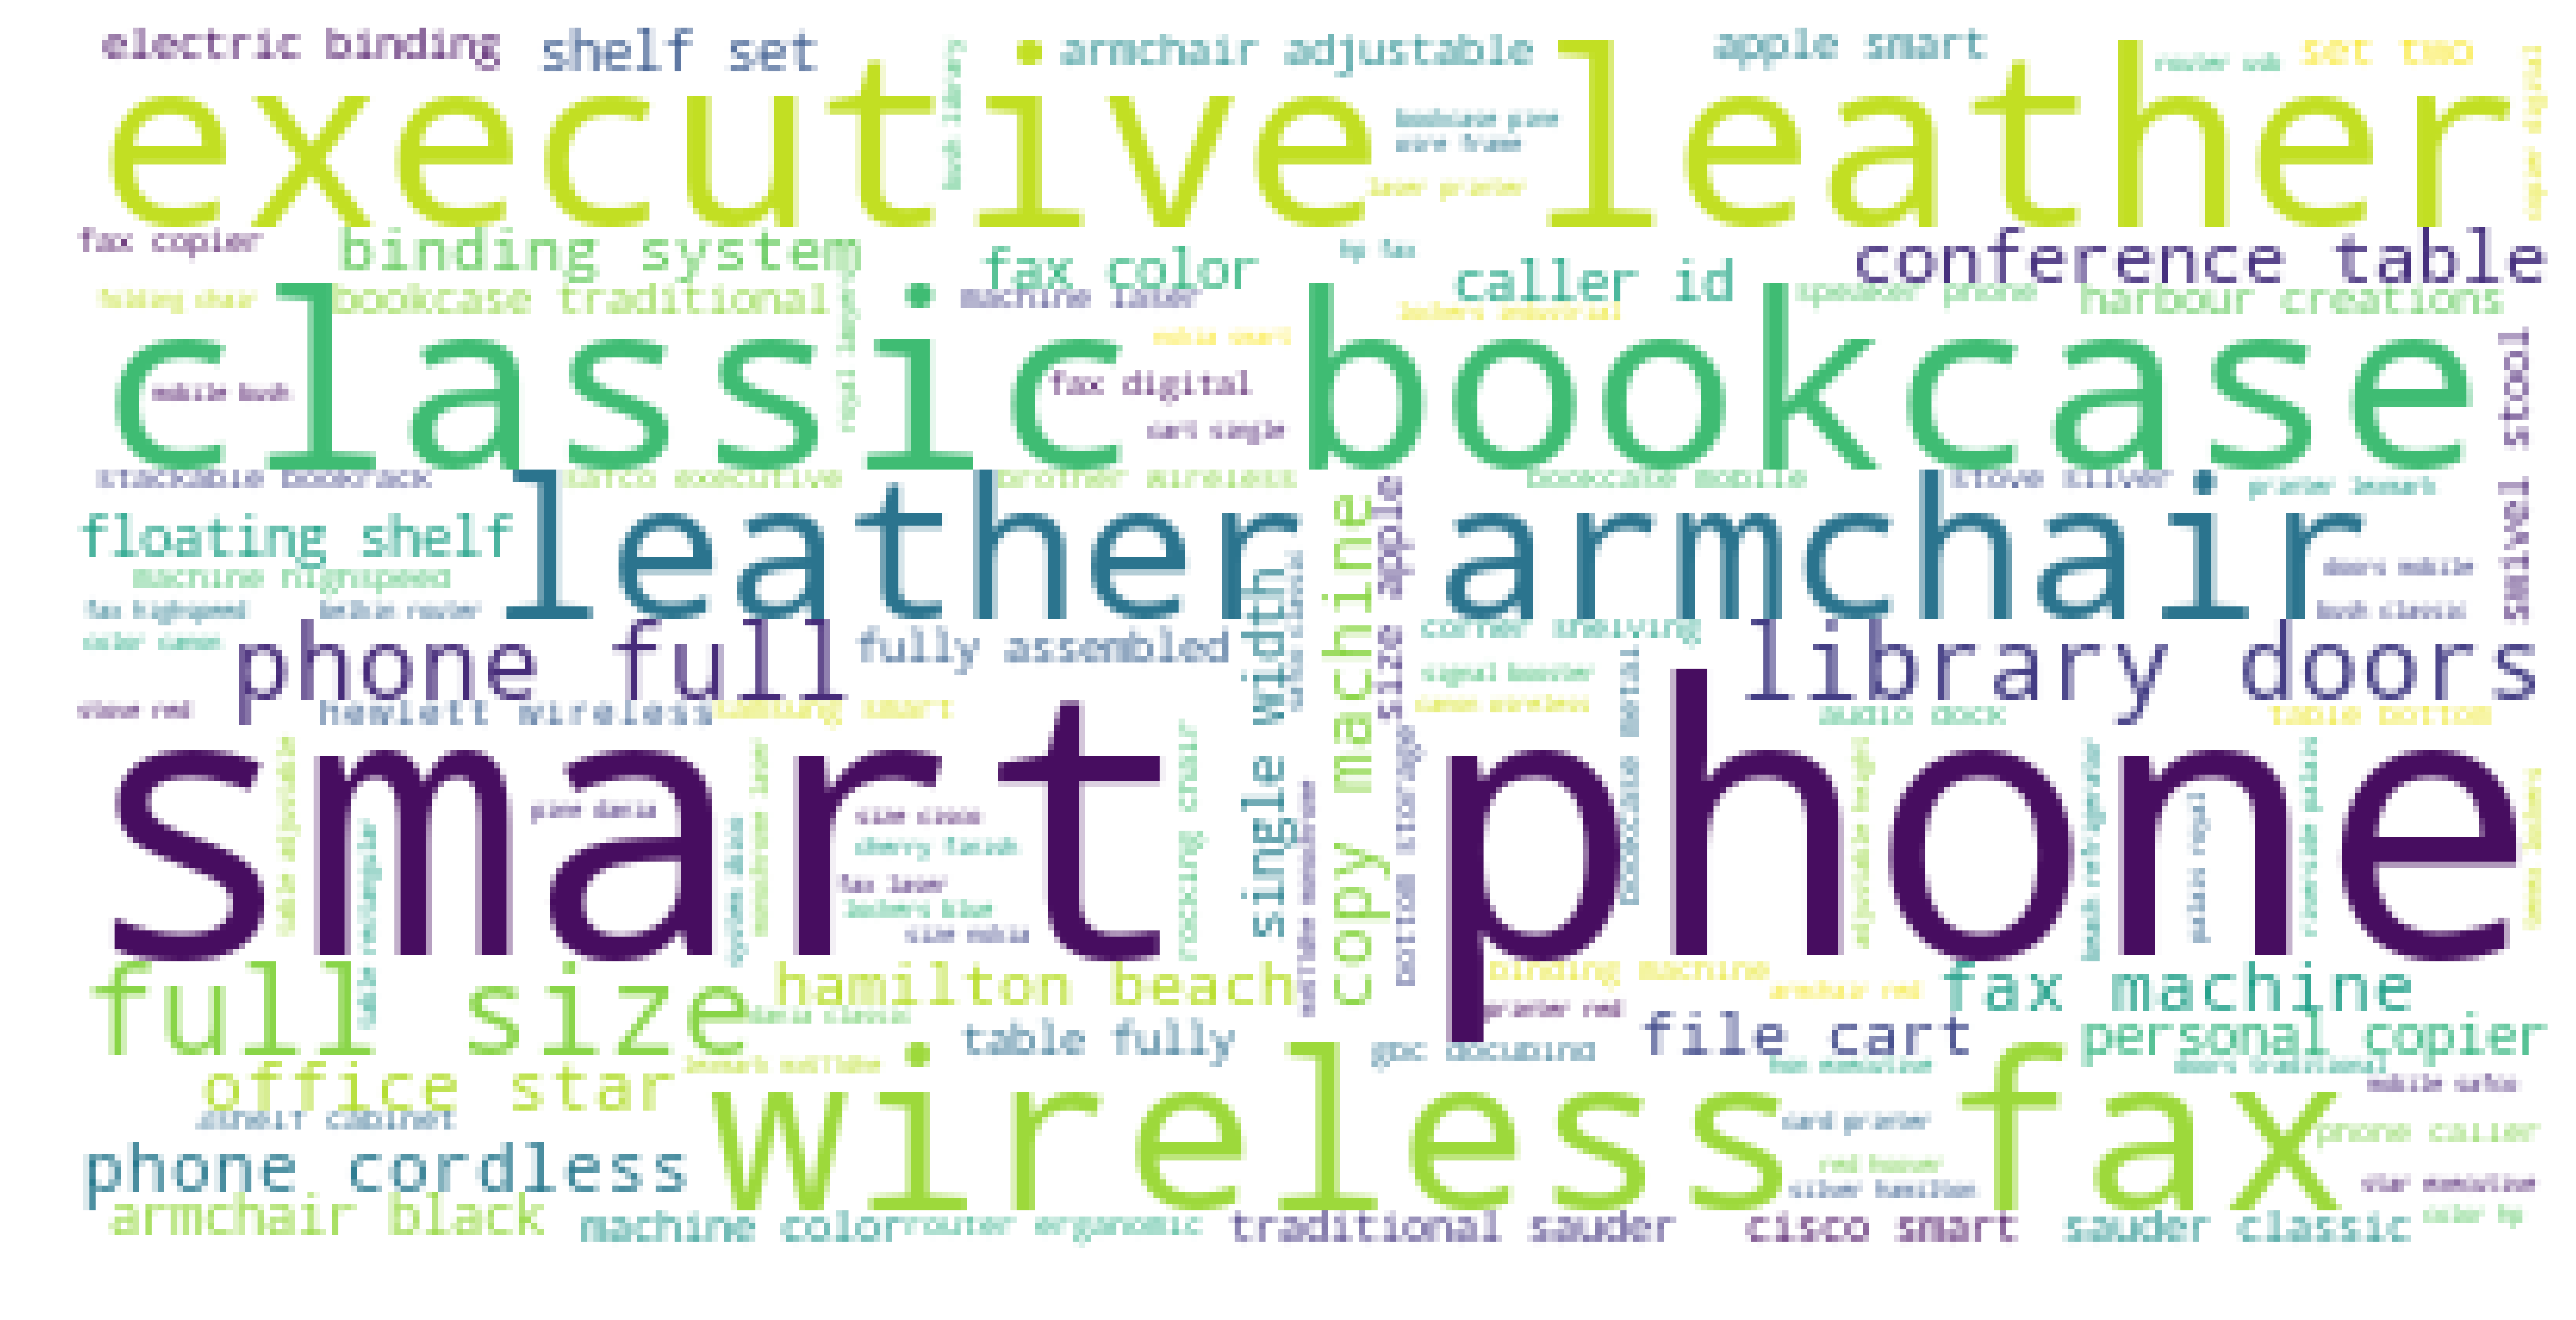

Month : 10


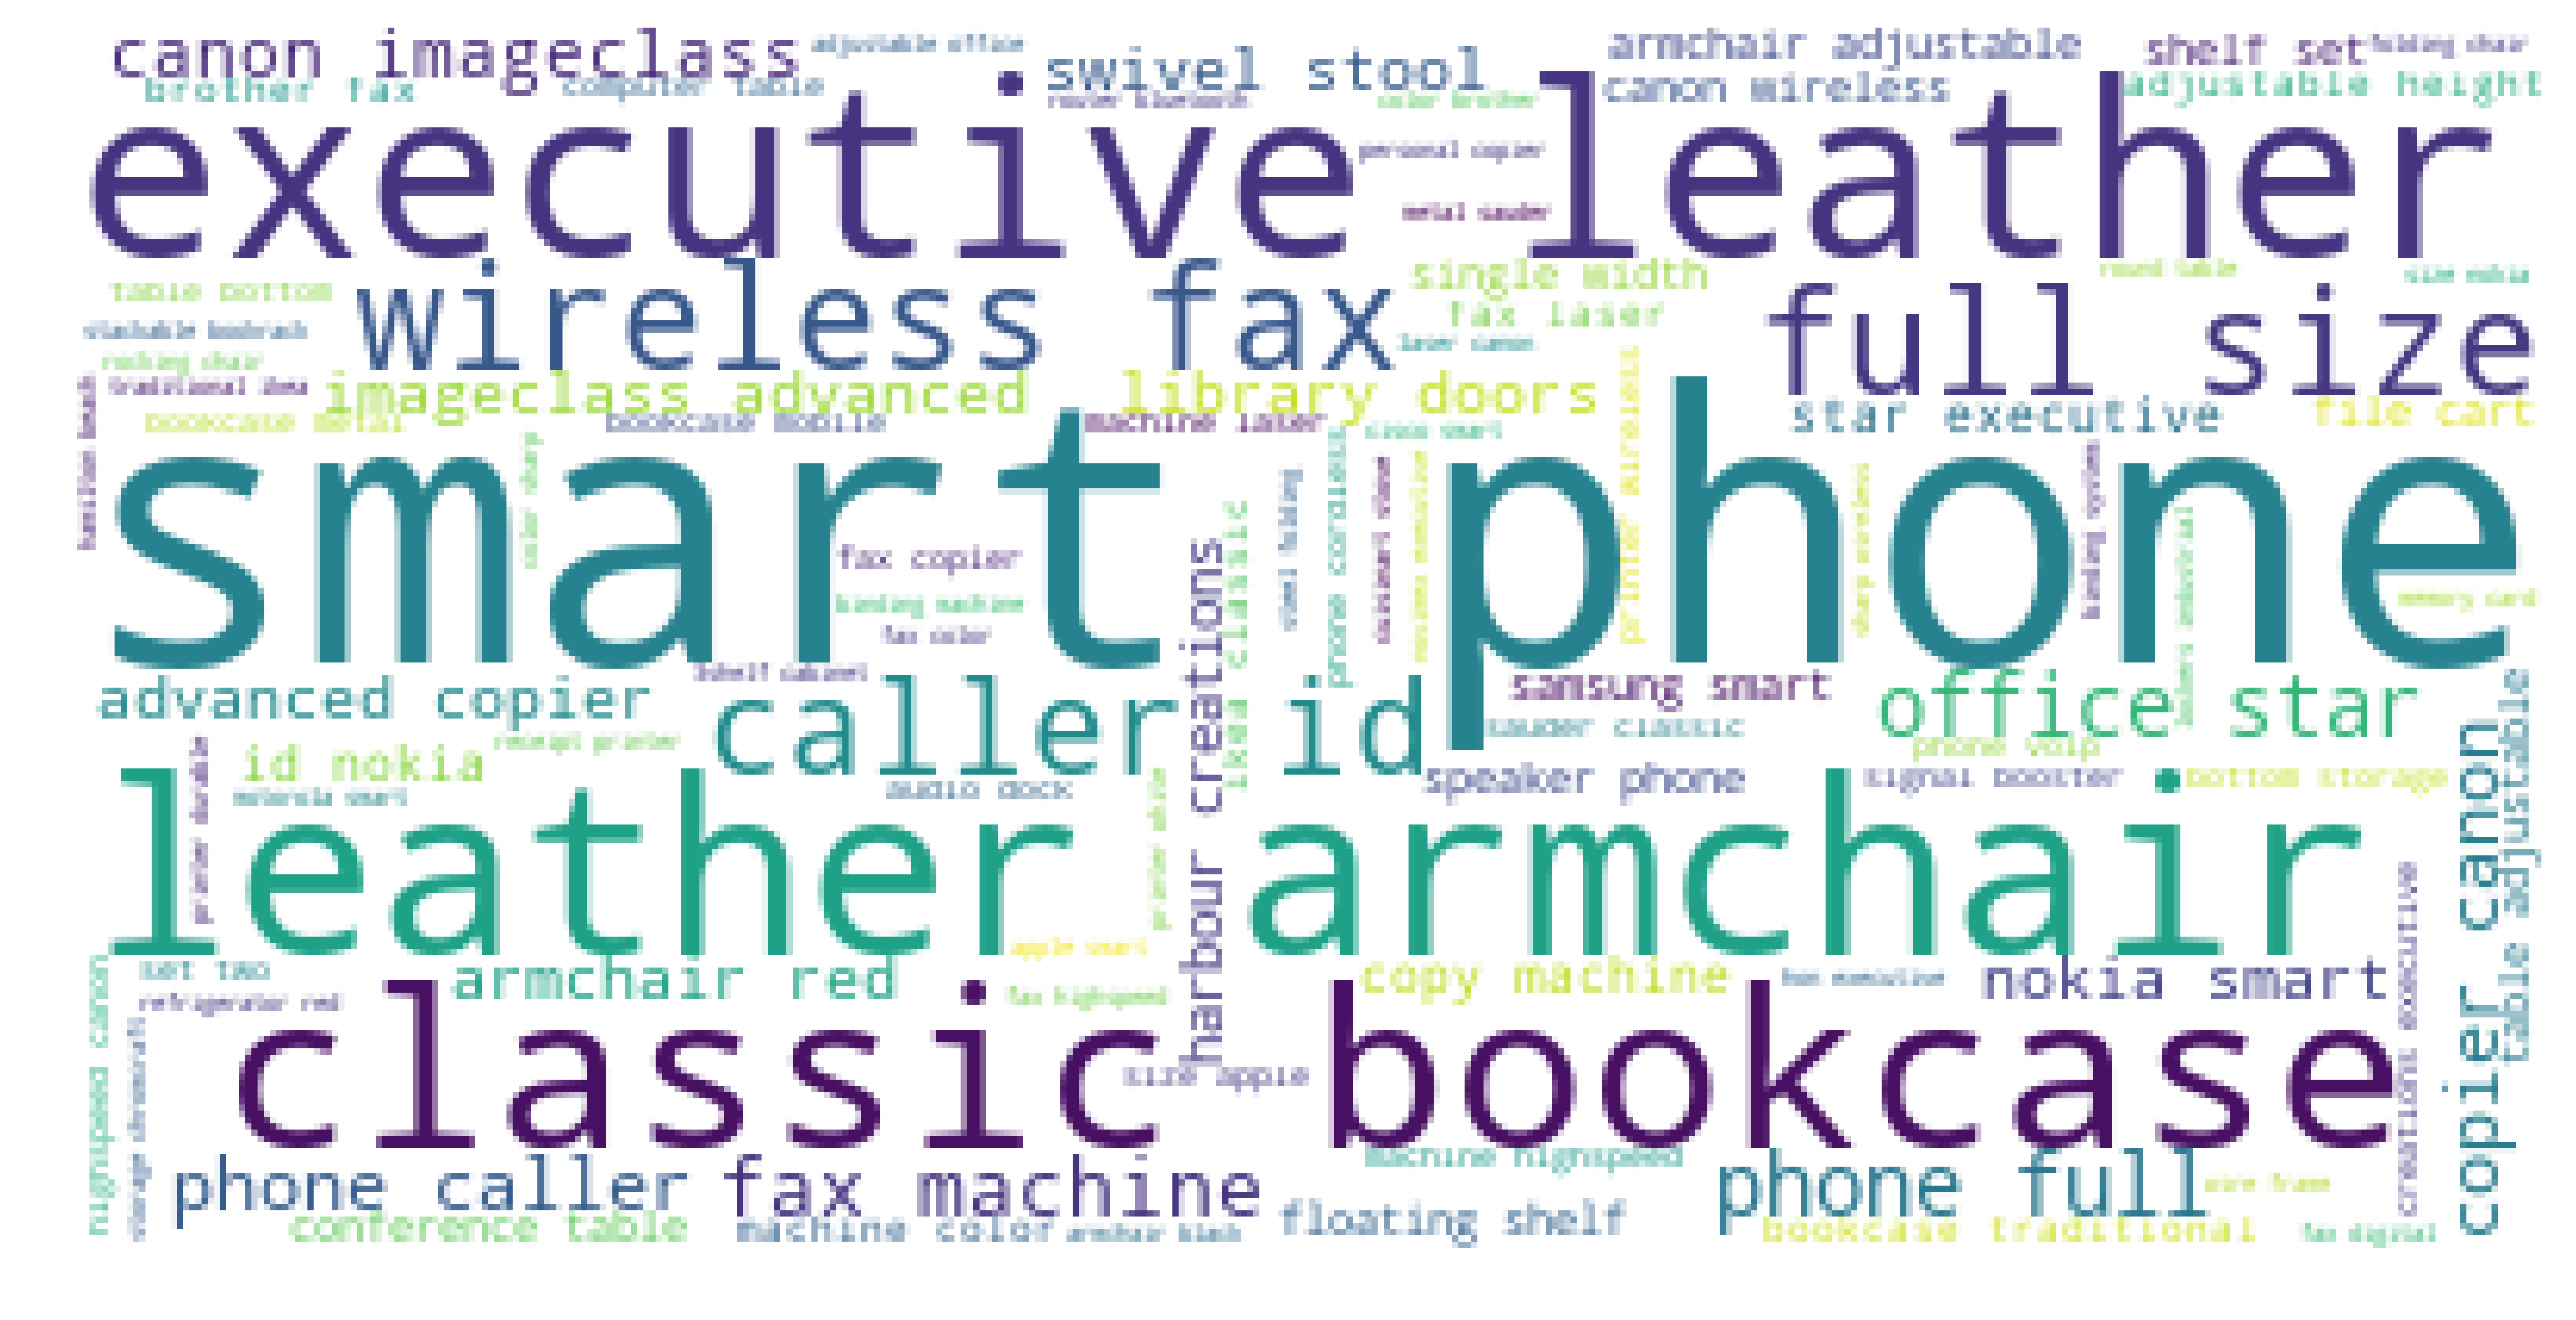

Month : 11


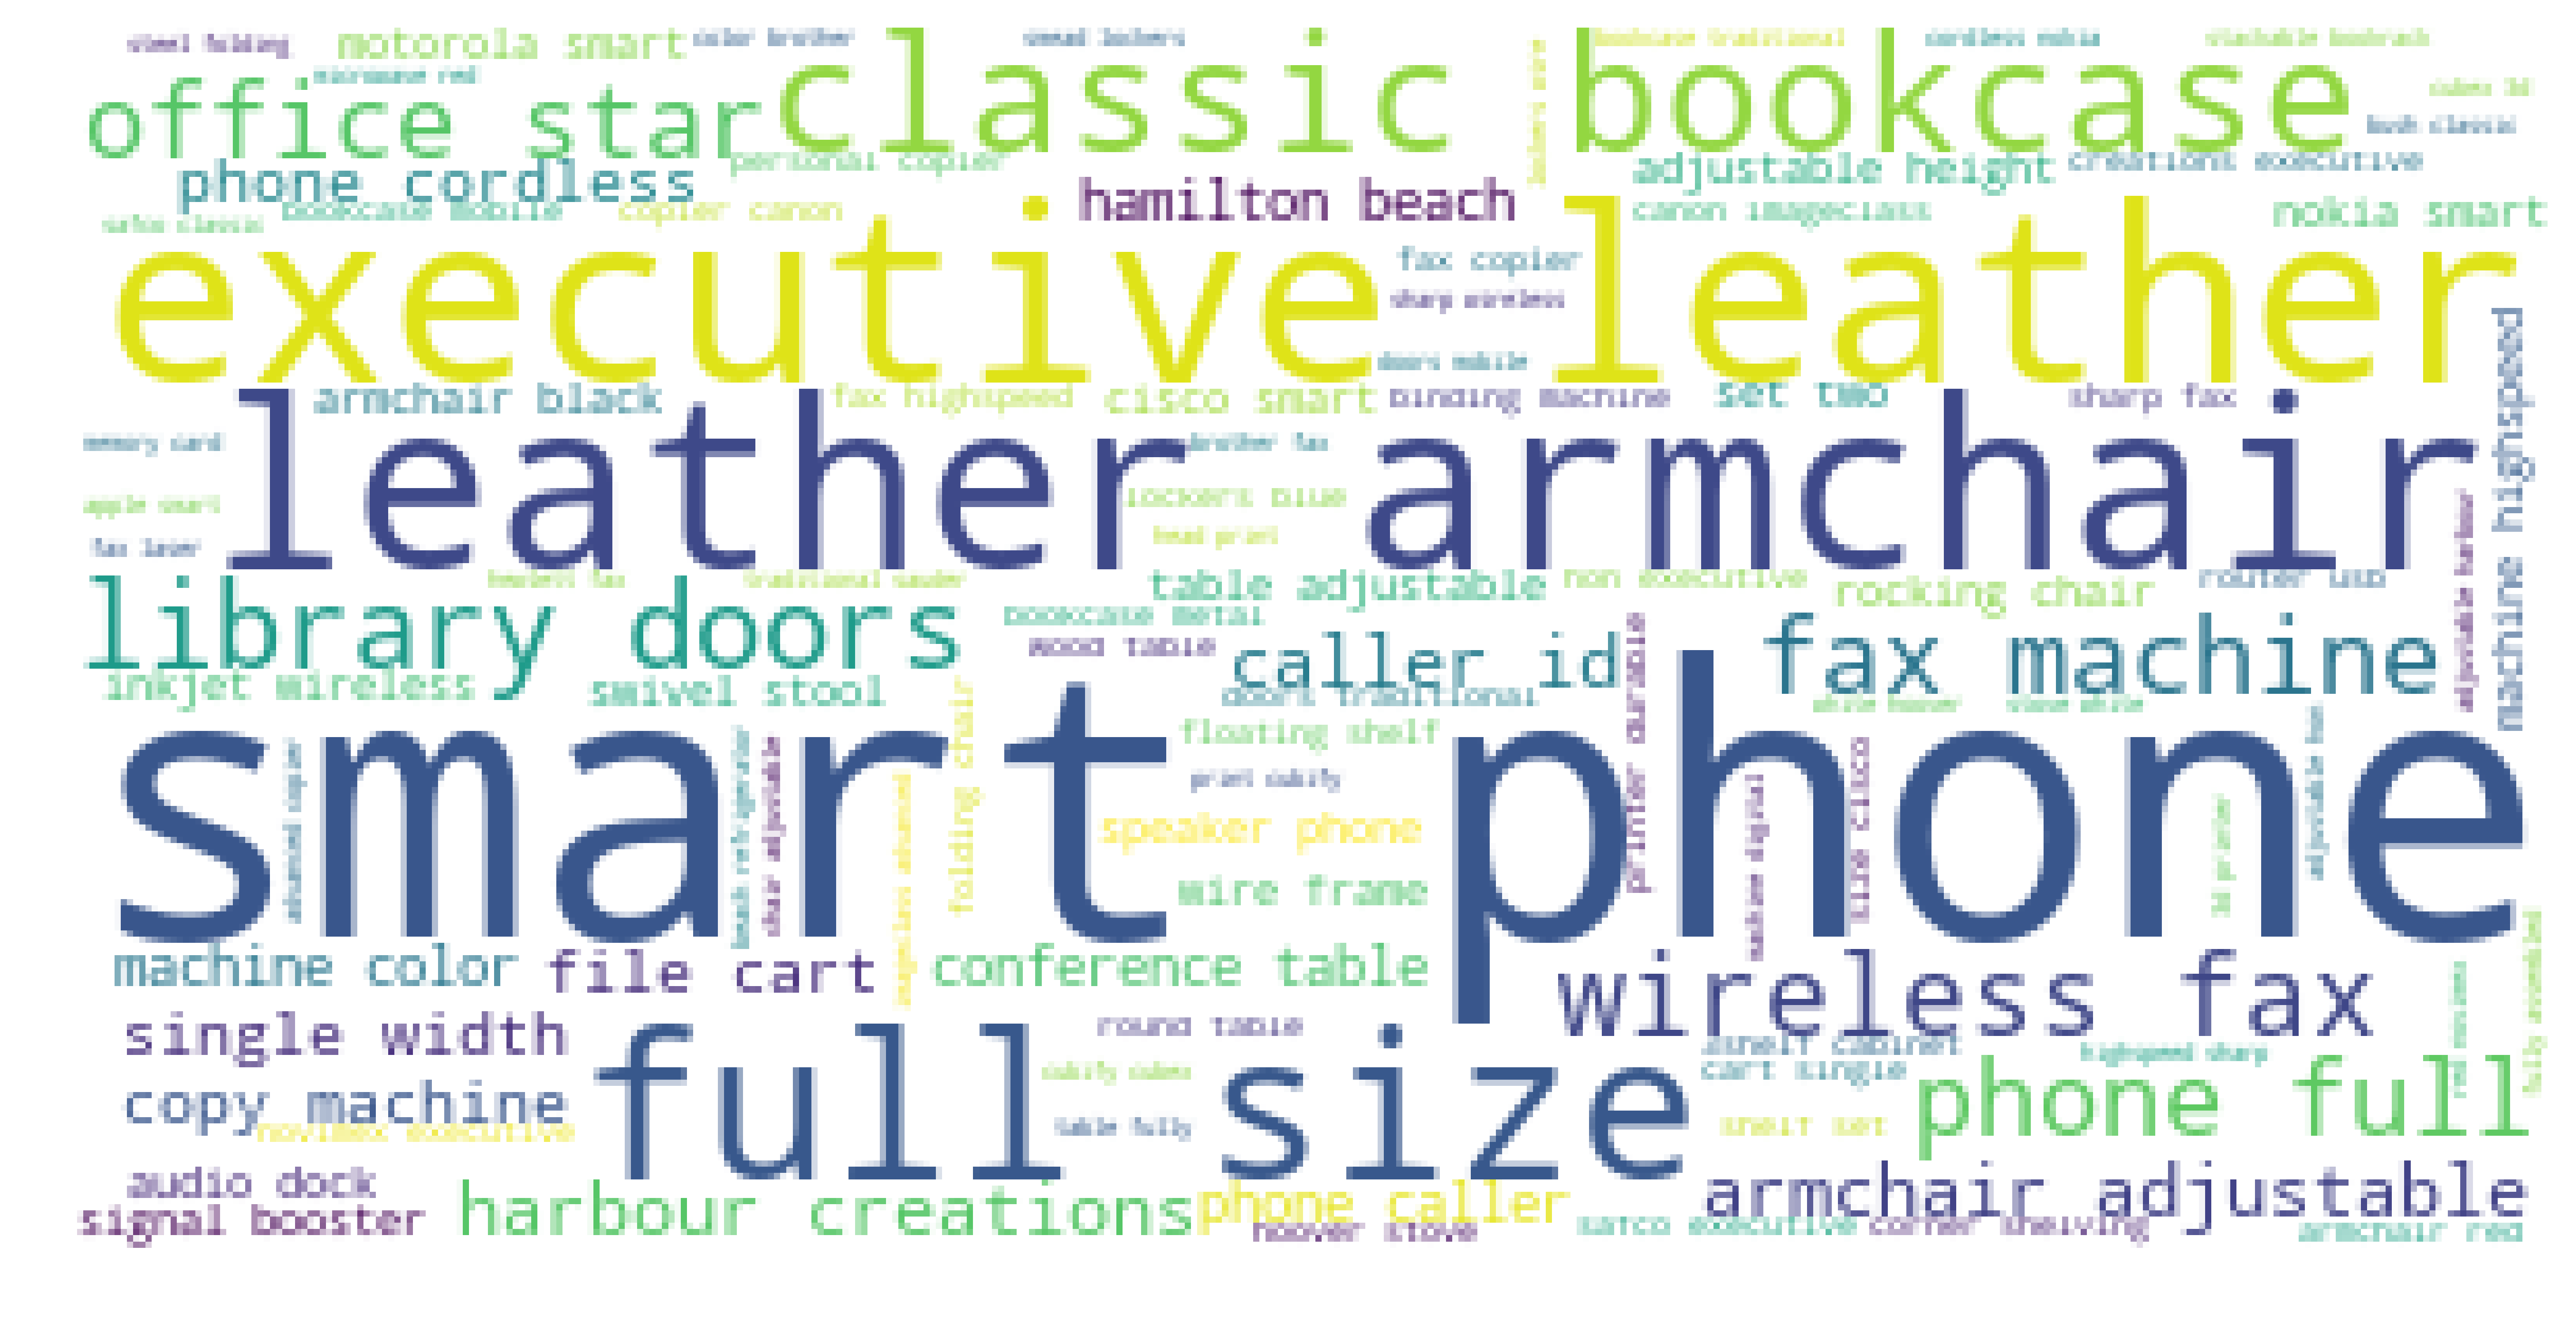

Month : 12


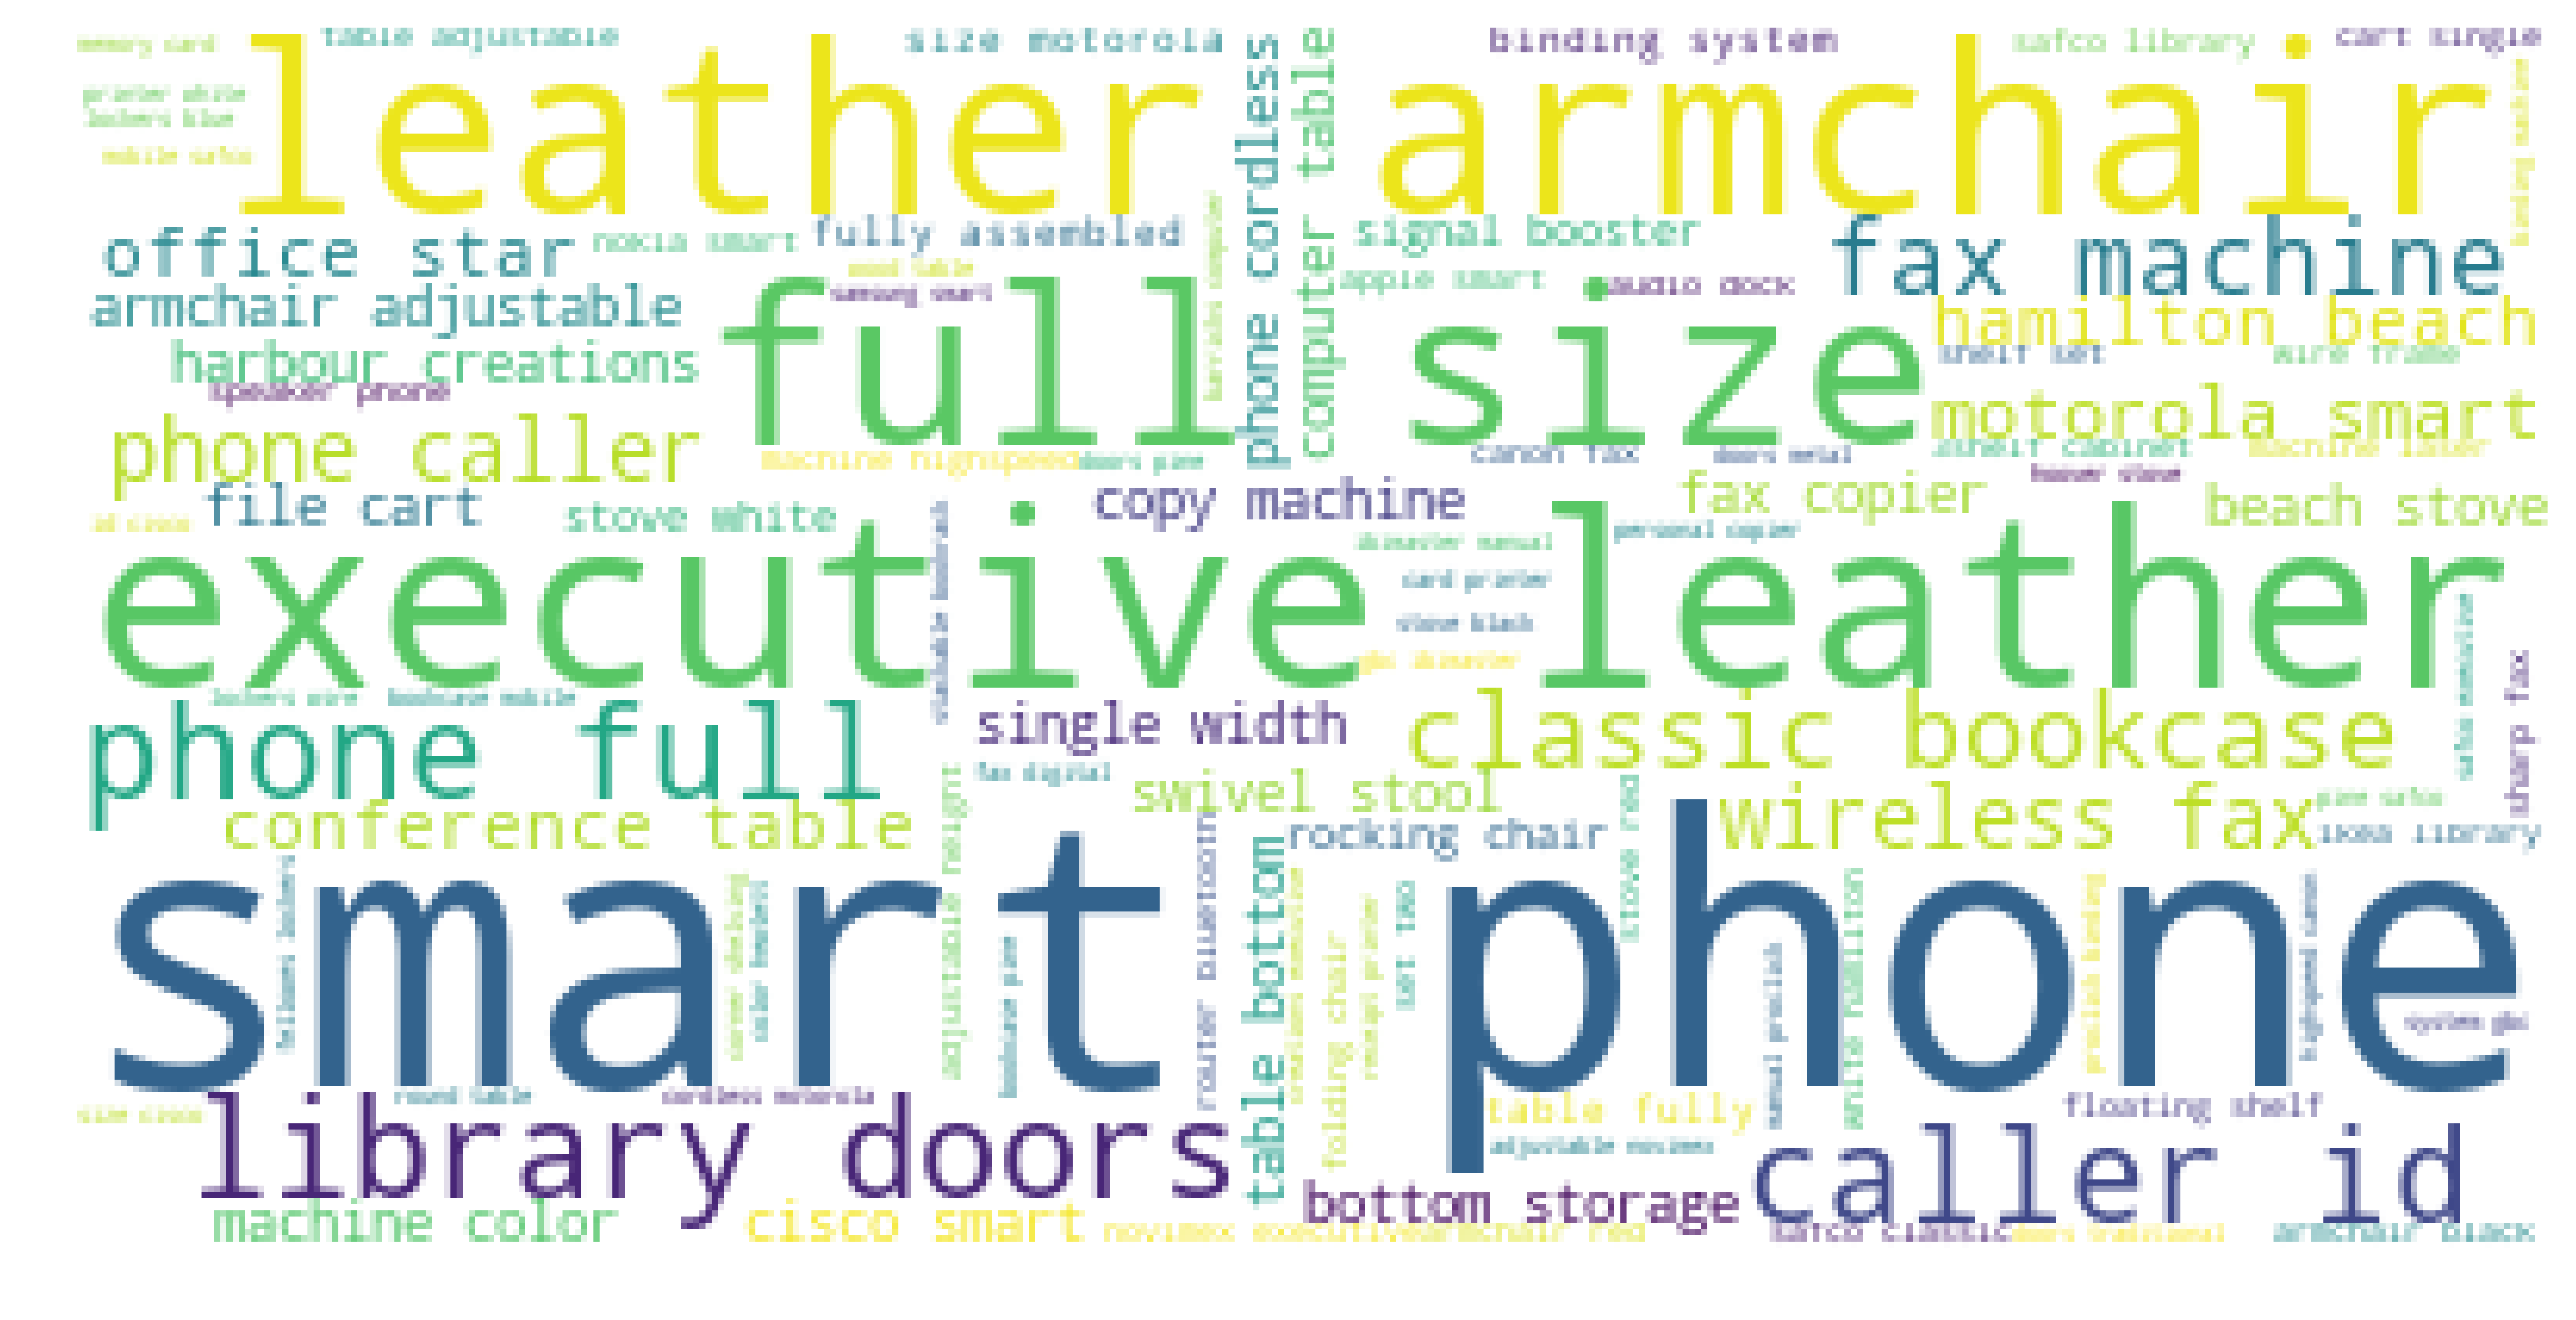

In [8]:
#Word Cloud from Product.Name x Sales (making money things) by Order.Month
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

monthly_words = {}
for i in range(1,13):
    month_subset = Orders[Orders['Order.Month'] == i][['Product.Name', 'Sales.Massive.Balance']]
    
    object_words = [[i] for i in month_subset['Product.Name'].tolist()]
    balanced_words = [a*b for a,b in zip(object_words, month_subset['Sales.Massive.Balance'])]
    balanced_words = sum(balanced_words, [])
    
    text_chunk = ' '.join(balanced_words).lower()
    text_chunk = re.sub('[:\',\-!;"()?”“’|=%\[\]/£+$><]',"", text_chunk)
    print('Month : ' + str(i))
    wordcloud = WordCloud(background_color="white",max_words=len(text_chunk),max_font_size=80, relative_scaling=.5).generate(text_chunk)
    plt.figure(figsize=(20,10), dpi = 400)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    text_tokens = nltk.word_tokenize(text_chunk)
    monthly_words['%s' % i] = text_tokens

In [9]:
object_words = []
for i in Orders['Product.Name']:
    object_words.append([i])
balanced_words = [a*b for a,b in zip(object_words, Orders['Sales.Massive.Balance'])]
balanced_words

[['Samsung Convoy 3', 'Samsung Convoy 3'],
 ['Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Executive Leather Armchair, Black',
  'Novimex Execut

In [10]:
month_subset = Orders[Orders['Order.Month'] == 1][['Product.Name', 'Sales.Massive.Balance']]
    
object_words = [[i] for i in month_subset['Product.Name'].tolist()]
balanced_words = [a*b for a,b in zip(object_words, month_subset['Sales.Massive.Balance'])]
balanced_words = sum(balanced_words, [])

In [11]:
balanced_words

['Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Motorola Smart Phone, Cordless',
 'Brother Fax Machin

# Problem 3

In [ ]:
Your manager required you to give a brief report (Plots + Interpretations) on returned orders.
How much profit did we lose due to returns each year?
How many customer returned more than once? more than 5 times?
Which regions are more likely to return orders?
Which categories (sub-categories) of products are more likely to be returned?

In [46]:
Returns = pd.read_csv('./data/returns.csv')
Returns.columns = ['Returned', 'Order.ID', 'Region']
Returns.head()

Returned                  Order.ID        Region
0      Yes  CA-2012-SA20830140-41210    Central US
1      Yes  IN-2012-PB19210127-41259  Eastern Asia
2      Yes  CA-2012-SC20095140-41174    Central US
3      Yes    IN-2015-JH158207-42140       Oceania
4      Yes    IN-2014-LC168857-41747       Oceania

In [42]:
Merged = Orders.merge(Returns, on = 'Order.ID')
Merged

Row.ID                  Order.ID Order.Date Ship.Date       Ship.Mode  \
0      30191  IN-2012-PB19210127-41259   12/16/12  12/19/12     First Class   
1      30190  IN-2012-PB19210127-41259   12/16/12  12/19/12     First Class   
2      30187  IN-2012-PB19210127-41259   12/16/12  12/19/12     First Class   
3      30193  IN-2012-PB19210127-41259   12/16/12  12/19/12     First Class   
4      30189  IN-2012-PB19210127-41259   12/16/12  12/19/12     First Class   
5      30194  IN-2012-PB19210127-41259   12/16/12  12/19/12     First Class   
6      30188  IN-2012-PB19210127-41259   12/16/12  12/19/12     First Class   
7      30192  IN-2012-PB19210127-41259   12/16/12  12/19/12     First Class   
8      25438    IN-2015-JH158207-42140    5/16/15   5/18/15    Second Class   
9      25441    IN-2015-JH158207-42140    5/16/15   5/18/15    Second Class   
10     25439    IN-2015-JH158207-42140    5/16/15   5/18/15    Second Class   
11     25440    IN-2015-JH158207-42140    5/16/15   5/18/15    Second Class   
12     32648  CA-2014-AS10045140-41727    3/29/14    4/1/14     First Class   
13     29629    IN-2014-LC168857-41747    4/18/14   4/19/14     First Class   
14     30267   ID-2013-AB1001527-41439    6/14/13   6/17/13     First Class   
15     30266   ID-2013-AB1001527-41439    6/14/13   6/17/13     First Class   
16     15162   ES-2015-RA1994545-42218     8/2/15    8/3/15     First Class   
17     18990  ES-2014-JF15295120-41924   10/12/14  10/12/14        Same Day   
18     24361   IN-2014-NM1844527-41800    6/10/14   6/10/14        Same Day   
19     24363   IN-2014-NM1844527-41800    6/10/14   6/10/14        Same Day   
20     24362   IN-2014-NM1844527-41800    6/10/14   6/10/14        Same Day   
21     26932    IN-2015-GB145307-42260    9/13/15   9/19/15  Standard Class   
22     17380    ES-2012-SC208458-41070    6/10/12   6/13/12     First Class   
23     43395  TU-2013-SF10200134-41417    5/23/13   5/26/13     First Class   
24     43394  TU-2013-SF10200134-41417    5/23/13   5/26/13     First Class   
25     43393  TU-2013-SF10200134-41417    5/23/13   5/26/13     First Class   
26     31138   ID-2015-RD1993092-42140    5/16/15   5/18/15    Second Class   
27     31137   ID-2015-RD1993092-42140    5/16/15   5/18/15    Second Class   
28     49752   SF-2015-MV8190117-42362   12/24/15  12/27/15     First Class   
29     49751   SF-2015-MV8190117-42362   12/24/15  12/27/15     First Class   
...      ...                       ...        ...       ...             ...   
2190   12904   ES-2013-PB1915034-41373     4/9/13   4/13/13  Standard Class   
2191   49473    NI-2014-CG204095-41856     8/5/14   8/10/14  Standard Class   
2192   47903    NI-2015-EB411095-42174    6/19/15   6/24/15  Standard Class   
2193   26996  IN-2014-KD16345144-41768     5/9/14   5/13/14  Standard Class   
2194   21629  IN-2015-LA16780102-42095     4/1/15    4/7/15  Standard Class   
2195   48388   CA-2014-TZ1144523-41985   12/12/14  12/18/14  Standard Class   
2196   22135   IN-2014-SE2011066-41772    5/13/14   5/19/14  Standard Class   
2197   34714  CA-2013-TC21475140-41391    4/27/13    5/2/13  Standard Class   
2198   34715  CA-2013-TC21475140-41391    4/27/13    5/2/13  Standard Class   
2199   34856  CA-2015-TS21505140-42316    11/8/15  11/13/15  Standard Class   
2200   34855  CA-2015-TS21505140-42316    11/8/15  11/13/15  Standard Class   
2201   32599  CA-2013-TC21535140-41536    9/19/13   9/24/13    Second Class   
2202   15560   ES-2015-AS1024064-42297   10/20/15  10/22/15    Second Class   
2203   50177   ZA-2014-LS6945147-41672     2/2/14    2/8/14  Standard Class   
2204   41609  TU-2014-SF10965134-41992   12/19/14  12/24/14  Standard Class   
2205   39187  CA-2014-TS21655140-41999   12/26/14  12/30/14  Standard Class   
2206   39188  CA-2014-TS21655140-41999   12/26/14  12/30/14  Standard Class   
2207   39189  CA-2014-TS21655140-41999   12/26/14  12/30/14  Standard Class   
2208   39186  CA-2014-TS21655140-41999   12/26/14  12/30

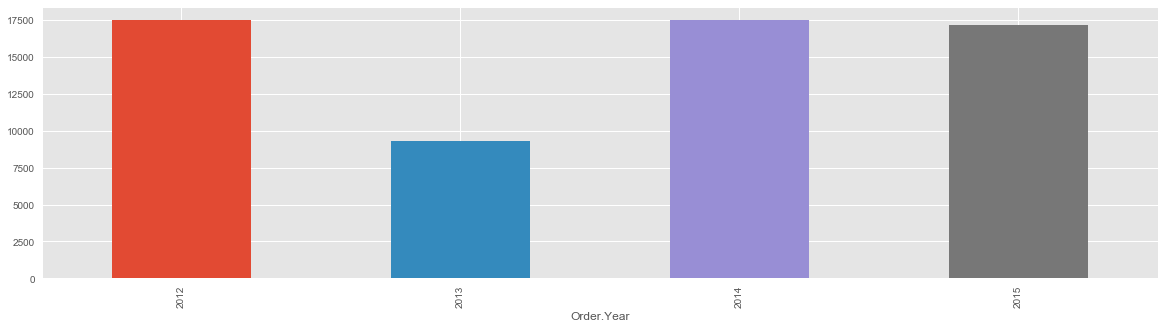

In [90]:
#Profit loss by returning each year
fig, ax = plt.subplots(figsize=(20, 5))
Merged[Merged['Returned'] == 'Yes'].groupby(['Order.Year']).sum()['Profit'].plot.bar()

In [40]:
#All customers number : 593
len(np.unique(Merged['Customer.Name']).tolist())

593

In [41]:
#once returned customers number : 593
Customer_names = np.unique(Merged['Customer.Name']).tolist()
Customer_counting = []
for i in Customer_names:
    count_number = Merged[Merged['Returned'] == 'Yes']['Customer.Name'].tolist().count(i)
    Customer_counting.append(count_number)
len(Customer_counting)

593

In [53]:
#five more returned customers number : 176
Customer_names = np.unique(Merged['Customer.Name']).tolist()
Customer_counting = []
for i in Customer_names:
    count_number = Merged[Merged['Returned'] == 'Yes']['Customer.Name'].tolist().count(i)
    Customer_counting.append(count_number)
Returned_table = pd.DataFrame({'Customer.Name' : Customer_names, 'Returned_counting' : Customer_counting})
Returned_table[Returned_table['Returned_counting'] >= 5].shape[0]

176

In [84]:
#the most returning region by Sales amounts
Merged[Merged['Returned'] == 'Yes'].groupby(['Region_x']).sum()[['Sales']].sort_values(by = 'Sales', ascending = False)

Sales
Region_x                   
Western Europe     72669.57
Eastern Asia       47798.05
Oceania            46943.35
Central America    44334.78
Western US         44194.92
Southeastern Asia  36967.15
Southern Europe    34226.35
South America      29845.12
Southern Asia      25159.37
Eastern US         23477.35
Central US         23421.24
Northern Europe    17768.65
Southern US        17024.58
Western Asia       11737.63
North Africa       10193.37
Caribbean           9679.33
Eastern Europe      9501.21
Southern Africa     7321.86
Central Africa      4038.48
Western Africa      3928.17
Canada              3316.41
Eastern Africa      2026.44
Central Asia         359.03

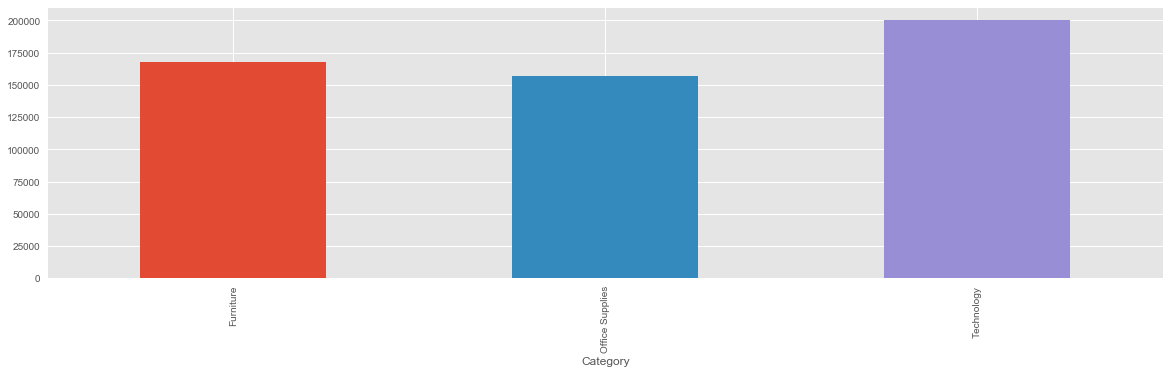

In [89]:
#Returns by category
fig, ax = plt.subplots(figsize=(20, 5))
Merged[Merged['Returned'] == 'Yes'].groupby(['Category']).sum()['Sales'].plot.bar()

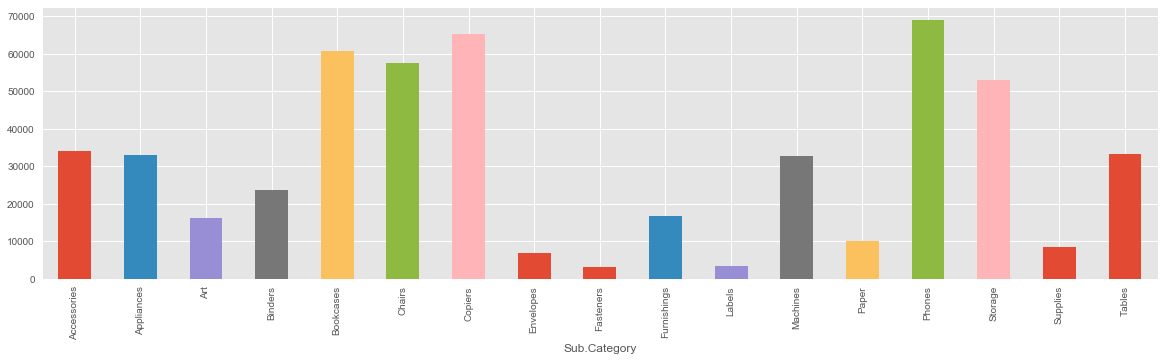

In [93]:
#Returns by sub-category
fig, ax = plt.subplots(figsize=(20, 5))
Merged[Merged['Returned'] == 'Yes'].groupby(['Sub.Category']).sum()['Sales'].plot.bar()